In [1]:

%matplotlib inline 
from IPython.display import clear_output
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import time
from scipy.stats import entropy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import os
# import scipy
# import seaborn as sns
# from matplotlib import pyplot as plt
# import matplotlib as mpl
# import math
# import gensim
# from itertools import repeat
# import gensim.downloader
# from sklearn.metrics.pairwise import cosine_similarity
# import statsmodels.api as sm
# # from gensim.models.fasttext import load_facebook_mode
import warnings
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'
warnings.filterwarnings('ignore')


In [2]:
# ### openAI imports

# import openai

In [3]:
def make_ratings_mat(grouped_ratings_df):
    
    mat = np.zeros((len(np.unique(grouped_ratings_df.prompt)),71))
    for i,con in enumerate(np.unique(grouped_ratings_df.prompt)):
        ds = grouped_ratings_df[grouped_ratings_df.prompt==con]
        mat[i,:] = ds.iloc[:,3].values


    mat = pd.DataFrame(mat, index =np.unique(grouped_ratings_df.prompt), columns = np.arange(mat.shape[1]) )
    cmeans = mat.mean().values
    return mat, cmeans

In [4]:
set_1_raw = pd.read_csv('../../data/uw71_set1_redo_raw.csv')
set_2_raw = pd.read_csv('../../data/uw71_set2_raw.csv')
set_3_raw = pd.read_csv('../../data/uw71_set3_raw.csv')
set1_grouped = set_1_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set2_grouped = set_2_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set3_grouped = set_3_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()

ratings1,ratings_cmeans1= make_ratings_mat(set1_grouped)
ratings2,ratings_cmeans2= make_ratings_mat(set2_grouped)
ratings3,ratings_cmeans3= make_ratings_mat(set3_grouped)

concept_list = set1_grouped.pivot(index=['prompt','concept'], columns='color_index', values='mean_rating').reset_index().sort_values(by=['concept','prompt']).reset_index(drop=True)['prompt'].values
concept_list.sort()
concept_order  = {concept: i for i, concept in enumerate(concept_list)}

In [5]:
uw71coords = pd.read_csv('../../data/UW71coordinates_long.csv')

In [6]:
### vertically stack the ratings matrices
ratings_all = pd.concat([ratings1,ratings2,ratings3])


In [7]:

set_2_raw.trial_type.unique()

array(['image-slider-responseMAS'], dtype=object)

In [8]:
# ### Make a long string with all the entries in uw71coords.color_hex separated by commas
# all_color_string = ', '.join(uw71coords.color_hex.values)
# all_color_string

# with open('API_key_soil.txt') as f:
#     openai.api_key= f.readline()
#     f.close()


In [9]:
# no_skip_concepts = ['happy']
# reps=1

# assocs = np.zeros((70*reps,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept not in no_skip_concepts:
#     continue
#   for j in range(reps):

#     clear_output()
#     print(f'Evaluating: {this_concept}')

#     for k,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#       time.sleep(.3)
#       response = openai.ChatCompletion.create(
#         model="gpt-4",
#         messages=[{
#               "role": "system",
#               "content": "You are an expert on color-concept associations."
#             },

#             {
#               "role": "user",
#               "content": f"\
#               Let's do the rating task - \
#       Concept: '{this_concept}'\
#       Colors: {this_color}\
#       Answer with only the number:"
#             }],
#         temperature=1,
#         max_tokens=10
#       )
#       assocs[reps*i + j,k] = float(response.choices[0].message.content)
#     gpt_assoc_df = pd.DataFrame(assocs, index = np.repeat(ratings_all.index.values,reps), columns = np.arange(71))
#     gpt_assoc_df.to_csv('../../data/gpt4_ratings_happy.csv')
   




In [10]:

# assocs = np.zeros((70,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept in ([
#     'above',
# 'angry',
# 'beach',
# 'below',
# 'beside',
# 'blueberry',
# 'dawn',
# 'day',
# 'disgust',
# 'dress',
# 'dusk',
# 'far',
# 'fearful',
# 'field',
# 'happy',
# 'lemon',
# 'mango',
# 'near',
# 'night',
# 'noon',
# 'ocean',
# 'pants',
# 'sad',
# 'shirt',
# 'shoes',
# 'sky',
# 'socks',
# 'strawberry',
# 'sunset',
# 'watermelon',
# 'bear',
# 'bird',
# 'blizzard',
# 'boat',
# 'car',
# 'drought',
# 'evil',
# 'fish',
# 'frog',
# 'greed',
# 'hurricane',
# 'justice',
# 'lightning',
# 'lion',
# 'love',
# 'peace',
# 'plane',
# 'sandstorm']):
#     continue
#   clear_output()
#   print(f'Evaluating:{this_concept}')

#   for j,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#     time.sleep(3)
#     response = openai.ChatCompletion.create(
#       model="gpt-4",
#       messages=[{
#             "role": "system",
#             "content": "You are an expert on color-concept associations."
#           },

#           {
#             "role": "user",
#             "content": f"I will give you the hexcode for a color a concept. Rate on a continuous scale from 0 to 1, using 3 decimal places, how associated the color is with the concept.\
#             The concept is '{this_concept}'.\
#             Before rating, here's the set of all the colors {all_color_string}. Think of which color you associate most with '{this_concept}', that color should get a rating of 1. Now think of\
#             which color you associated least with '{this_concept}', that color should get a rating of 0. Okay, now let's do the rating task.\
#     Concept: '{this_concept}'\
#     Color: {this_color}\
#     Answer with only the number:"
#           }],
#       temperature=0,
#       max_tokens=10
#     )
#     assocs[i,j] = float(response.choices[0].message.content)
#   gpt_assoc_df = pd.DataFrame(assocs, index = ratings_all.index.values, columns = np.arange(71))
#   gpt_assoc_df.to_csv('../../data/recon_assocs/gpt4_ratings_anchored_4.csv')


In [11]:
gpt_assoc_anchor_df = pd.read_csv('../../data/gpt4_ratings_anchored_final.csv', index_col=0)
gpt_assoc_anchor_df = gpt_assoc_anchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_noanchor_df = pd.read_csv('../../data/gpt4_ratings.csv', index_col=0)
gpt_assoc_noanchor_df = gpt_assoc_noanchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple = pd.read_csv('../../data/gpt4_ratings_multiple_master.csv', index_col=0)
gpt_assoc_multiple = gpt_assoc_multiple.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple_grouped = gpt_assoc_multiple.groupby('concept').median().reset_index()

Text(0.5, 1.0, 'GPT4 Color-Concept Associations No Anchor')

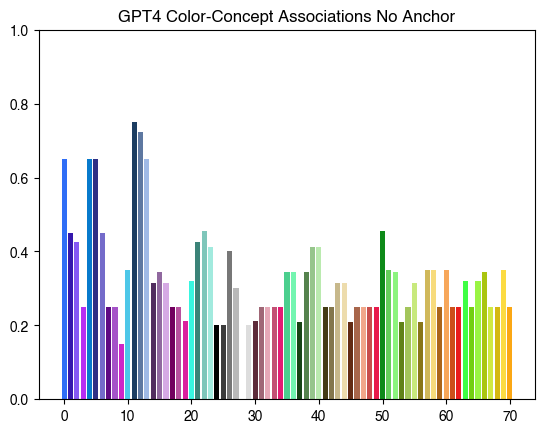

In [12]:
plt.bar(np.arange(71),gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations No Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Anchor')

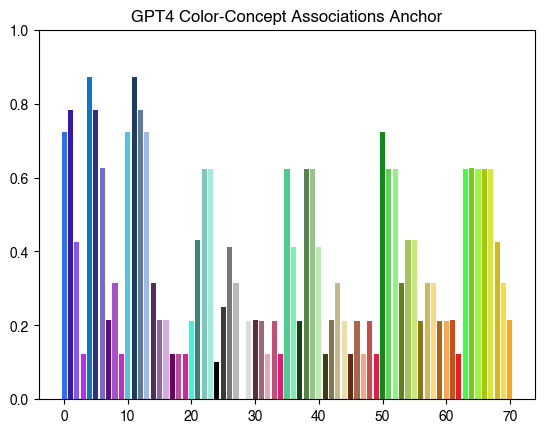

In [13]:
### anchoring
plt.bar(np.arange(71),gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Multiple')

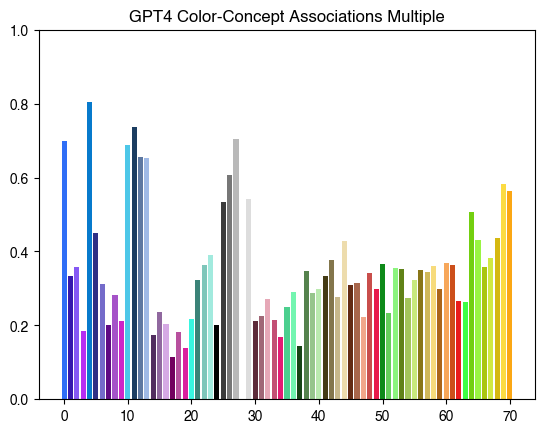

In [14]:
plt.bar(np.arange(71),gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept=='plane'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Multiple')

Text(0.5, 1.0, 'Human Color-Concept Associations')

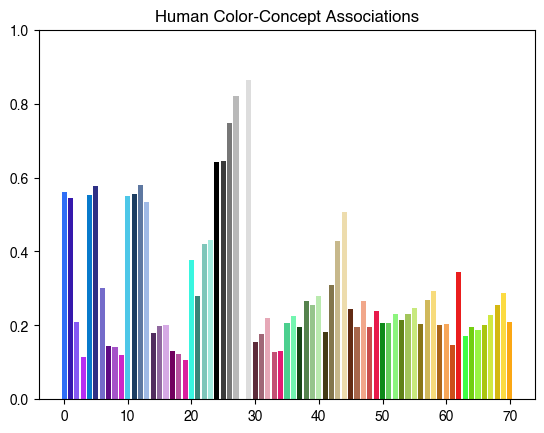

In [15]:
plt.bar(np.arange(71),ratings_all[ratings_all.index=='plane'].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('Human Color-Concept Associations')

In [16]:

### group by concept in gpt_assoc_multiple and take the mean of the first 2 rows in each group
cons=[]
cors=[]
num_ratings = []
for i in range(10):
    grouped_df = gpt_assoc_multiple.groupby('concept').apply(lambda x: x.head(i+1).mean()).reset_index()
    for this_concept in grouped_df.concept:
        cons.append(this_concept)
        cors.append(pearsonr(grouped_df[grouped_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
        num_ratings.append(i+1)
multirate_plot_df = pd.DataFrame({'concept':cons,'r':cors,'num_ratings':num_ratings}) 



1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


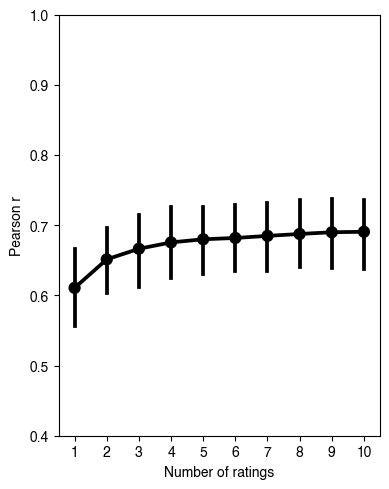

In [17]:
plt.figure(figsize=(4,5))
sns.pointplot(x='num_ratings',y='r',data=multirate_plot_df, color='black')
plt.ylim([.4,1])
plt.ylabel('Pearson r')
plt.xlabel('Number of ratings')
plt.tight_layout()
plt.savefig('../../plots/num_ratings_vs_cor.pdf',format ='pdf',bbox_inches='tight')

In [18]:
multirate_plot_df

concept         r  num_ratings
0         above  0.456183            1
1         angry  0.849012            1
2         apple  0.864014            1
3        banana  0.841186            1
4         beach  0.741349            1
..          ...       ...          ...
695      sunset  0.776224           10
696       train  0.484986           10
697       truck  0.593742           10
698  watermelon  0.761797           10
699     working  0.637762           10

[700 rows x 3 columns]

In [19]:
multirate_plot_df

#### for each concept in multirate_plot_df compute the derivative of r wrt num_ratings and save it in a dataframe call diff_df with columns for concept and the derivative value
cons=[]
d1=[]
d2=[]
d3=[]
d4=[]
d5=[]
d6=[]
d7=[]
d8=[]
d9=[]


for this_concept in multirate_plot_df.concept.unique():
    ds = multirate_plot_df[multirate_plot_df.concept==this_concept]
    d1.append(np.diff(ds.r.values)[0])
    d2.append(np.diff(ds.r.values)[1])
    d3.append(np.diff(ds.r.values)[2])
    d4.append(np.diff(ds.r.values)[3])
    d5.append(np.diff(ds.r.values)[4])
    d6.append(np.diff(ds.r.values)[5])
    d7.append(np.diff(ds.r.values)[6])
    d8.append(np.diff(ds.r.values)[7])
    d9.append(np.diff(ds.r.values)[8])
    cons.append(this_concept)
diff_df = pd.DataFrame({'concept':cons,'d1':d1,'d2':d2,'d3':d3,'d4':d4,'d5':d5,'d6':d6,'d7':d7,'d8':d8,'d9':d9, 'mean_d':np.mean([d1,d2,d3,d4,d5,d6,d7,d8,d9],axis=0)})


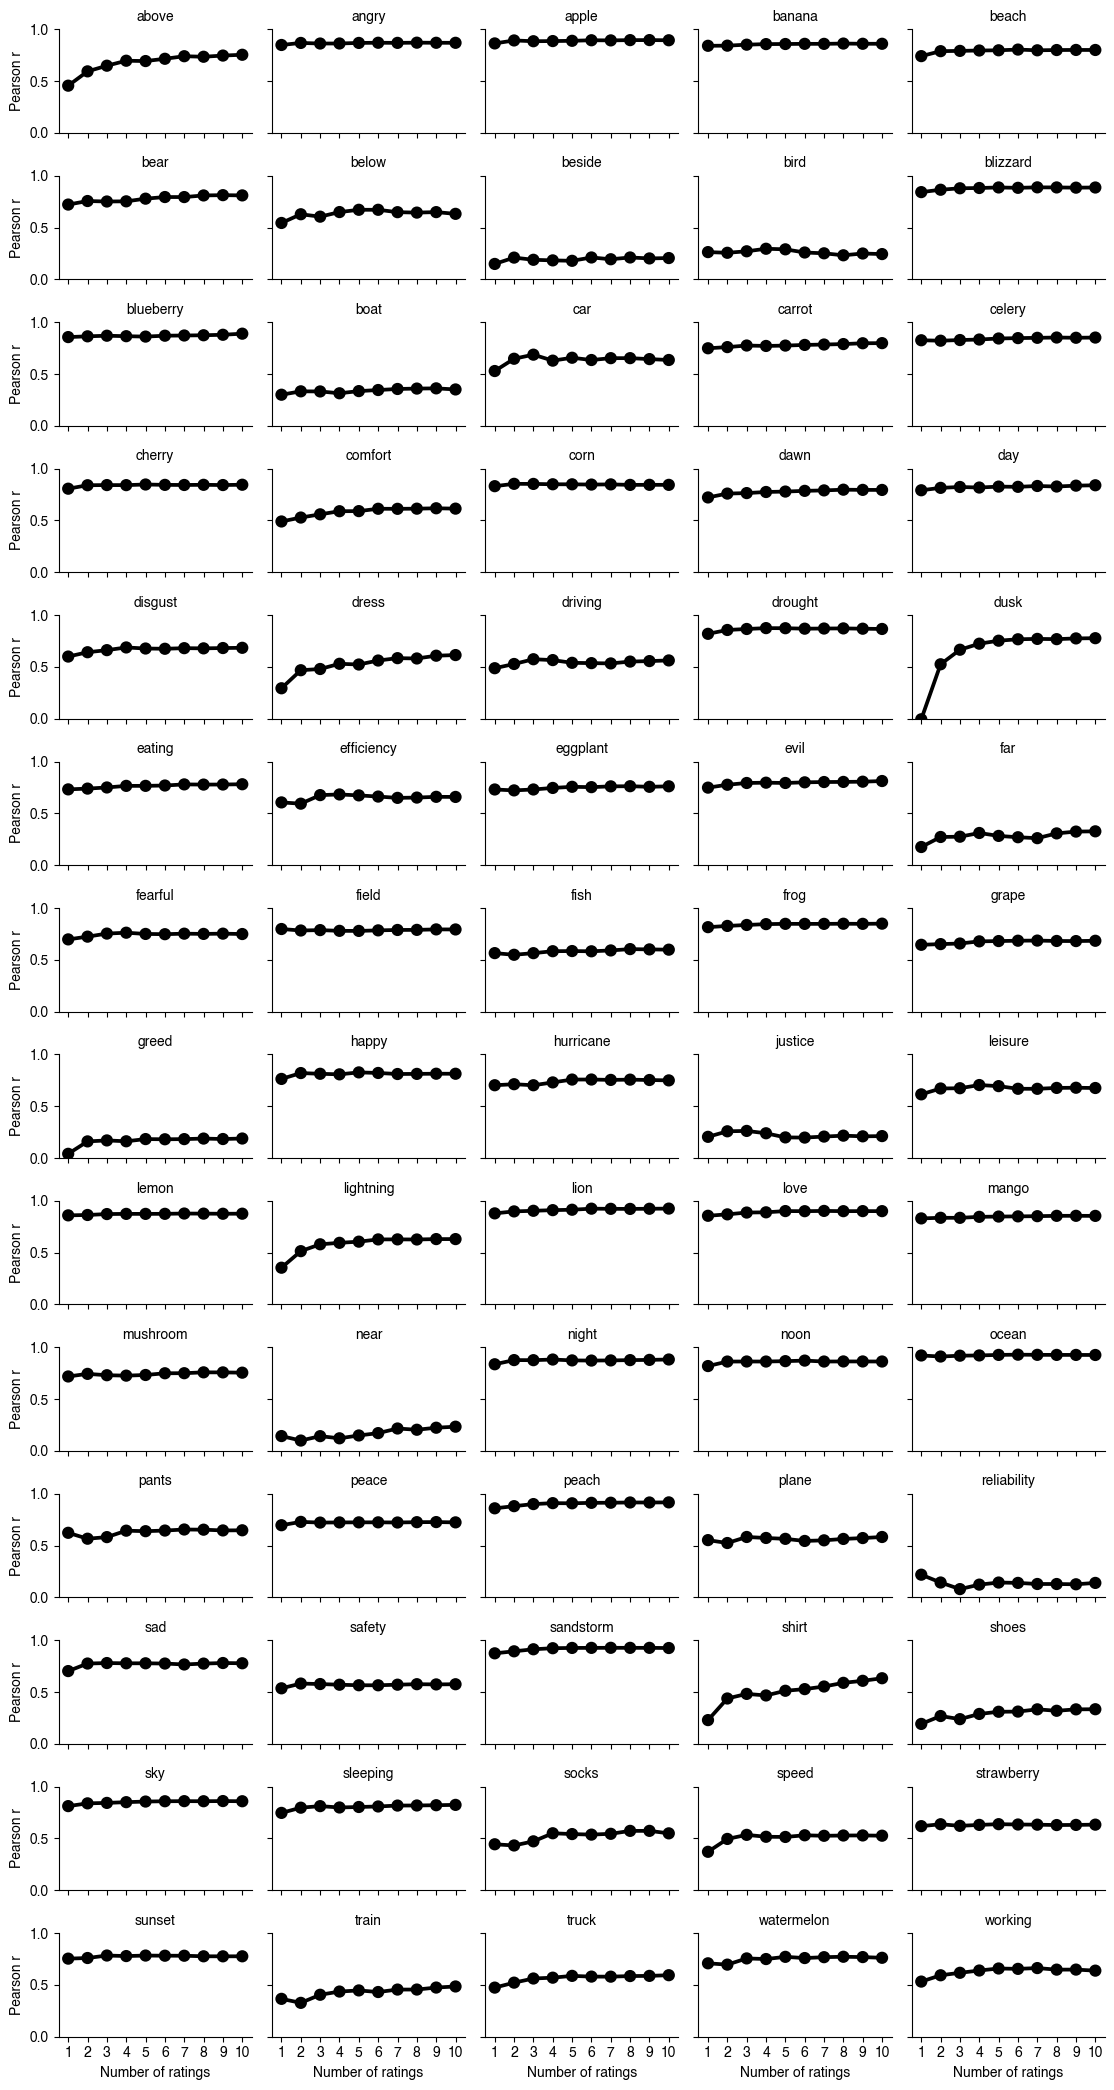

In [20]:

### make a faceted plot using multirate_plot_df where each facet is a concept and the x axis is the number of ratings and the y axis is the correlation between the ratings and the human ratings
g = sns.FacetGrid(multirate_plot_df, col="concept", col_wrap=5, height=1.5, aspect=1.5)
g.map(sns.pointplot, "num_ratings", "r", color='black')
g.set(ylim=(0, 1))
g.set_axis_labels("Number of ratings", "Pearson r")
g.set_titles("{col_name}")
plt.tight_layout()

In [149]:
cons =[]
cors_noanchor = []
cors_anchor = []
cors_multiple = []
spec=[]
for this_concept in gpt_assoc_anchor_df.concept:
    cons.append(this_concept)
    cors_noanchor.append(pearsonr(gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_anchor.append(pearsonr(gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_multiple.append(pearsonr(gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])

    spec.append(1/entropy(ratings_all[ratings_all.index==this_concept].values[0]))
gpt_cor_df = pd.DataFrame({'concept':cons,'cor_noanchor':cors_noanchor,'cor_anchor': cors_anchor,'cor_multiple':cors_multiple,'specificity':spec})



In [150]:
gpt_cor_df['mean_d'] = diff_df.mean_d.values

In [151]:
pearsonr(gpt_cor_df.mean_d.values,gpt_cor_df.specificity.values)

(-0.23574543748347268, 0.04945357436508602)

mean correlation: 0.6662547658756296


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


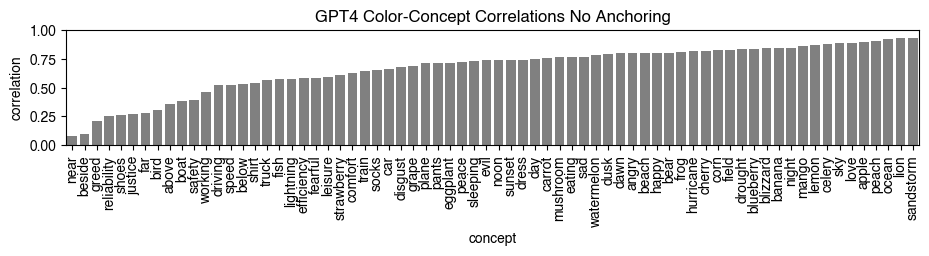

In [152]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_noanchor', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_noanchor.values, color='grey')
sns.barplot(x='concept',y='cor_noanchor',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations No Anchoring')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_noanchor.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_no_anchor_cors.pdf',format ='pdf',bbox_inches='tight')
# plt.savefig()

mean correlation: 0.6583742648465543


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


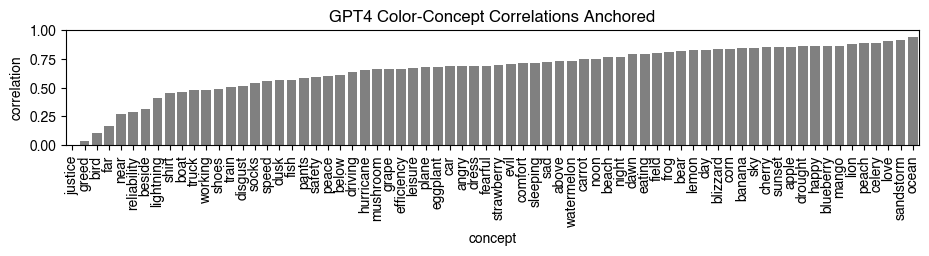

In [153]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_anchor', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_anchor.values, color='grey')
sns.barplot(x='concept',y='cor_anchor',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Anchored')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_anchor.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_anchored_cors.pdf',format ='pdf',bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


mean correlation: 0.68473334533552


Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


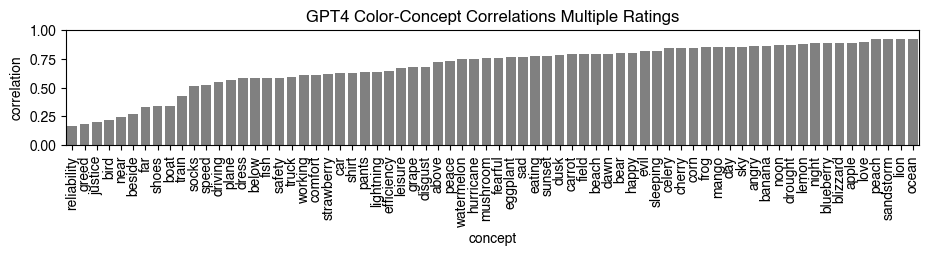

In [154]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_multiple', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_multiple.values, color='grey')
sns.barplot(x='concept',y='cor_multiple',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Multiple Ratings')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_multiple.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_multiple_rate_cors.pdf',format ='pdf',bbox_inches='tight')

In [158]:
concept2cat_dict = {'dress':'clothes','pants':'clothes','shirt':'clothes','shoes':'clothes','socks':'clothes',
                    'above':'directions','below':'directions','beside':'directions','far':'directions','near':'directions',
                    'angry':'emotions','happy':'emotions','sad':'emotions','fearful':'emotions','disgust':'emotions',
                    'blueberry':'fruits','mango':'fruits','lemon':'fruits','strawberry':'fruits','watermelon':'fruits',
                    'beach':'scenes','field':'scenes','ocean':'scenes','sky':'scenes','sunset':'scenes',
                    'day':'times-of-day','dawn':'times-of-day','dusk':'times-of-day','night':'times-of-day','noon':'times-of-day',
                    'bear':'animals','bird':'animals','fish':'animals','frog':'animals','lion':'animals',
                    'blizzard':'weather','drought':'weather','hurricane':'weather','lightning':'weather','sandstorm':'weather',
                    'boat':'vehicles','car':'vehicles','plane':'vehicles','truck':'vehicles','train':'vehicles',
                    'evil':'values','greed':'values','justice':'values','love':'values','peace':'values',
                    'reliability':'properties','efficiency':'properties','speed':'properties','safety':'properties','comfort':'properties',
                    'driving':'activities','sleeping':'activities','working':'activities','eating':'activities','leisure':'activities',
                    'peach':'fruits_2','grape':'fruits_2','cherry':'fruits_2','apple':'fruits_2','banana':'fruits_2',
                    'carrot':'vegetables','mushroom':'vegetables','corn':'vegetables','celery':'vegetables','lettuce':'vegetables','eggplant':'vegetables'
                    }


gpt_cor_df['category'] = gpt_cor_df.concept.map(concept2cat_dict)
### create a new dictionary where the keys are the unique values in concept2cat_dict and the values are the keys for the unique values in concept2cat_dict

cat2concept_dict =  {'clothes':['dress','pants','shirt','shoes','socks'],
                    'directions':['above','below','beside','far','near'],
                    'emotions':['angry','happy','sad','fearful','disgust'],
                    'fruits':['blueberry','mango','lemon','strawberry','watermelon'],
                    'scenes':['beach','field','ocean','sky','sunset'],
                    'times-of-day':['day','dawn','dusk','night','noon'],
                    'animals':['bear','bird','fish','frog','lion'],
                    'weather':['blizzard','drought','hurricane','lightning','sandstorm'],
                    'vehicles':['boat','car','plane','truck','train'],
                    'values':['evil','greed','justice','love','peace'],
                    'properties':['reliability','efficiency','speed','safety','comfort'],
                    'activities':['driving','sleeping','working','eating','leisure'],
                    'fruits_2':['peach','grape','cherry','apple','banana'],
                    'vegetables':['carrot','mushroom','corn','celery','lettuce','eggplant']                     
                     }


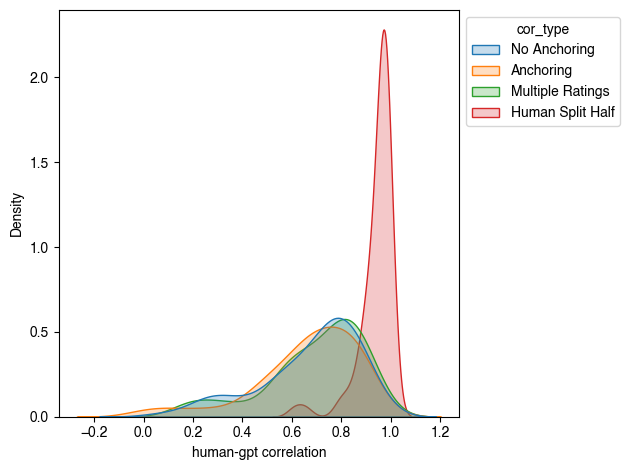

In [159]:
sns.kdeplot(x='cor', hue='cor_type',data=gpt_cor_df_long, fill=True)
# plt.xlim(0,1)
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('human-gpt correlation')
### move the seaborn legend in the top left
plt.tight_layout()
# plt.savefig('../../plots/density.pdf',format ='pdf',bbox_inches='tight')
plt.show()

In [160]:
all_raw = pd.concat([set_1_raw,set_2_raw,set_3_raw])
corrected_shs = []
con=[]
for i in range(50):
    for this_concept in ratings_all.index:
        this_concept_ratings = all_raw[all_raw.prompt==this_concept]
        sub_1 = np.random.choice(this_concept_ratings.subject_id.unique(), int(this_concept_ratings.subject_id.nunique()/2), replace=False)
        sub_2 = np.setdiff1d(this_concept_ratings.subject_id, sub_1)
        g1_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_1)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g2_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_2)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g1_ratings = make_ratings_mat(g1_grouped)[0]
        g2_ratings = make_ratings_mat(g2_grouped)[0]
        con.append(this_concept)
        corrected_shs.append(2*pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]/(1+pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]))



In [161]:
sh_df = pd.DataFrame({'concept':con,'sh':corrected_shs})
mean_sh_df = sh_df.groupby('concept').sh.agg(mean_sh='mean').reset_index()
gpt_cor_df = gpt_cor_df.merge(mean_sh_df, on='concept')

In [233]:
### pivot gpt_cor_df into long format where the column names cor_noanchor, cor_anchor, and cor_multiple are values in a column called 'cor_type' and the values in each go into a column called 'cor'
# gpt_cor_df_long = pd.melt(gpt_cor_df, id_vars=['concept','specificity'], value_vars=['cor_noanchor','cor_anchor','cor_multiple'], var_name='cor_type', value_name='cor')

gpt_cor_df_long = pd.melt(gpt_cor_df, id_vars=['concept','category','specificity'], value_vars=['cor_noanchor','cor_anchor','cor_multiple','mean_sh'], var_name='cor_type', value_name='cor')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


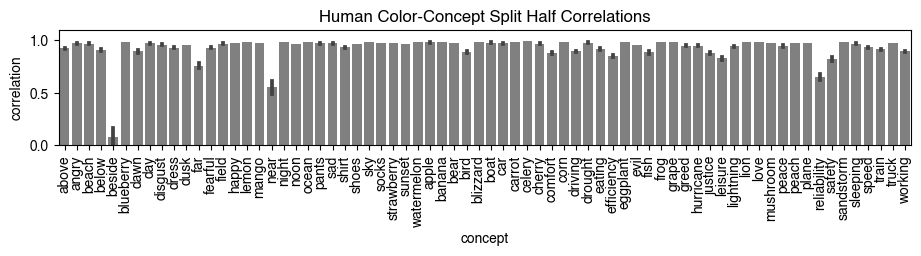

In [234]:

plt.figure(figsize=(11,1.5))
### sort sh_df by concept and do it in the order of the concept_order dictionary
sh_df['order'] = sh_df.concept.map(concept_order)
sh_df.sort_values(by='order', inplace=True)



sns.barplot(x='concept', y='sh',data=sh_df, color='grey')
plt.ylim(0,1.1)
### rotate the xticks by 90 degrees
plt.xticks(rotation=90)
plt.ylabel('correlation')
plt.title('Human Color-Concept Split Half Correlations')
plt.tight_layout()
plt.savefig('../../plots/human_split_half.pdf',format ='pdf',bbox_inches='tight')

In [198]:
gpt_cor_df.mean_sh.mean()

0.927461927608643

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


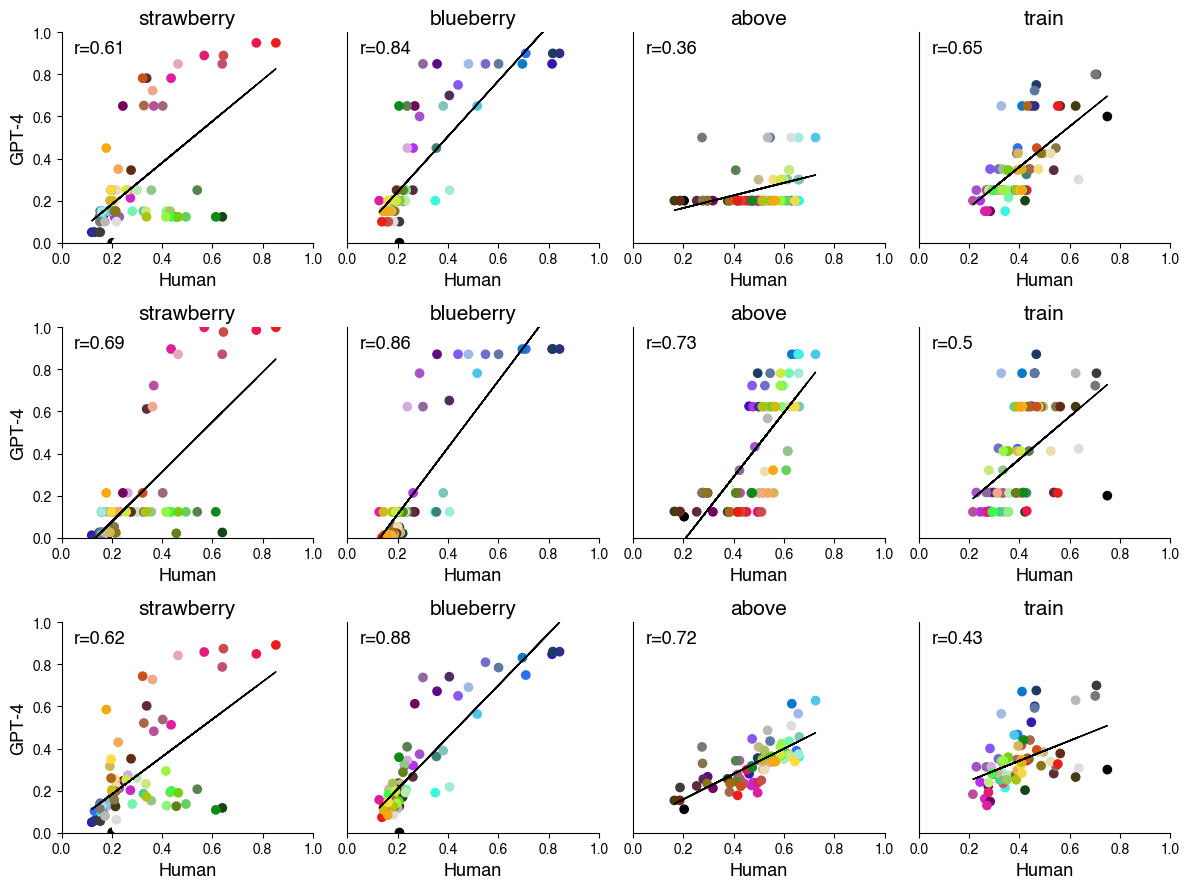

In [199]:
# scatter_dict ={'high':['above','above','above'],'medium':['love','love','love'],'low':['plane','plane','plane']}
scatter_dict = { 'strawberry':['noanc','anc','multiple'],
                'blueberry':['noanc','anc','multiple'],
                # 'love':['noanc','anc','multiple'],
                'above':['noanc','anc','multiple'],
                'train':['noanc','anc','multiple'],}

p_count=1
fig = plt.figure(1,figsize=(12,9))
for i,this_concept in enumerate(scatter_dict.keys()):
    for this_cat in scatter_dict[this_concept]:
        # ax = fig.add_subplot(3,5,p_count)
        x = ratings_all[ratings_all.index==this_concept].values[0]
        if this_cat=='noanc':
            ax = fig.add_subplot(3,4,1+i)
            if i==0:
                plt.ylabel('GPT-4',fontsize=13)
            else:
                plt.ylabel('')
                plt.yticks([])
            plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
            y = gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0]
            m, b = np.polyfit(x, y, 1)
            plt.plot(x, m*x + b, color='black', linewidth=1)
            plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)
        if this_cat=='anc':
            ax = fig.add_subplot(3,4,5+i)
            if i==0:
                plt.ylabel('GPT-4',fontsize=13)
            else:
                plt.ylabel('')
                plt.yticks([])
            plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
            y = gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0]
            m, b = np.polyfit(x, y, 1)
            plt.plot(x, m*x + b, color='black', linewidth=1)
            plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)
        if this_cat=='multiple':
            ax = fig.add_subplot(3,4,9+i)
            if i==0:
                plt.ylabel('GPT-4',fontsize=13)
            
            else:
                plt.ylabel('')
                plt.yticks([])
           
            plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
            y = gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0]
            m, b = np.polyfit(x, y, 1)
            plt.plot(x, m*x + b, color='black', linewidth=1)
            plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)

        ## plot a best fit line through the points

        # if p_count==1 or p_count==4 or p_count==7 or p_count==10:
        #     plt.ylabel('GPT-4')
      

        plt.ylim([0,1])
        plt.xlim([0,1])
        plt.xlabel('Human', fontsize=13)
        sns.despine()
        
        plt.title(this_concept,fontsize=15)
        plt.tight_layout()
        p_count+=1

plt.savefig('../../plots/high_med_low.pdf',format ='pdf',bbox_inches='tight')
plt.show()

In [235]:

gpt_cor_df_long['cor_type'] = gpt_cor_df_long.cor_type.map({'cor_noanchor':'No Anchoring','cor_anchor':'Anchoring','cor_multiple':'Multiple Ratings', 'mean_sh':'Human Split Half'})

gpt_cor_df_long['category'] = pd.Categorical(gpt_cor_df_long.category, categories=['fruits_2', 'fruits','vegetables','clothes','directions','emotions','scenes','times-of-day','animals','weather','vehicles','values','properties','activities'])

gpt_cor_df_long['entropy'] = 1/gpt_cor_df_long['specificity']
gpt_cor_df_long['normalized_H_add_inv'] = 1-(gpt_cor_df_long['entropy']-gpt_cor_df_long['entropy'].min())/(gpt_cor_df_long['entropy'].max()-gpt_cor_df_long['entropy'].min())

gpt_cor_df_long['log_spec'] = np.log(gpt_cor_df_long['normalized_H_add_inv'])

### remove any rows with log_spec == -inf

gpt_cor_df_long = gpt_cor_df_long[gpt_cor_df_long.log_spec != -np.inf]



In [236]:
custom_pal = sns.color_palette("Greys", n_colors=5)
custom_pal

[(0.9125259515570934, 0.9125259515570934, 0.9125259515570934),
 (0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


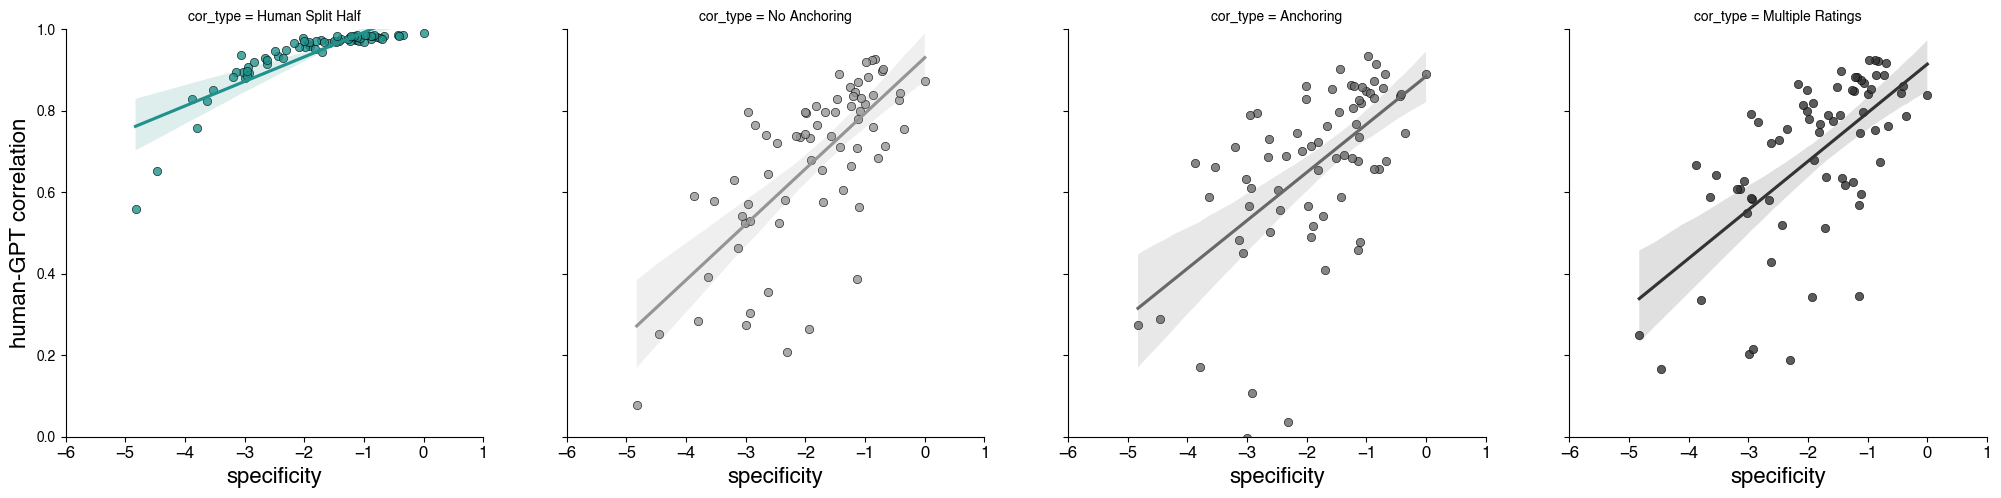

In [237]:

### create a custom palette the first 3 color from greys
custom_pal = sns.color_palette("Greys", n_colors=5)
custom_pal = custom_pal[2:]
### append the first color of viridis to the start of the palette
custom_pal.insert(0,sns.color_palette("viridis", n_colors=1)[0])


ax = sns.lmplot(x='log_spec',y='cor',hue='cor_type',col='cor_type',\
                hue_order=['Human Split Half','No Anchoring','Anchoring','Multiple Ratings'],\
                    col_order=['Human Split Half','No Anchoring','Anchoring','Multiple Ratings'],\
                          data=gpt_cor_df_long, height=5, aspect=1,palette=custom_pal,fit_reg=True, scatter_kws={'edgecolor':'black','linewidth':.5})

plt.ylim([0,1])


ax.set_ylabels('human-GPT correlation', fontsize=16)
# ax.set_xlabels('specificity \n log(1-normalized $H$)', fontsize=16)
ax.set_xlabels('specificity', fontsize=16)
##pad the gaps between plots
plt.subplots_adjust(wspace=.2, hspace=.2)

## round the xtick values to 2 decimal places
# ax.set_xticklabels(np.round(ax.get_xticks(),2),fontsize=12)
ax.set_xticklabels(fontsize=12)



plt.savefig('../../plots/specificityVcor.pdf',format ='pdf',bbox_inches='tight')


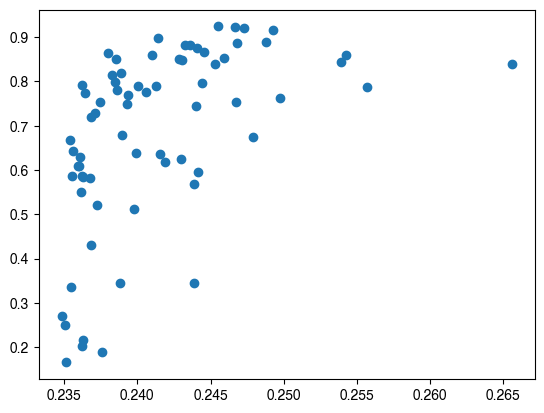

In [178]:
plt.scatter(gpt_cor_df.specificity.values,gpt_cor_df.cor_multiple.values)

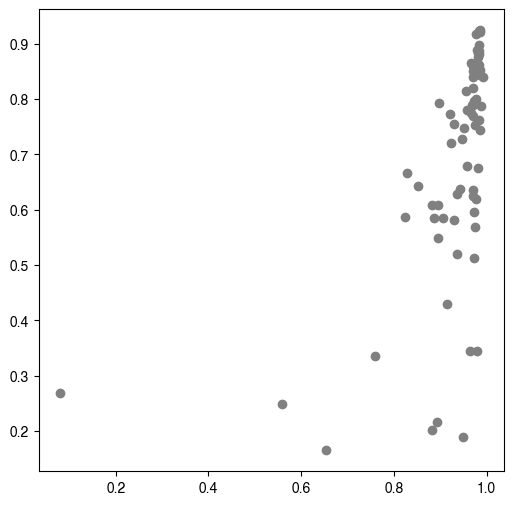

In [179]:
plt.figure(figsize=(6,6))
plt.scatter(gpt_cor_df.mean_sh.values,gpt_cor_df.cor_multiple.values, color='grey')

Text(0.5, 0, 'log Human split half correlation')

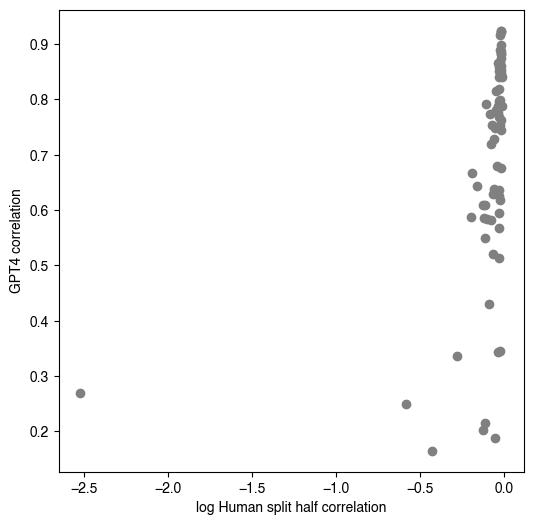

In [180]:
plt.figure(figsize=(6,6))
plt.scatter(np.log(gpt_cor_df.mean_sh.values),(gpt_cor_df.cor_multiple.values), color='grey')
plt.ylabel('GPT4 correlation')
plt.xlabel('log Human split half correlation')

Text(0.5, 0, 'log Human split half correlation')

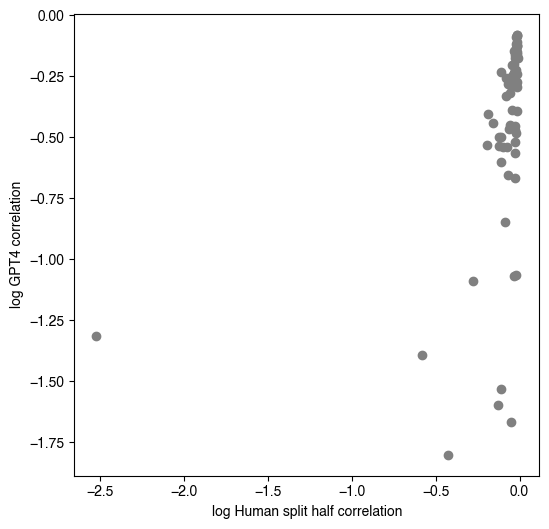

In [181]:
plt.figure(figsize=(6,6))
plt.scatter(np.log(gpt_cor_df.mean_sh.values),np.log(gpt_cor_df.cor_multiple.values), color='grey')
plt.ylabel('log GPT4 correlation')
plt.xlabel('log Human split half correlation')

In [182]:
gpt_cor_df

concept  cor_noanchor  cor_anchor  cor_multiple  specificity  \
0   reliability      0.252390    0.289485      0.165143     0.235128   
1         greed      0.208179    0.035811      0.188959     0.237560   
2       justice      0.274720   -0.001911      0.202512     0.236187   
3          bird      0.304665    0.107650      0.216119     0.236286   
4          near      0.076745    0.273077      0.248792     0.235032   
..          ...           ...         ...           ...          ...   
65         love      0.889202    0.902132      0.897637     0.241420   
66        peach      0.903613    0.889141      0.916878     0.249237   
67    sandstorm      0.926656    0.914234      0.921067     0.247272   
68         lion      0.925520    0.873540      0.923607     0.246671   
69        ocean      0.920299    0.934439      0.924103     0.245483   

      mean_d    category   mean_sh  
0  -0.008816  properties  0.653049  
1   0.016414      values  0.948317  
2   0.000793      values  0.881428  
3  -0.002126     animals  0.892490  
4   0.010048  directions  0.558294  
..       ...         ...       ...  
65  0.004971      values  0.982756  
66  0.006373    fruits_2  0.976288  
67  0.005691     weather  0.986639  
68  0.005118     animals  0.982744  
69  0.000534      scenes  0.986544  

[70 rows x 8 columns]

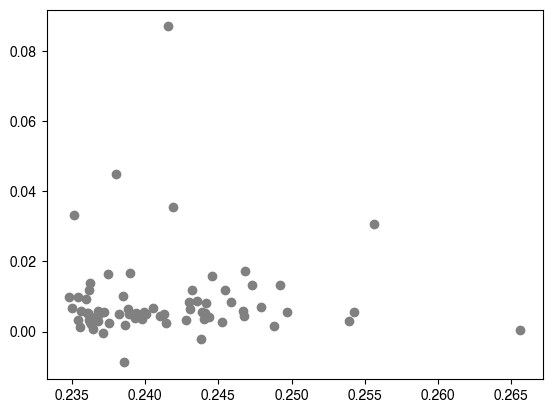

In [183]:
plt.scatter(gpt_cor_df.specificity.values,diff_df.mean_d.values, color='grey')

In [184]:
pearsonr(gpt_cor_df.specificity.values,gpt_cor_df.cor_noanchor.values)

(0.5652456001737423, 3.4323727089369445e-07)

In [185]:
pearsonr(gpt_cor_df.specificity.values,gpt_cor_df.cor_anchor.values)

(0.5134452461577071, 5.483212380326716e-06)

In [186]:
pearsonr(gpt_cor_df.specificity.values,gpt_cor_df.cor_multiple.values)

(0.5099513773731705, 6.505077708965632e-06)

In [187]:
pearsonr(gpt_cor_df.mean_sh.values,gpt_cor_df.specificity.values)

(0.41871509883572544, 0.00030927238659023273)

In [188]:
### import the scipy module for paired t-tests
from scipy.stats import ttest_rel

In [189]:



### exp 1 split half vs. gpt zero temp
ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_noanchor.values)

Ttest_relResult(statistic=13.676212712402624, pvalue=2.515617928072221e-21)

In [190]:
### exp 2 split half vs. gpt zero temp anchoring
print(ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_anchor.values))
### exp 2 gpt zero temp vs. gpt zero temp anchoring
print(ttest_rel(gpt_cor_df.cor_noanchor.values, gpt_cor_df.cor_anchor.values))

Ttest_relResult(statistic=11.986454227310723, pvalue=1.5750306969972498e-18)
Ttest_relResult(statistic=0.6022930340802884, pvalue=0.5489533271790907)


In [191]:
## exp 3 split half vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_multiple.values))

## exp 3 no anchoring vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.cor_multiple.values,gpt_cor_df.cor_noanchor.values))

## exp 3 anchoring vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.cor_multiple.values,gpt_cor_df.cor_anchor.values))

Ttest_relResult(statistic=11.967140166642205, pvalue=1.6987767451424609e-18)
Ttest_relResult(statistic=1.8088688829871726, pvalue=0.07482797444812915)
Ttest_relResult(statistic=2.556998834509528, pvalue=0.012760701206756264)


[(0.127568, 0.566949, 0.550556),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


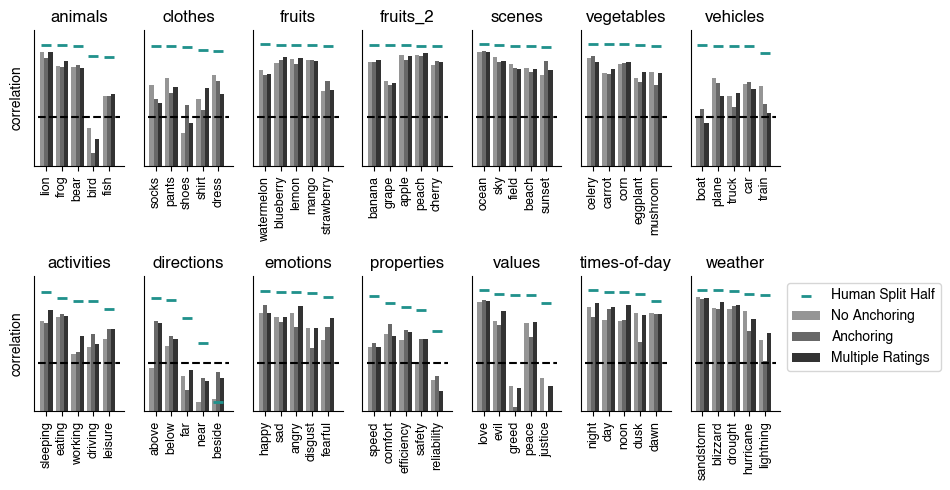

In [229]:

### make a faceted plot where each facet is by category and each plot is a grouped barplot grouped by concept and where the y values are cor_noanchor, cor_anchor, and cor_multiple

gpt_cor_df_long = pd.melt(gpt_cor_df, id_vars=['concept','category','specificity'], value_vars=['cor_noanchor','cor_anchor','cor_multiple','mean_sh'], var_name='cor_type', value_name='cor')

gpt_cor_df_long['cor_type'] = gpt_cor_df_long.cor_type.map({'cor_noanchor':'No Anchoring','cor_anchor':'Anchoring','cor_multiple':'Multiple Ratings', 'mean_sh':'Human Split Half'})

gpt_cor_df_long['category'] = pd.Categorical(gpt_cor_df_long.category, categories=['fruits_2', 'fruits','vegetables','clothes','directions','emotions','scenes','times-of-day','animals','weather','vehicles','values','properties','activities'])


barplot_concepts = ['animals','clothes','fruits','fruits_2','scenes','vegetables','vehicles','activities','directions','emotions','properties','values','times-of-day','weather']
p_count=1
fig = plt.figure(1,figsize=(8,5))
for this_cat in barplot_concepts:
    df_s = gpt_cor_df_long[gpt_cor_df_long.category==this_cat]
    df_sh = df_s[df_s['cor_type'] == 'Human Split Half']

    no_anchor_df = df_s[df_s['cor_type'] == 'Human Split Half']

    # sort the 'no_anchor_df' by the 'cor' column in descending order
    sorted_no_anchor_df = no_anchor_df.sort_values(by='cor', ascending=False)

    # extract the sorted 'concept' column from the 'sorted_no_anchor_df'
    sorted_concepts = sorted_no_anchor_df['concept']

    ax = fig.add_subplot(2,7,p_count)
    sns.barplot(data=df_s,x='concept', y='cor', hue='cor_type',order=sorted_concepts,hue_order= ['No Anchoring','Anchoring','Multiple Ratings'],  palette=custom_pal[1:],ax=ax)
    sns.pointplot(data=df_sh,x='concept', y='cor', hue='cor_type',order=sorted_concepts,hue_order= ['Human Split Half'],  palette='viridis',ax=ax,join=False, markers='_', scale=1)
    ### rotate the xticks by 90 degrees
    plt.hlines(y=0.395, xmin=-0.5, xmax=4.7, colors='black', linestyles='dashed', label='')
    plt.xticks(rotation=90, fontsize=9)
    plt.ylim(0,1.1)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(this_cat)
    ## remove the top and right spines
    sns.despine()
    if p_count==1 or p_count==8:
        plt.ylabel('correlation')
    if p_count!=1 or p_count!=8:
        plt.yticks([])
    ### hide the legend
    ax.get_legend().remove()
    
    plt.tight_layout()

        # plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_multiple[gpt_assoc_multiple.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
        # plt.ylim([0,1])
        # plt.xlim([0,1])
        # plt.xlabel('Human')
        # plt.ylabel('GPT-4')
        # plt.title(this_concept)
        # plt.tight_layout()
    p_count+=1
### add the legend to the final facet

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.savefig('../../plots/cors.pdf',format ='pdf',bbox_inches='tight')
plt.show()

In [63]:


### remove any rows with log_spec == -inf

# gpt_cor_df = gpt_cor_df[gpt_cor_df.log_spec != -np.inf]

In [64]:


## add a column to multirate_plot_df called 'specificity' that is equal to the value of the specificty column in gpt_cor_df for the concept in each row
gpt_cor_df['normalized_H_add_inv'] = 1-((1/gpt_cor_df['specificity'])-(1/gpt_cor_df['specificity']).min())/((1/gpt_cor_df['specificity']).max()-(1/gpt_cor_df['specificity']).min())
gpt_cor_df['log_spec'] = np.log(gpt_cor_df['normalized_H_add_inv'])

multirate_plot_df['specificity'] = multirate_plot_df.concept.map(gpt_cor_df.set_index('concept').log_spec)

In [239]:
multirate_plot_df.specificity.min()

-inf

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


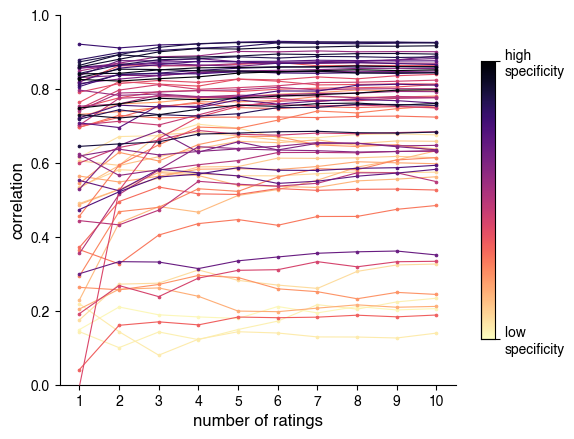

In [250]:
# plot the data
import matplotlib.cm as cm

# norm = plt.Normalize(multirate_plot_df.specificity.min(), multirate_plot_df.specificity.max())
norm = plt.Normalize(gpt_cor_df_long.log_spec.min(), gpt_cor_df_long.log_spec.max())
sm = plt.cm.ScalarMappable(cmap="magma_r", norm=norm)

ax = sns.pointplot(x='num_ratings', y='r', hue='specificity', data=multirate_plot_df, palette='magma_r',scale=.3)
ax.get_legend().remove()
### label the colorbar specificity
cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.75)

cbar.set_ticks([gpt_cor_df_long.log_spec.min(), gpt_cor_df_long.log_spec.max()])

# Set the labels for the ticks
cbar.set_ticklabels(['low \nspecificity', 'high \nspecificity'])

plt.xticks(np.arange(10),np.arange(1,11), fontsize=10)
plt.ylabel('correlation', fontsize=12)
plt.ylim([0,1])
plt.xlabel('number of ratings', fontsize=12)
### despine the plot
sns.despine()
plt.savefig('../../plots/num_ratings_vs_cor.pdf',format ='pdf',bbox_inches='tight')
# display the plot
plt.show()

In [66]:
## convert hex to rgb
def hex_to_rgb(hex_str):
    if hex_str.startswith('#'):
        hex_str = hex_str[1:]
    return tuple([int(hex_str[i:i + 2], 16) for i in range(0, len(hex_str), 2)])

In [67]:
#### Resorting the UW71 colors
import colorsys
uw71coords['hue_angle'] = uw71coords.apply( lambda x: colorsys.rgb_to_hls(*list( hex_to_rgb(x.color_hex)))[0], axis=1)
uw71coords['saturation'] = uw71coords.apply( lambda x: colorsys.rgb_to_hls(*list( hex_to_rgb(x.color_hex)))[1], axis=1)
uw71coords['lightness'] = uw71coords.apply( lambda x: colorsys.rgb_to_hls(*list( hex_to_rgb(x.color_hex)))[2], axis=1)


## resort colors according to hue then saturation and manually move one of the reds
uw71coords = uw71coords.sort_values(by=['hue_angle','saturation'],ascending=[True,False]).reset_index(drop=True)
## manually move one of the colors in the sorted list
sorted_col_order = uw71coords['color_index'].values
sorted_col_order = np.delete(sorted_col_order,3)
sorted_col_order = np.concatenate((sorted_col_order,[62]))

## sort original coordinates dataframe by color index
uw71coords= uw71coords.sort_values(by='color_index')
uw71rgb = uw71coords.loc[:,['r_rgb','g_rgb','b_rgb']].reset_index(drop=True) ## just hold on to the rgb vals
uw71regressors = np.array((np.ones((71)),uw71coords['L'],np.cos(uw71coords['H']*(np.pi/180)),\
                 np.sin(uw71coords['H']*(np.pi/180)),np.cos(2*uw71coords['H']*(np.pi/180)),\
                 np.sin(2*uw71coords['H']*(np.pi/180)),uw71coords['C']))


In [68]:
from sklearn import linear_model as lm
def colorimetric_reg(ratings,exclude_regressor=None):
    '''
    should be 71 rows and n columns
    '''
    regressors = np.array((uw71coords['L'],np.cos(uw71coords['H']*(np.pi/180)),\
                 np.sin(uw71coords['H']*(np.pi/180)),np.cos(2*uw71coords['H']*(np.pi/180)),\
                 np.sin(2*uw71coords['H']*(np.pi/180)),uw71coords['C']))
    if exclude_regressor!=None:
        regressors = np.delete(regressors,int(exclude_regressor),axis=1)


    model = lm.LinearRegression(fit_intercept=True).fit(regressors.T, ratings)
    ## print the model r^2
  
    preds = model.predict(regressors.T)
    print(ratings.shape)
    return np.hstack((model.intercept_.reshape(ratings.shape[1],1),model.coef_)),preds ## weights and predictions and r2

In [69]:
ratings_all = ratings_all.sort_index()

In [70]:
w,p = colorimetric_reg(np.array(ratings_all.T))

(71, 70)


In [71]:
sample_fig_concepts = ['above','blueberry','strawberry','train']
sample_fig_inds = []
for i, this_concept in enumerate(sample_fig_concepts):
    sample_fig_inds.append(np.where(ratings_all.index==this_concept)[0][0])

sample_preds = p[:,sample_fig_inds]



In [72]:
w[sample_fig_inds,]

array([[ 1.83198317e-01,  5.02735422e-03, -5.05989461e-02,
        -1.03830222e-01, -6.48823783e-03,  3.29430934e-02,
         8.87586246e-04],
       [ 4.47607392e-01, -1.49921445e-03, -1.03634430e-01,
        -2.32302742e-01, -9.04830391e-02,  4.00088908e-02,
        -1.86930766e-04],
       [ 2.32199582e-01, -1.25459785e-03, -1.00710569e-03,
         1.20406136e-01,  1.10471742e-01,  8.90035338e-03,
         2.43757062e-03],
       [ 5.99689300e-01, -1.40493809e-03,  2.18701623e-02,
         6.20928732e-02, -1.70524692e-02,  2.77387866e-02,
        -2.38223505e-03]])

(0.928616183080728, 2.005888307233165e-31)
(0.904267508844495, 3.314775180548149e-27)
(0.6633251387145803, 2.912213950896782e-10)
(0.7390423948160401, 1.8607637979786892e-13)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


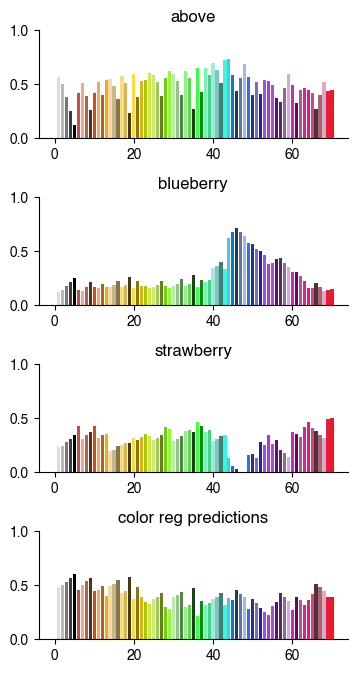

In [73]:
demo_fig = plt.figure(constrained_layout=True, figsize=(15,40))
gs = demo_fig.add_gridspec(24, 9)
# gs = gs.flatten()


for i, this_concept in enumerate(sample_fig_concepts):
    ratings_ax = demo_fig.add_subplot(gs[i, 0:2])
    ratings_ax.bar(np.arange(71),sample_preds[sorted_col_order,i], color = uw71coords.iloc[sorted_col_order,:]['color_hex'].values)
    ratings_ax.set_ylim([0,1])
    ratings_ax.set_title(this_concept)

    sns.despine(ax=ratings_ax)
    plt.tight_layout()

    print(pearsonr(sample_preds[:,i],ratings_all[ratings_all.index==this_concept].values.flatten()))
   
plt.title('color reg predictions')
plt.savefig('../../plots/predictions.pdf',format ='pdf',bbox_inches='tight')
plt.show()




In [74]:
ratings_all.head(30)

0         1         2         3         4         5   \
above       0.649375  0.461193  0.473295  0.477159  0.631136  0.500284   
angry       0.225650  0.323600  0.223300  0.304400  0.185750  0.331800   
apple       0.072092  0.064388  0.072857  0.078010  0.065153  0.094235   
banana      0.067347  0.061786  0.070204  0.067041  0.066735  0.067092   
beach       0.758500  0.575778  0.232556  0.213278  0.764333  0.613500   
bear        0.168000  0.223944  0.100278  0.090222  0.215056  0.268000   
below       0.426080  0.529886  0.427386  0.392727  0.494318  0.560682   
beside      0.489489  0.409148  0.431875  0.429943  0.473239  0.437330   
bird        0.559722  0.485278  0.360444  0.284667  0.562833  0.507444   
blizzard    0.715096  0.597788  0.411779  0.202596  0.697837  0.643413   
blueberry   0.709783  0.814130  0.440380  0.261685  0.696250  0.843967   
boat        0.678922  0.665049  0.239069  0.146078  0.690882  0.670000   
car         0.494706  0.497353  0.215686  0.132500  0.441373  0.585098   
carrot      0.051202  0.065385  0.045192  0.032981  0.065913  0.056394   
celery      0.076683  0.057115  0.058173  0.043942  0.070962  0.057596   
cherry      0.085306  0.078724  0.103061  0.169337  0.093980  0.092500   
comfort     0.497150  0.423350  0.462850  0.367150  0.486500  0.512250   
corn        0.084663  0.077308  0.069231  0.070240  0.077019  0.069038   
dawn        0.465652  0.378641  0.435435  0.404022  0.453641  0.385326   
day         0.709185  0.413587  0.485815  0.410815  0.734348  0.320054   
disgust     0.179400  0.242150  0.244350  0.264400  0.223550  0.296650   
dress       0.570469  0.587812  0.518646  0.446979  0.530521  0.611458   
driving     0.445000  0.436538  0.355769  0.230048  0.504904  0.452163   
drought     0.136971  0.147452  0.149856  0.106250  0.138125  0.205913   
dusk        0.479402  0.665924  0.586902  0.471413  0.439674  0.684022   
eating      0.319327  0.308269  0.297452  0.277933  0.343990  0.296298   
efficiency  0.569500  0.494800  0.507300  0.496300  0.575100  0.493200   
eggplant    0.073413  0.155288  0.684471  0.726202  0.075096  0.182981   
evil        0.271900  0.401600  0.375450  0.354900  0.308550  0.413800   
far         0.477159  0.537557  0.452614  0.371193  0.482330  0.576080   

                  6         7         8         9   ...        61        62  \
above       0.524091  0.296591  0.484205  0.470398  ...  0.428409  0.415682   
angry       0.218850  0.363900  0.219550  0.335300  ...  0.613950  0.825300   
apple       0.073776  0.082653  0.080561  0.107041  ...  0.365561  0.851582   
banana      0.078878  0.063827  0.074847  0.078878  ...  0.119592  0.084337   
beach       0.364667  0.192444  0.207889  0.265444  ...  0.330556  0.237333   
bear        0.113333  0.152222  0.087611  0.071778  ...  0.329333  0.284556   
below       0.484432  0.522216  0.385568  0.330625  ...  0.516989  0.486023   
beside      0.508920  0.474091  0.454034  0.437784  ...  0.430057  0.384318   
bird        0.348722  0.238667  0.241222  0.304556  ...  0.561833  0.518444   
blizzard    0.474952  0.211635  0.261731  0.205625  ...  0.182404  0.161635   
blueberry   0.549402  0.356848  0.287337  0.197935  ...  0.146522  0.137554   
boat        0.285539  0.151127  0.178382  0.160931  ...  0.219461  0.386912   
car         0.218480  0.156863  0.146225  0.132010  ...  0.322843  0.767108   
carrot      0.063846  0.080192  0.063846  0.062885  ...  0.904615  0.280433   
celery      0.068798  0.045048  0.051058  0.056635  ...  0.077115  0.044038   
cherry      0.096531  0.210765  0.149286  0.278520  ...  0.300153  0.906276   
comfort     0.554650  0.413500  0.459750  0.360850  ...  0.400600  0.321050   
corn        0.074231  0.081154  0.081106  0.075240  ...  0.191971  0.081731   
dawn        0.520489  0.322011  0.420543  0.340924  ...  0.530054  0.332935   
day         0.446196  0.249185  0.413587  0.508261  ...  0.528641  0.451576   
disgust     0.275950  0.296150  0.257100  0.273400  ...  0.44725

In [75]:
### print out a table that I can copy into latex with 7 colums, each of which will have the following values (assumer i corresponds to row in w)

 # np.round(w[i,1],3)}', fontsize=12)
# np.round(w[i,6],3)}', fontsize=12)
# np.round(w[i,2],3)}', fontsize=12)
# np.round(w[i,3],3)}', fontsize=12)
# np.round(w[i,3],3)}', fontsize=12)
# np.round(w[i,3],3)}', fontsize=12)
# np.round(w[i,0],3)}', fontsize=12)

# Assuming `w` is a numpy array containing the values

# Print the table header
print("\\begin{tabular}{|c|c|c|c|c|c|c|c|}")
print("\\hline")
print("Index & Column 1 & Column 2 & Column 3 & Column 4 & Column 5 & Column 6 & Column 7 \\\\")
print("\\hline")

# Iterate over the rows of `w` and print the values
for i in range(len(w)):
    print(f"{ratings_all.index[i]} & {np.round(w[i,1],3)} & {np.round(w[i,6],3)} & {np.round(w[i,2],3)} & {np.round(w[i,3],3)} & {np.round(w[i,3],3)} & {np.round(w[i,3],3)} & {np.round(w[i,0],3)} \\\\")
    print("\\hline")

# Print the table footer
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Index & Column 1 & Column 2 & Column 3 & Column 4 & Column 5 & Column 6 & Column 7 \\
\hline
above & 0.005 & 0.001 & -0.051 & -0.104 & -0.104 & -0.104 & 0.183 \\
\hline
angry & -0.005 & 0.001 & 0.063 & 0.099 & 0.099 & 0.099 & 0.526 \\
\hline
apple & -0.001 & 0.003 & -0.026 & 0.201 & 0.201 & 0.201 & 0.151 \\
\hline
banana & 0.002 & -0.0 & 0.027 & 0.177 & 0.177 & 0.177 & 0.062 \\
\hline
beach & 0.004 & -0.001 & -0.106 & -0.146 & -0.146 & -0.146 & 0.292 \\
\hline
bear & -0.003 & -0.004 & 0.048 & 0.167 & 0.167 & 0.167 & 0.656 \\
\hline
below & -0.005 & -0.002 & -0.021 & 0.039 & 0.039 & 0.039 & 0.808 \\
\hline
beside & 0.001 & -0.0 & -0.007 & -0.027 & -0.027 & -0.027 & 0.431 \\
\hline
bird & 0.0 & -0.002 & 0.003 & 0.023 & 0.023 & 0.023 & 0.553 \\
\hline
blizzard & 0.003 & -0.004 & -0.062 & -0.272 & -0.272 & -0.272 & 0.422 \\
\hline
blueberry & -0.001 & -0.0 & -0.104 & -0.232 & -0.232 & -0.232 & 0.448 \\
\hline
boat & 0.001 & -0.004 & -0.038 & -0.159

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


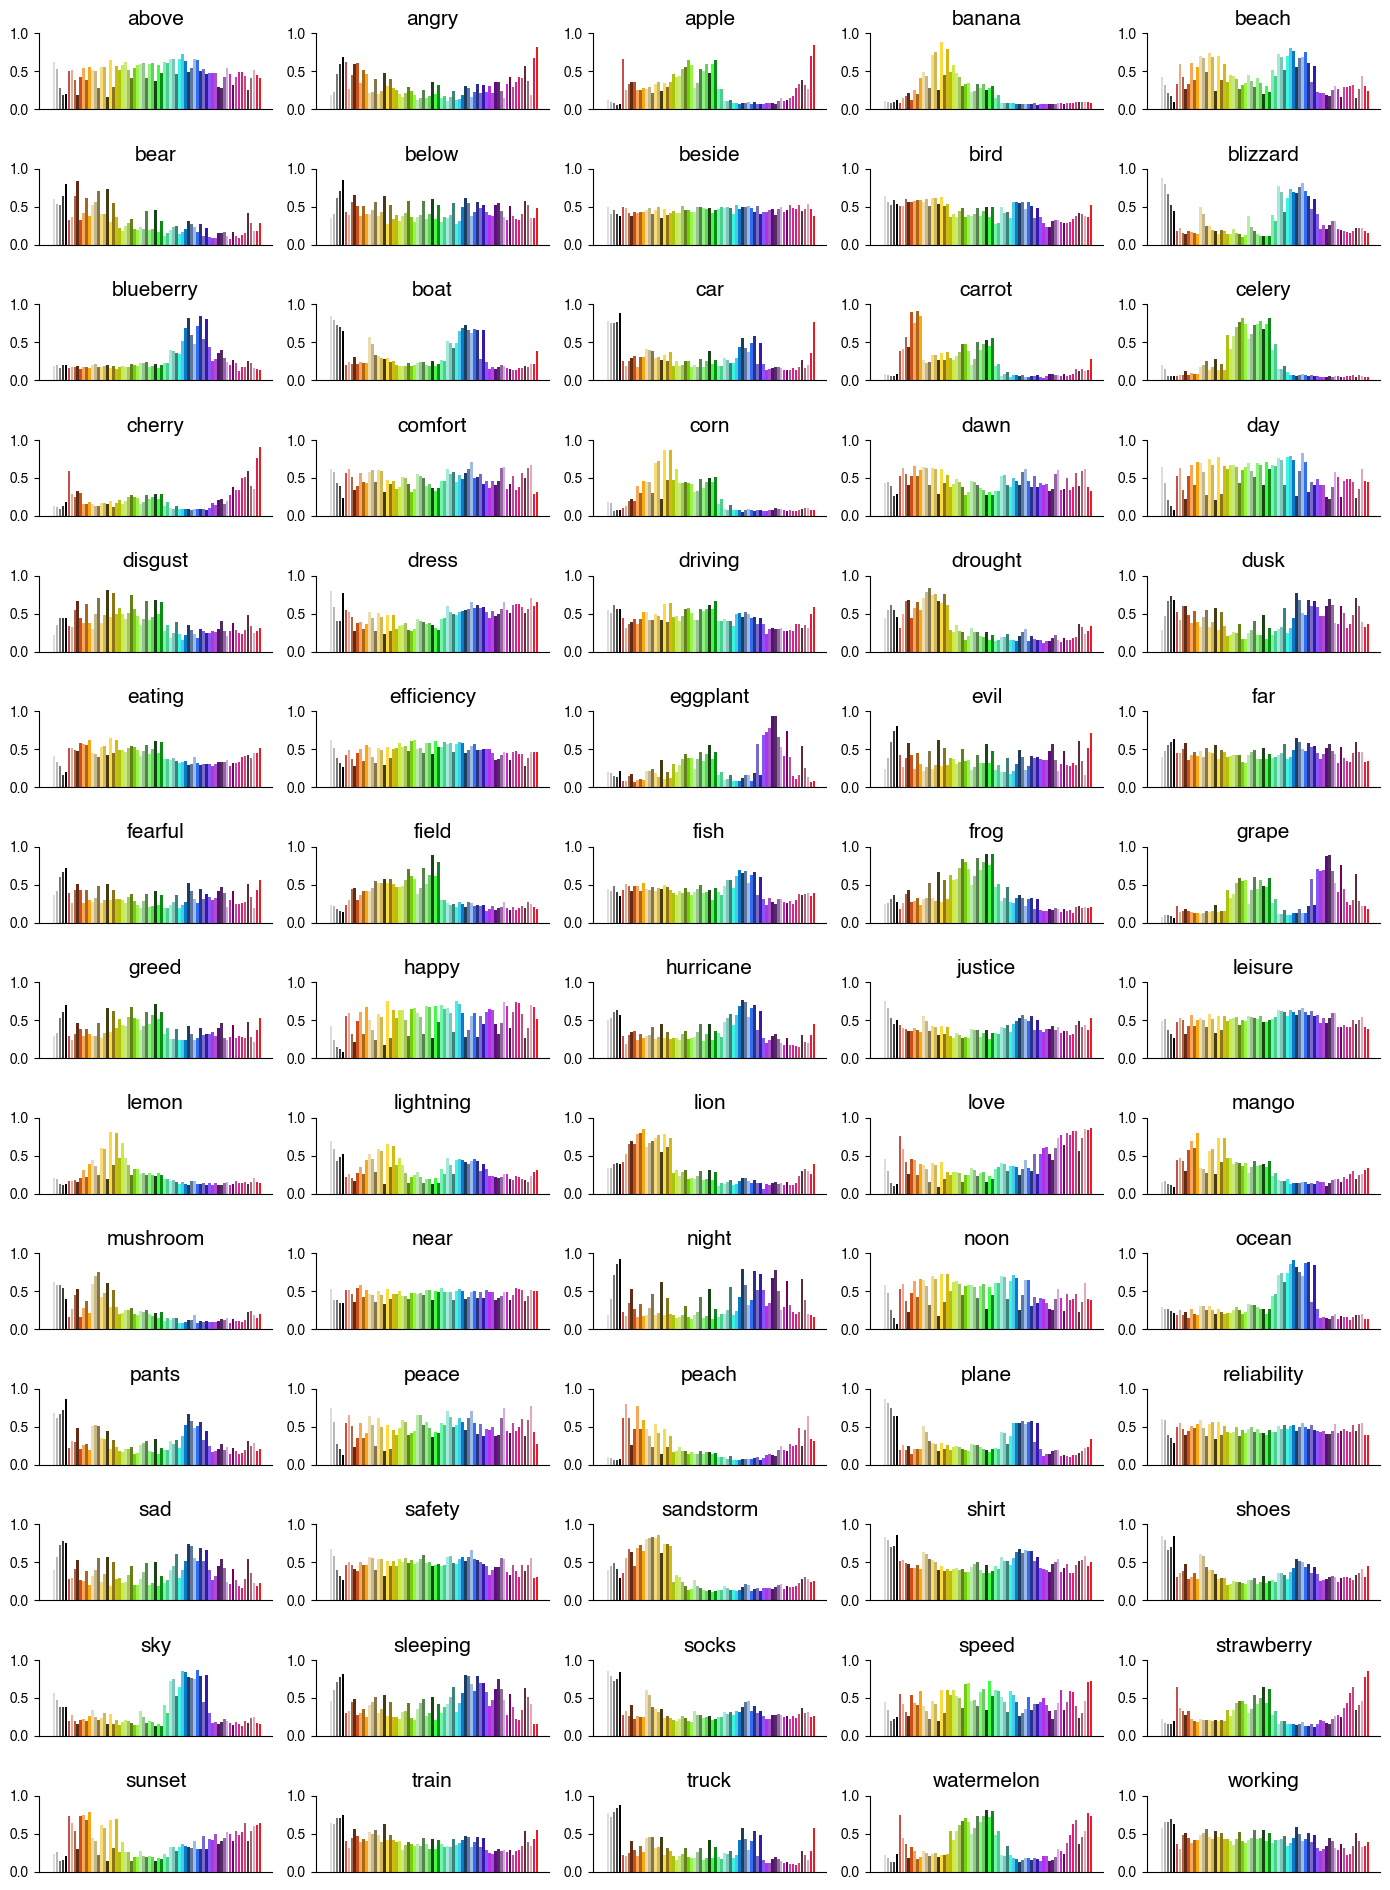

In [87]:

###make a matplotlib plot of the values in w[:,0] written in texton a 8 x 8 square plot the coordinates of the text should be the top right of the square

# plt.figure(figsize=(3,3))
# for i in range(70):
#     plt.text(1,8-i,np.round(w[i,0],3),fontsize=12)
# plt.axis('off')
# plt.tight_layout()


weight_fig = plt.figure(constrained_layout=True, figsize=(14,19))

gs = weight_fig.add_gridspec(14, 10)
for i in range(14):
    for j in range(5):
        if (2*i)+j > 69:
            break
        ratings_ax = weight_fig.add_subplot(gs[i, (2*j):2+(2*j)])
        # weights_ax = weight_fig.add_subplot(gs[i, 2+(3*j)])
        # weights_ax.text(0.1, -0.20, f'L: {np.round(w[(3*i)+j,1],3)}', fontsize=12)
        # weights_ax.text(0.1, -0.10, f'C: {np.round(w[(3*i)+j,6],3)}', fontsize=12)
        # weights_ax.text(0.1, 0.00, f'cos(H): {np.round(w[(3*i)+j,2],3)}', fontsize=12)
        # weights_ax.text(0.1, 0.10, f'sin(H): {np.round(w[(3*i)+j,3],3)}', fontsize=12)
        # weights_ax.text(0.1, 0.20, f'cos(2H): {np.round(w[(3*i)+j,3],3)}', fontsize=12)
        # weights_ax.text(0.1, 0.30, f'sin(2H): {np.round(w[(3*i)+j,3],3)}', fontsize=12)
        # weights_ax.text(0.1, 0.40, f'k: {np.round(w[(3*i)+j,0],3)}', fontsize=12)





        ratings_ax.bar(np.arange(71),ratings_all.iloc[(5*i)+j,sorted_col_order].values, color = uw71coords.iloc[sorted_col_order,:]['color_hex'].values)
        ratings_ax.title.set_position([.5, 1.05])
        ratings_ax.set_ylim([0,1])
        ratings_ax.set_title(ratings_all.index.values[(5*i)+j], fontsize=15)
        ratings_ax.set_xticks([])
        plt.tight_layout(h_pad=2)
        sns.despine(ax=ratings_ax)
        # weights_ax.axis('off')
    ### add some padding between different rows of subplots
    # plt.tight_layout(pad=2)


plt.savefig('../../plots/weights.pdf',format ='pdf',bbox_inches='tight')


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


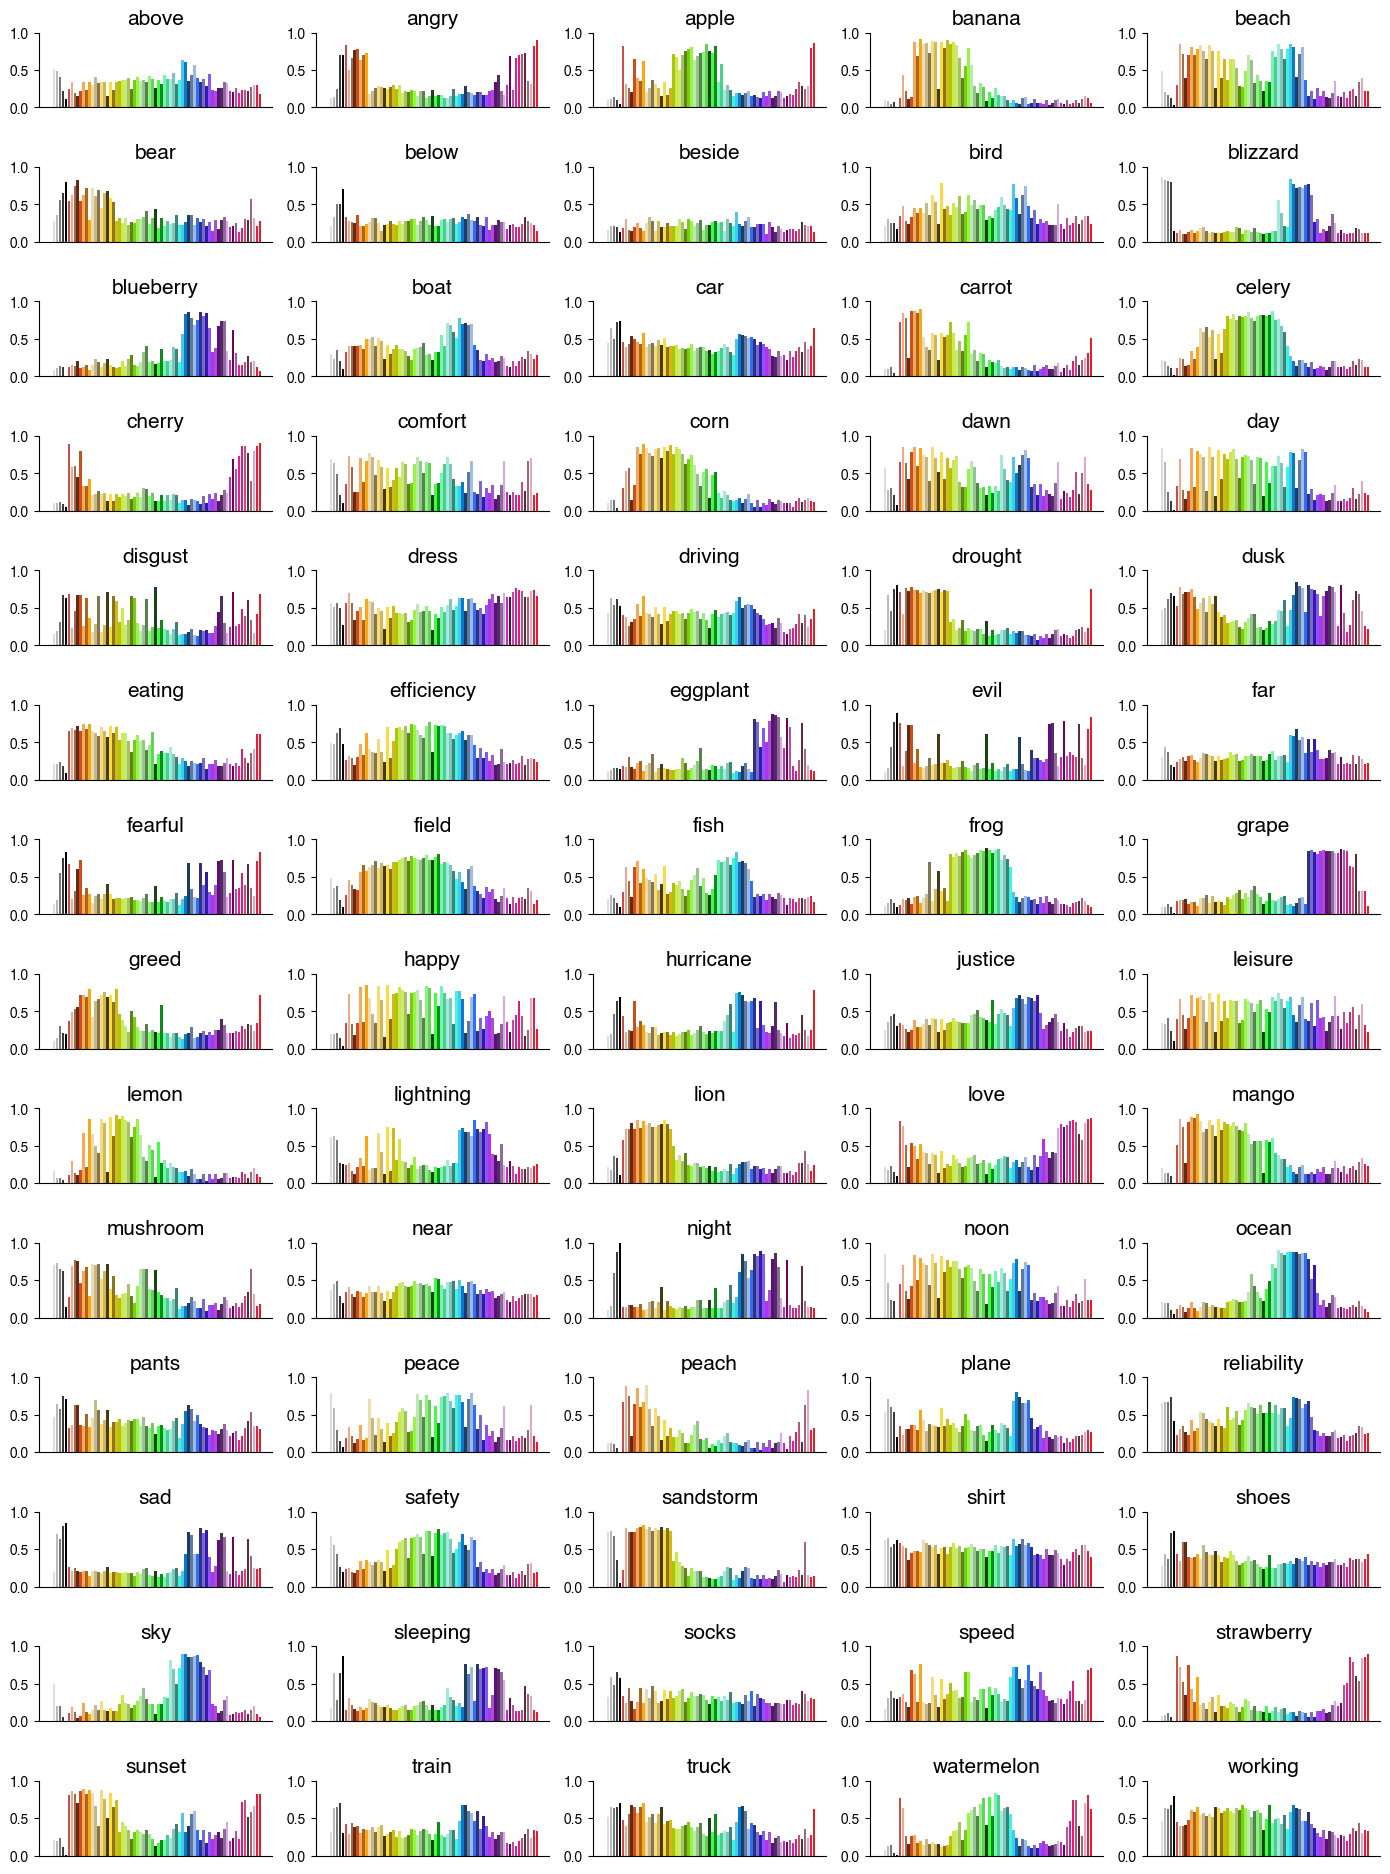

In [84]:

gpt_rate_fig = plt.figure(constrained_layout=True, figsize=(14,19))

gs = gpt_rate_fig.add_gridspec(14, 10)
for i in range(14):
    for j in range(5):
        # if (2*i)+j > 69:
        #     break
        ratings_ax = gpt_rate_fig.add_subplot(gs[i, (2*j):2+(2*j)])
        # weights_ax = weight_fig.add_subplot(gs[i, 2+(3*j)])
        # weights_ax.text(0.1, 0.05, f'L: {np.round(w[(5*i)+j,1],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.2, f'C: {np.round(w[(5*i)+j,6],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.35, f'H: {np.round(w[(5*i)+j,2],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.5, f'k: {np.round(w[(5*i)+j,0],3)}', fontsize=14)
        ratings_ax.bar(np.arange(71),gpt_assoc_multiple_grouped.iloc[(5*i)+j,sorted_col_order+1].values, color = uw71coords.iloc[sorted_col_order,:]['color_hex'].values)
        ratings_ax.set_ylim([0,1])
        ratings_ax.set_title(gpt_assoc_multiple_grouped.concept.values[(5*i)+j], fontsize=15)
        ###move the title down a bit
        ratings_ax.title.set_position([.5, 1.05])
        ### add some padding between different rows of subplots
        plt.tight_layout(h_pad=2)
        ### reduce the horizontal space between subplots
        # plt.subplots_adjust(wspace=.2)
        ### remove the x ticks
        ratings_ax.set_xticks([])
        sns.despine(ax=ratings_ax)
        # weights_ax.axis('off')
    ### add some padding between different rows of subplots
    # plt.tight_layout(pad=2)


plt.savefig('../../plots/multiple_rating_dists.pdf',format ='pdf',bbox_inches='tight')


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


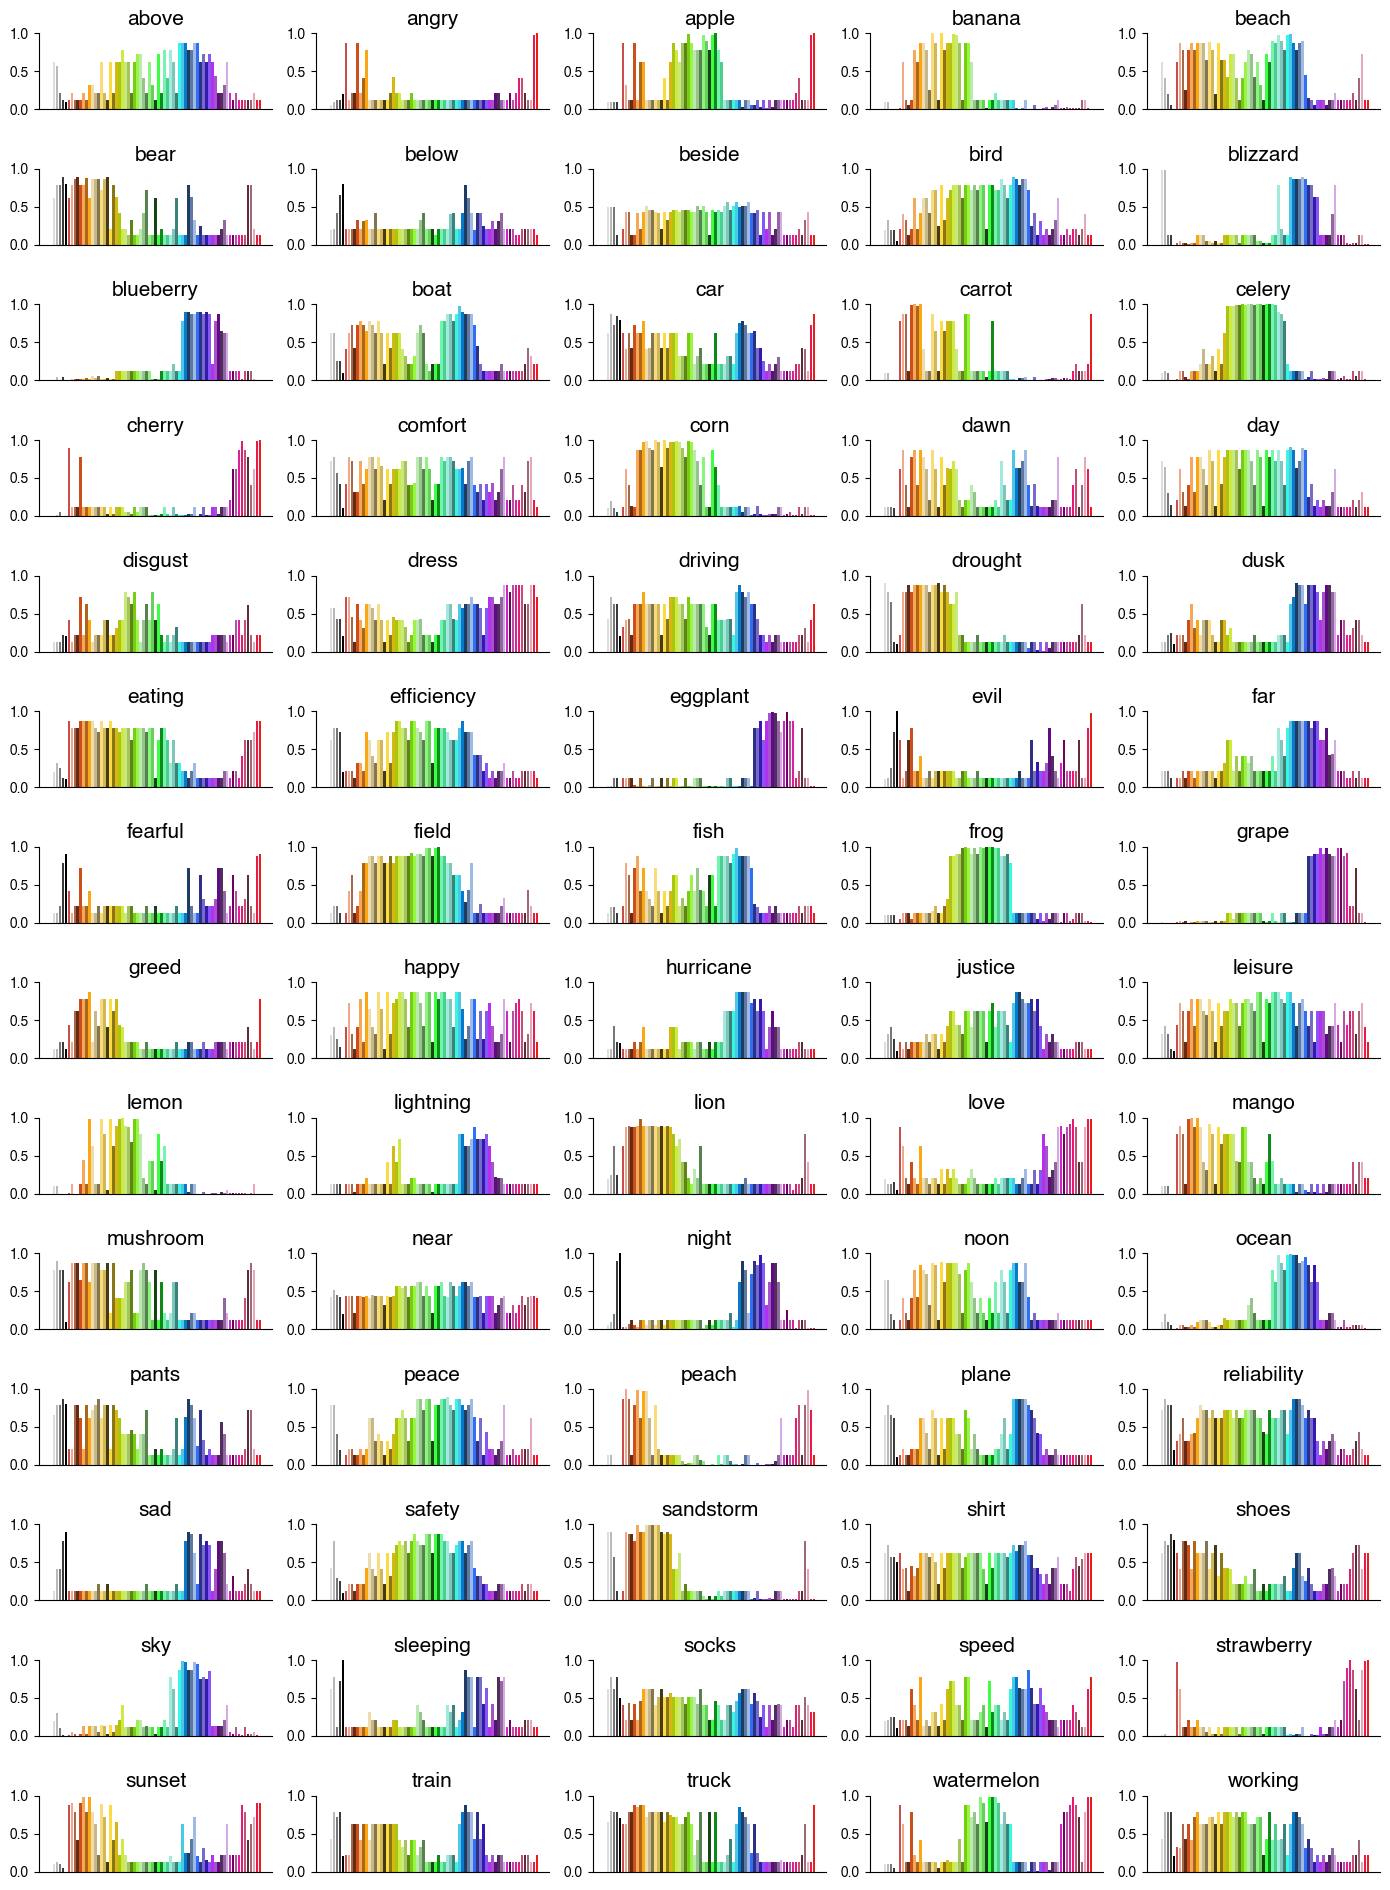

In [85]:

gpt_rate_fig = plt.figure(constrained_layout=True, figsize=(14,19))
gpt_assoc_anchor_df = gpt_assoc_anchor_df.sort_values(by='concept')
gs = gpt_rate_fig.add_gridspec(14, 10)
for i in range(14):
    for j in range(5):
        if (2*i)+j > 69:
            break
        ratings_ax = gpt_rate_fig.add_subplot(gs[i, (2*j):2+(2*j)])
        # weights_ax = weight_fig.add_subplot(gs[i, 2+(3*j)])
        # weights_ax.text(0.1, 0.05, f'L: {np.round(w[(5*i)+j,1],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.2, f'C: {np.round(w[(5*i)+j,6],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.35, f'H: {np.round(w[(5*i)+j,2],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.5, f'k: {np.round(w[(5*i)+j,0],3)}', fontsize=14)
        ratings_ax.bar(np.arange(71),gpt_assoc_anchor_df.iloc[(5*i)+j,sorted_col_order+1].values, color = uw71coords.iloc[sorted_col_order,:]['color_hex'].values)
        ratings_ax.set_ylim([0,1])
        ratings_ax.set_title(gpt_assoc_anchor_df.concept.values[(5*i)+j], fontsize=15)
        ratings_ax.title.set_position([.5, 1.05])
        ### remove the x ticks
        ratings_ax.set_xticks([])
        sns.despine(ax=ratings_ax)
        plt.tight_layout(h_pad=2)

    
        # weights_ax.axis('off')
    ### add some padding between different rows of subplots
    # plt.tight_layout(pad=2)


plt.savefig('../../plots/anchor_dists.pdf',format ='pdf',bbox_inches='tight')


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


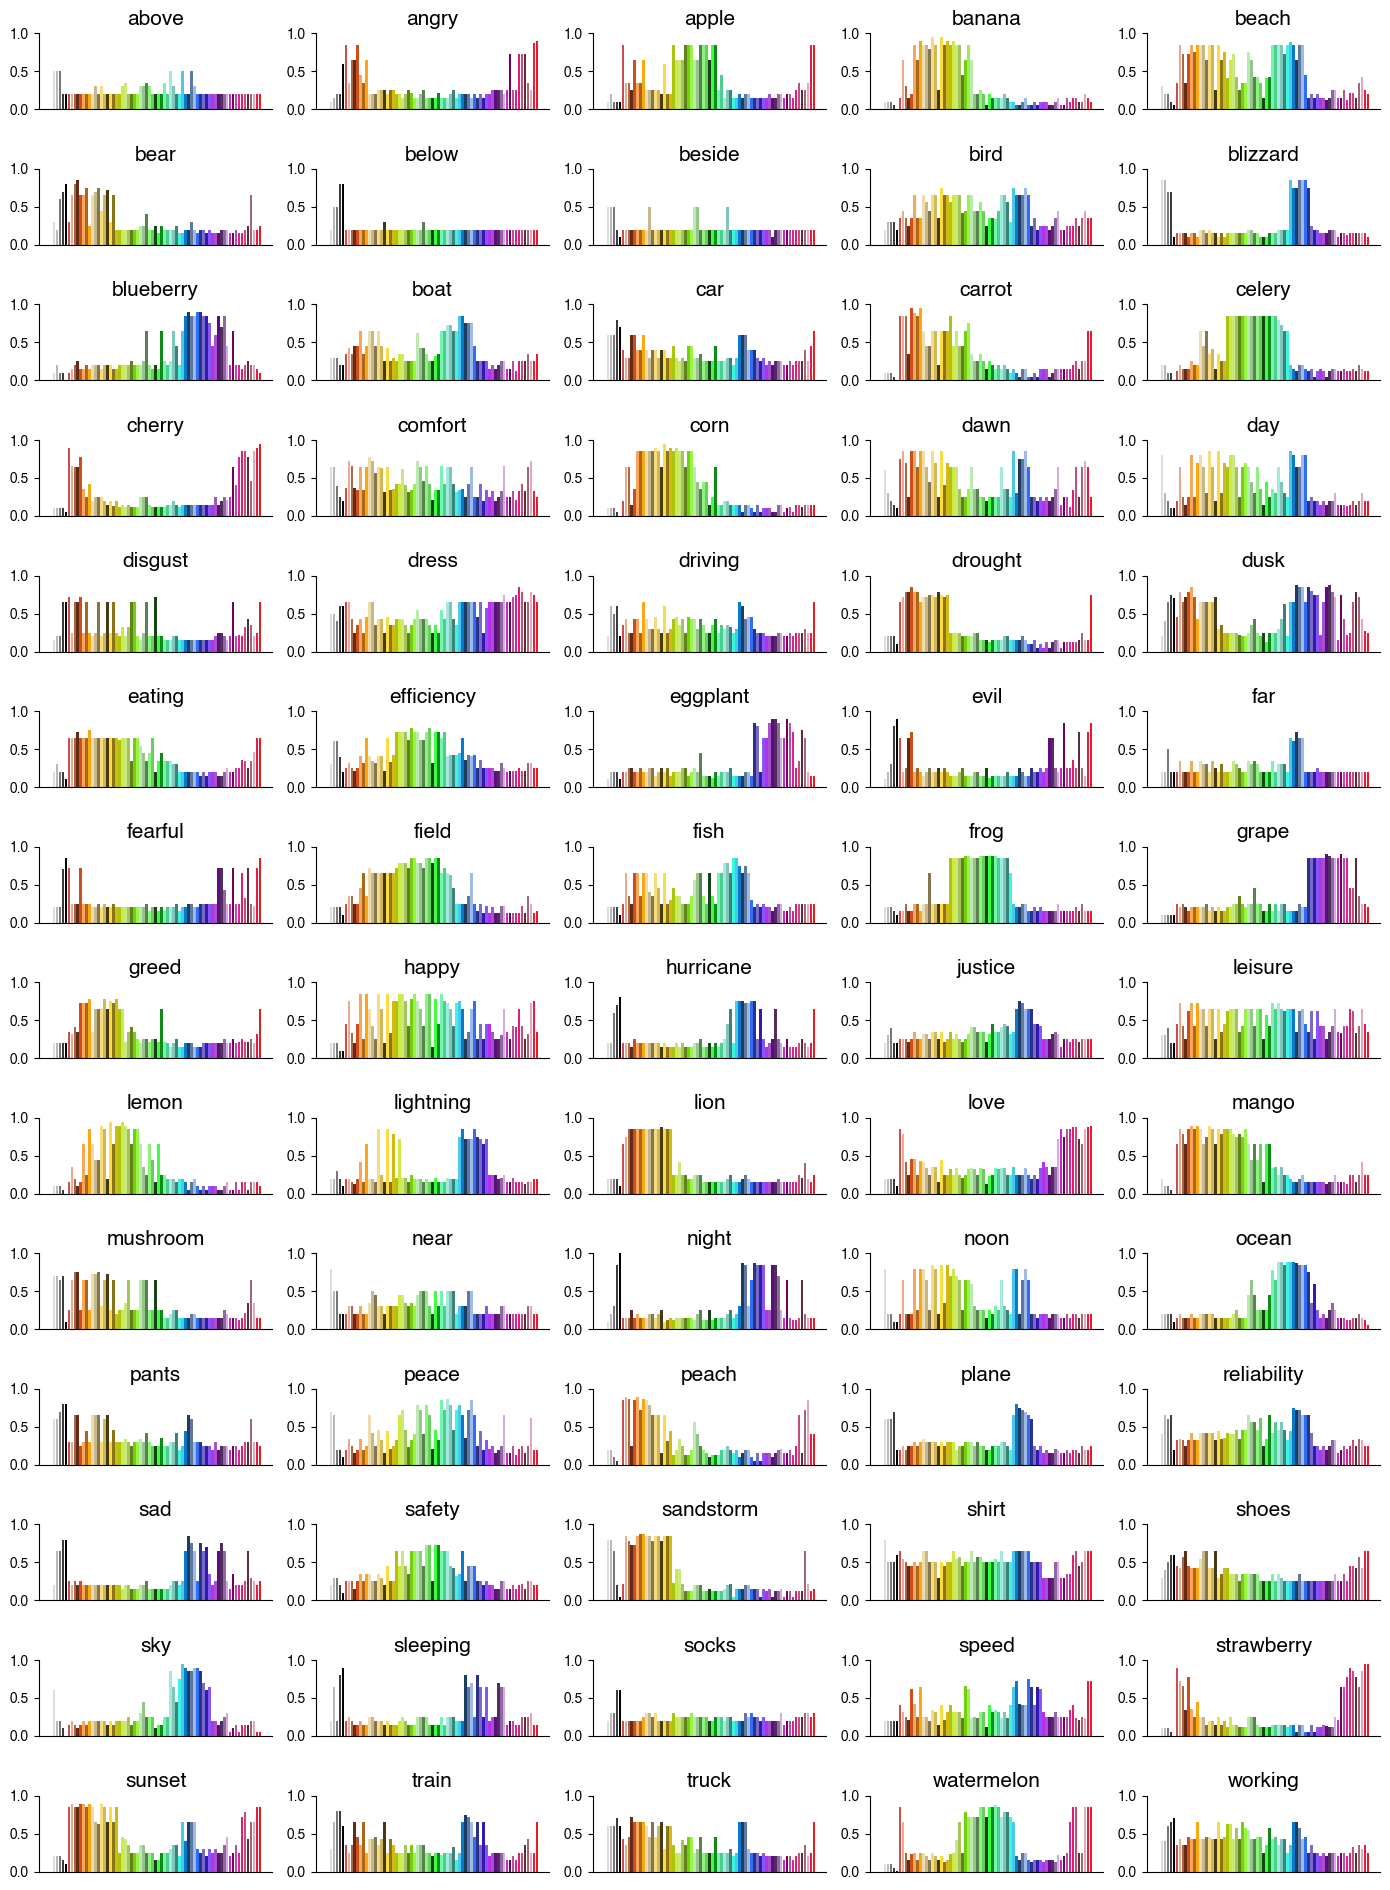

In [86]:

gpt_rate_fig = plt.figure(constrained_layout=True, figsize=(14,19))
gpt_assoc_noanchor_df = gpt_assoc_noanchor_df.sort_values(by='concept')
gs = gpt_rate_fig.add_gridspec(14, 10)
for i in range(14):
    for j in range(5):
        if (2*i)+j > 69:
            break
        ratings_ax = gpt_rate_fig.add_subplot(gs[i, (2*j):2+(2*j)])
        # weights_ax = weight_fig.add_subplot(gs[i, 2+(3*j)])
        # weights_ax.text(0.1, 0.05, f'L: {np.round(w[(5*i)+j,1],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.2, f'C: {np.round(w[(5*i)+j,6],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.35, f'H: {np.round(w[(5*i)+j,2],3)}', fontsize=14)
        # weights_ax.text(0.1, 0.5, f'k: {np.round(w[(5*i)+j,0],3)}', fontsize=14)
        ratings_ax.bar(np.arange(71),gpt_assoc_noanchor_df.iloc[(5*i)+j,sorted_col_order+1].values, color = uw71coords.iloc[sorted_col_order,:]['color_hex'].values)
        ratings_ax.set_ylim([0,1])
        ratings_ax.set_title(gpt_assoc_noanchor_df.concept.values[(5*i)+j], fontsize=15)
        ratings_ax.title.set_position([.5, 1.05])
        ### remove the x ticks
        ratings_ax.set_xticks([])
        sns.despine(ax=ratings_ax)
        plt.tight_layout(h_pad=2)
        # weights_ax.axis('off')
    ### add some padding between different rows of subplots
    # plt.tight_layout(pad=2)


plt.savefig('../../plots/no_anchor_dists.pdf',format ='pdf',bbox_inches='tight')


In [80]:

from colormath.color_objects import LabColor, XYZColor,HSLColor, sRGBColor,LCHabColor,AdobeRGBColor
from colormath.color_conversions import convert_color
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


def plot_dandplot(ratings=np.array(ratings_all.T),num_items=70):
    main_fig = plt.figure(figsize=(30,17))
    ws,_ = colorimetric_reg(ratings)
    ws = ws[0:num_items,:]
    hangle = np.mod( np.arctan2(ws[:,3], ws[:,2])*(180/np.pi), 360)
    rho = np.sqrt(np.sum(ws[:,[2,3]]**2,1))

    hangle2 = np.mod( [ (np.arctan2( ws[:,5], ws[:,4] )*(180/np.pi)/2),
                             np.arctan2( ws[:,5], ws[:,4] )*(180/np.pi)/2 + 180], 360 )
    rho2 = np.sqrt(np.sum(ws[:,[4,5]]**2,1))
    rho2 = [rho2,rho2]
    
    rho_max = np.max(rho)
    rho2_max = np.max(rho2[0])


    circ_colors= []
    for i in range(360):
        c = LCHabColor(78+14*np.sin(i*np.pi/180), 30, i) ## sample colors in lch space
        circ_colors.append(c)
    lab_circ_colors = [convert_color(c, LabColor) for c in circ_colors] ### convert colors to Lab space
    rgb_circ_colors = [convert_color(c, AdobeRGBColor) for c in lab_circ_colors] ### convert to rgb for plotting
    rgb_circ_colors = [(c.clamped_rgb_r,c.clamped_rgb_g,c.clamped_rgb_b) for c in rgb_circ_colors] ## clamp colors
    circ_cmap = ListedColormap(rgb_circ_colors)

    fig1, ax1 = plt.subplots(nrows=4,ncols=1,subplot_kw={'projection': 'polar'},figsize=(8,12))
    fig2, ax2 = plt.subplots(nrows=4,ncols=1,subplot_kw={'projection': 'polar'},figsize=(8,12))

    for i in range(num_items):
        # ax1 = main_fig.add_subplot(70,2,i+1,projection='polar')
        # ax2 = main_fig.add_subplot(70,2,i+71,projection='polar')


    

        norm = mpl.colors.Normalize(0.0, 2*np.pi)


        n = 720  #the number of secants for the mesh
        t = np.linspace(0,2*np.pi,n)   #theta values
        r = np.linspace(4+rho_max,rho_max,100)        #radius values change 0.6 to 0 for full circle
        rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
        c = tg                         #define color values as theta value
        im = ax1[i].pcolormesh(t, r, c.T,norm=norm,cmap = circ_cmap,zorder=-1,rasterized=True)

        ax1[i].plot( [hangle[i]*np.pi/180,hangle[i]*np.pi/180], [0,rho[i]],color='k',linewidth=2,linestyle ='-',marker='o',markersize=10)
        hangle_ = np.mod(hangle[i]+180,360)
 
        ax1[i].plot( [hangle_*np.pi/180,hangle_*np.pi/180], [0,rho[i]],color='k',linewidth=2,linestyle ='--',marker='o',markersize=10,fillstyle='full',markerfacecolor='white')

        #ax.set_rlim(-0.025,.05)
        ax1[i].set_rmax(rho_max+0.01)
        # ax1.set_rticks(np.arange(0.05,rho_max,0.10))  # Less radial ticks
        ax1[i].set_rticks([])
        # ax1.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
        ax1[i].grid(True,color='gray')

        ax1[i].tick_params(labelsize=13,pad=0,zorder=2)
        ax1[i].set_title(f'Dominant Hue {ratings_all.index[i]}', fontsize=9,pad=0)
      
        
        t = np.linspace(0,2*np.pi,n)   #theta values
        r = np.linspace(4+rho2_max,rho2_max,200)        #radius values change 0.6 to 0 for full circle
        rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
        c = tg                         #define color values as theta value
        im2 = ax2[i].pcolormesh(t, r, c.T,norm=norm,cmap = circ_cmap,zorder=-1,rasterized=True) 
        
        
        
        ax2[i].plot( np.append(hangle2[:,i]*np.pi/180,hangle2[:,i]*np.pi/180), np.array((0,0,rho2[0][i],rho2[1][i])),color='k',linewidth=2,marker='o',markersize=10,linestyle='-')

        hangle2_ = np.mod(hangle2[:,i]+90,360)
        ax2[i].plot( [hangle2_[0]*np.pi/180,hangle2_[0]*np.pi/180], [0,rho2[0][i]],color='k',linewidth=2,marker='o',markersize=10,linestyle='--',fillstyle='full',markerfacecolor='white')

        ax2[i].plot( [hangle2_[1]*np.pi/180,hangle2_[1]*np.pi/180], [0,rho2[1][i]],color='k',linewidth=2,marker='o',markersize=10,linestyle='--',  fillstyle='full',markerfacecolor='white')
        
        #ax2.plot( np.append(hangle2_*np.pi/180,hangle2_*np.pi/180), np.array((0,0,rho2[0][i],rho2[1][i])),color='k',linewidth=2,marker='o',markersize=12,linestyle=(0, (1, 10)))



        ax2[i].set_rmax(rho2_max+0.01)
        # ax2.set_rticks(np.arange(0.05,rho2_max,0.10))  # Less radial ticks
        ax2[i].set_rticks([])
        # ax2.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

        ax2[i].grid(True,color='gray')

        #ax.set_title("A line plot on a polar axis", va='bottom')
        ax2[i].tick_params(labelsize=13,pad=0,zorder=2)
        ax2[i].set_title(f'Dominant Axis {i+1}', fontsize=9,pad=10)
      


        
        # ### gpt based limits
        # ax1.set_ylim([0, rho_max])
        # # ax2.set_ylim([0, rho2_max])


    
        # fig2.savefig(f'../../data/recon_assocs/dom_axis_component_{i+1}.pdf',format = 'pdf', bbox_inches= 'tight')
        
        # fig1.show() 
        # fig2.show()
    

    # fig1.clear()
    # fig2.clear()
    print('dom hue', hangle)
    print('dom axis', hangle2)
    print('rho1', rho)
    print('rho2', rho2)
    fig1.tight_layout()
    fig1.savefig(f'../../plots/tmp.pdf',format = 'pdf', bbox_inches= 'tight')
    fig2.tight_layout()
    fig2.savefig(f'../../plots/tmp2.pdf',format = 'pdf', bbox_inches= 'tight')
    main_fig.tight_layout()
    main_fig.show()
    


(71, 4)
dom hue [244.01892037 245.95749053  90.47922441  70.59687242]
dom axis [[ 50.57098175  78.0732103    2.30309392  60.79059831]
 [230.57098175 258.0732103  182.30309392 240.79059831]]
rho1 [0.11550311 0.25437111 0.12041035 0.06583182]
rho2 [array([0.03357595, 0.09893377, 0.1108297 , 0.03256113]), array([0.03357595, 0.09893377, 0.1108297 , 0.03256113])]


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


<Figure size 3000x1700 with 0 Axes>

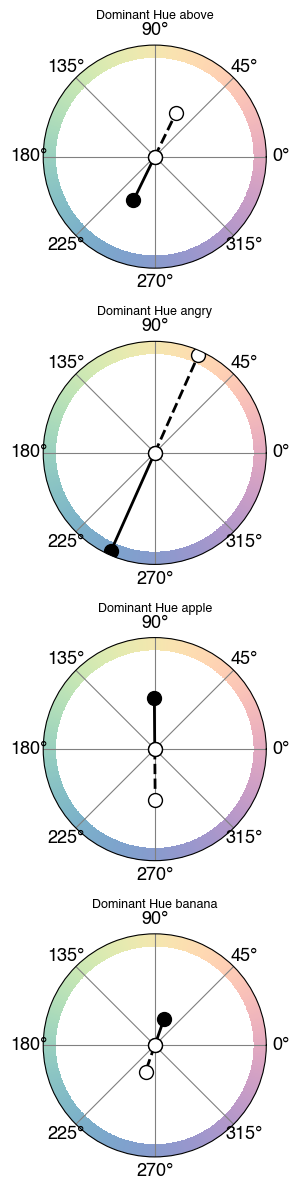

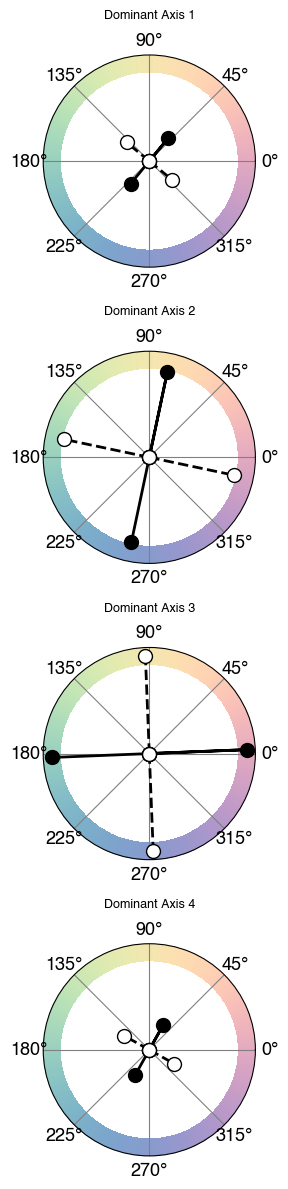

In [ ]:
plot_dandplot(ratings = ratings_all[ratings_all.index.isin(['strawberry','blueberry','above','train'])].T,num_items=4)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


(71, 4)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


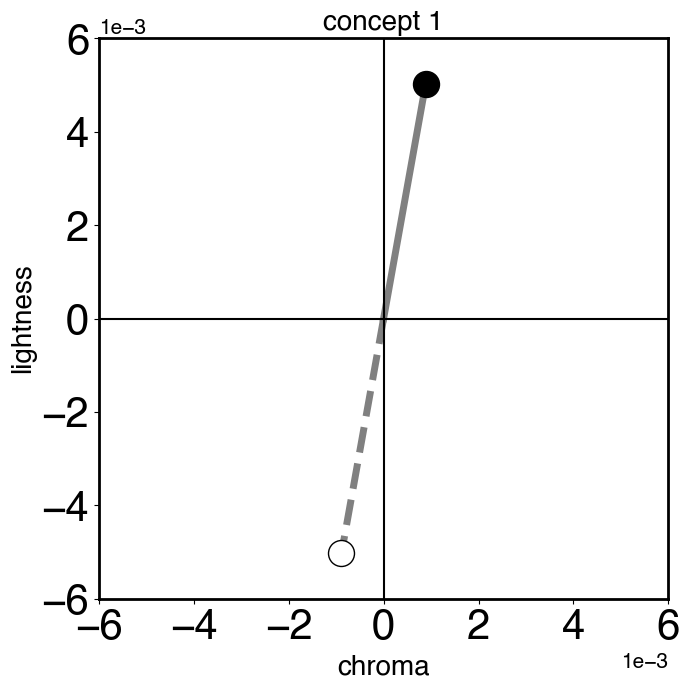

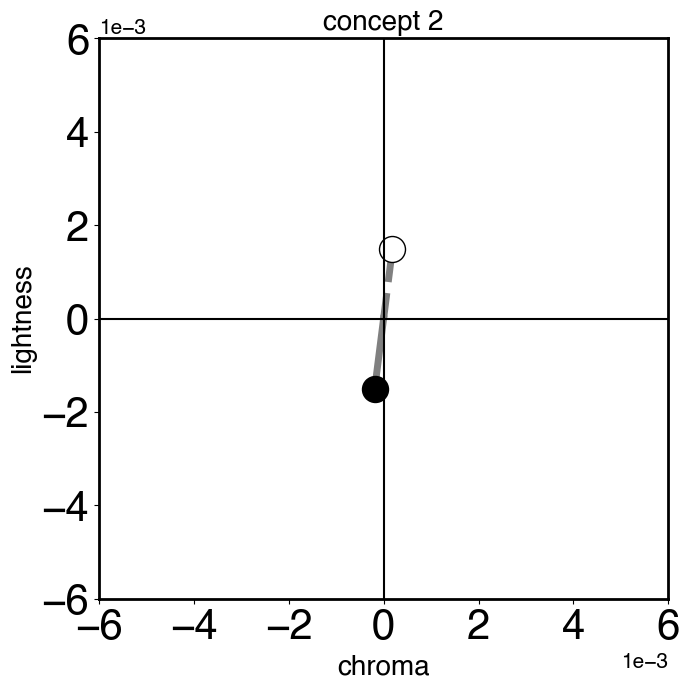

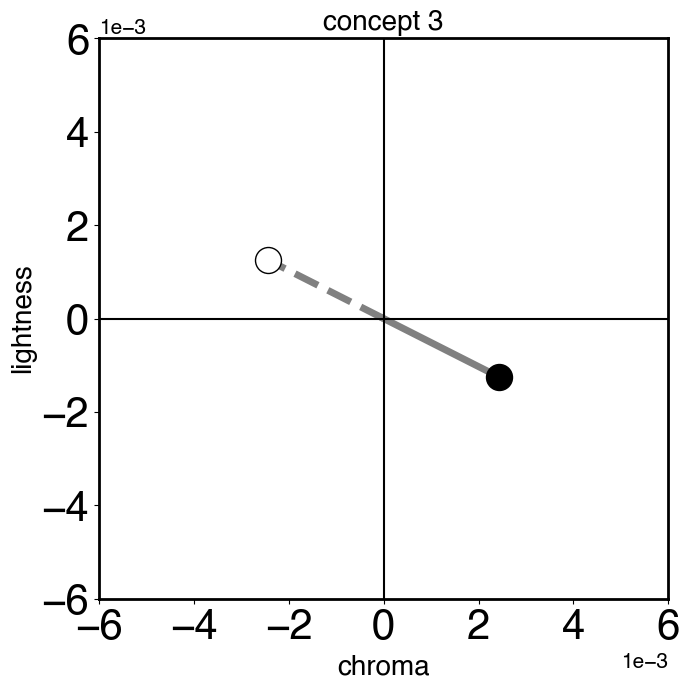

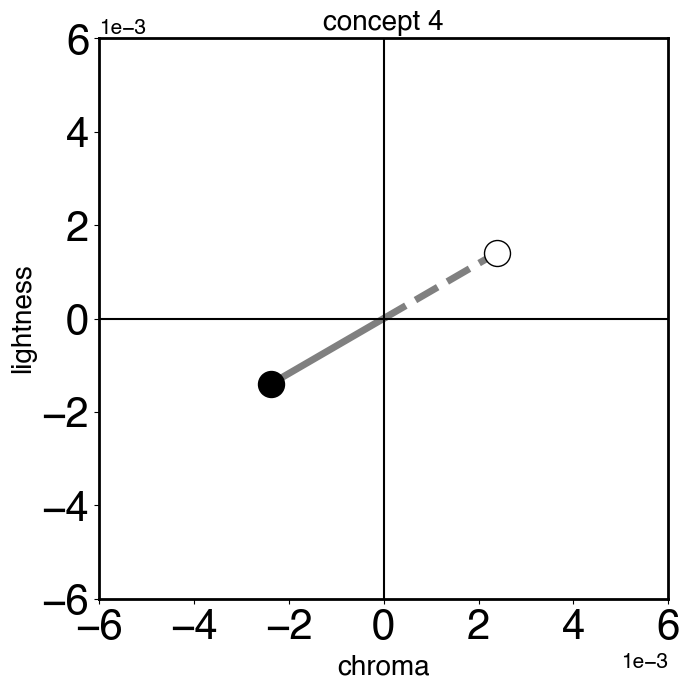

In [ ]:
ws,_ = colorimetric_reg(ratings_all[ratings_all.index.isin(['strawberry','blueberry','above','train'])].T)
lc = ws[:,[1,6]] ## pick the right weights
for i in range(4):
    fig = plt.figure(i,figsize=(7,7))
    ax= fig.add_subplot()
    ax.set_xlim(-.006,.006)
    ax.set_ylim(-.006,.006)
    ax.plot([lc[i,1],0],[lc[i,0],0],zorder=-1,c='gray',linewidth=5)
    ax.plot([0,-lc[i,1]],[0,-lc[i,0]],zorder=-1,c='gray',linestyle='--', linewidth=5)
    ax.scatter(lc[i,1],lc[i,0], marker='o',c='k',edgecolor='k',s=350)
    ax.scatter(-lc[i,1],-lc[i,0], marker='o',c='white',edgecolor='k',s=350)

    ax.plot(np.array(ax.get_xlim()),[0,0], color='k')
    ax.plot([0,0],np.array(ax.get_ylim()), color='k')
    ax.set_ylabel('lightness',fontsize=20)
    ax.set_xlabel('chroma',fontsize=20)
    ax.set_title(f'concept {i+1}',fontsize=20)
    ax.tick_params(labelsize=30)
    ax.ticklabel_format(style='sci',scilimits=(0,0))
    ###make the ticks on the x and y axis the same go from -0.006 to 0.005 in 0.006 increments
    ax.set_xticks(np.arange(-.006,.007,.002))
    ax.set_yticks(np.arange(-.006,.007,.002))

    ax.yaxis.get_offset_text().set_fontsize(15)
    ax.xaxis.get_offset_text().set_fontsize(15)
    ax.set_facecolor('white')
    ##put a box around the plot
    for spine in ax.spines.values():

        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.tight_layout()
    plt.savefig(f'../../plots/lightness_chroma_comp_{i+1}.pdf',format ='pdf',bbox_inches='tight')
    
    fig.show()



In [212]:
norms_df = pd.read_csv('../../data/concreteness_norms.csv')

In [213]:
norms_df

Word  Bigram  Conc.M  Conc.SD  Unknown  Total  Percent_known  \
0                   a       0    1.46     1.14        2     30           0.93   
1            aardvark       0    4.68     0.86        0     28           1.00   
2               aback       0    1.65     1.07        4     27           0.85   
3              abacus       0    4.52     1.12        2     29           0.93   
4             abandon       0    2.54     1.45        1     27           0.96   
...               ...     ...     ...      ...      ...    ...            ...   
39949  zebra crossing       1    4.56     0.75        1     28           0.96   
39950  zero tolerance       1    2.21     1.45        0     29           1.00   
39951        ZIP code       1    3.77     1.59        0     30           1.00   
39952         zoom in       1    3.57     1.40        0     28           1.00   
39953       zoom lens       1    4.81     0.49        1     27           0.96   

       SUBTLEX  
0      1041179  
1           21  
2           15  
3           12  
4          413  
...        ...  
39949        0  
39950        0  
39951        0  
39952        0  
39953        0  

[39954 rows x 8 columns]

In [224]:
gpt_cor_df_long['concreteness'] = gpt_cor_df_long.concept.map(norms_df.set_index('Word')['Conc.M'])
gpt_cor_df_long.loc[gpt_cor_df_long.concept=='shoes','concreteness'] = norms_df[norms_df.Word=='shoe']['Conc.M'].values[0]
gpt_cor_df_long.loc[gpt_cor_df_long.concept=='socks','concreteness'] = norms_df[norms_df.Word=='sock']['Conc.M'].values[0]


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


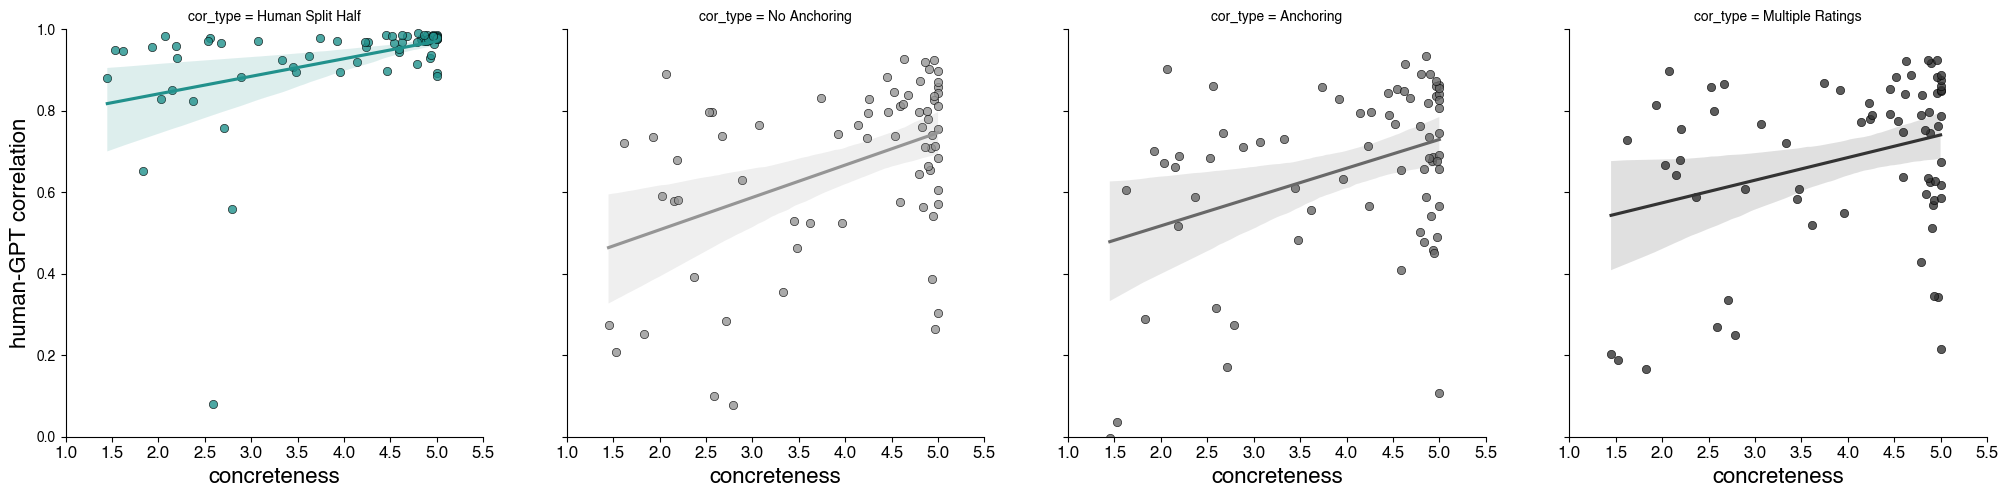

In [225]:

# ### create a custom palette the first 3 color from greys
# custom_pal = sns.color_palette("Greys", n_colors=3)
# ### append the first color of viridis to the start of the palette
# custom_pal.insert(0,sns.color_palette("viridis", n_colors=1)[0])


ax = sns.lmplot(x='concreteness',y='cor',hue='cor_type',col='cor_type',\
                hue_order=['Human Split Half','No Anchoring','Anchoring','Multiple Ratings'],\
                    col_order=['Human Split Half','No Anchoring','Anchoring','Multiple Ratings'],\
                          data=gpt_cor_df_long, height=5, aspect=1,palette=custom_pal,fit_reg=True, scatter_kws={'edgecolor':'black','linewidth':.5})

plt.ylim([0,1])



ax.set_ylabels('human-GPT correlation', fontsize=16)
ax.set_xlabels('concreteness', fontsize=16)
##pad the gaps between plots
plt.subplots_adjust(wspace=.2, hspace=.2)

## round the xtick values to 2 decimal places
# ax.set_xticklabels(np.round(ax.get_xticks(),2),fontsize=12)
ax.set_xticklabels(fontsize=12)

plt.savefig('../../plots/concretenessVcor.pdf',format ='pdf',bbox_inches='tight')


In [135]:
pearsonr(gpt_cor_df_long[gpt_cor_df_long.cor_type=='No Anchoring'].concreteness.values,\
         gpt_cor_df_long[gpt_cor_df_long.cor_type=='No Anchoring'].cor.values)

(0.4153678078126446, 0.0003866115887539726)

In [136]:
pearsonr(gpt_cor_df_long[gpt_cor_df_long.cor_type=='Anchoring'].concreteness.values,\
         gpt_cor_df_long[gpt_cor_df_long.cor_type=='Anchoring'].cor.values)

(0.3675403100825757, 0.0018914899458392872)

In [137]:
pearsonr(gpt_cor_df_long[gpt_cor_df_long.cor_type=='Multiple Ratings'].concreteness.values,\
         gpt_cor_df_long[gpt_cor_df_long.cor_type=='Multiple Ratings'].cor.values)

(0.2910065372028958, 0.015271572803536602)

In [138]:
pearsonr(gpt_cor_df_long[gpt_cor_df_long.cor_type=='Human Split Half'].concreteness.values,\
         gpt_cor_df_long[gpt_cor_df_long.cor_type=='Human Split Half'].cor.values)

(0.4786916453824969, 3.1745719724453634e-05)

In [116]:
import statsmodels.api as sm

In [117]:
pearsonr(reg_df[~reg_df.concept.isin(['shoes','socks'])].cor,reg_df[~reg_df.concept.isin(['shoes','socks'])].concreteness,)

(0.33683725584637725, 0.005316630275011169)

no anchoring = .46\
anchoring = .39\
multiple ratings = .34

In [126]:
### fit a linear regression model predicting cor from concreteness and specificity
print('No Anchoring')
reg_df = gpt_cor_df_long[gpt_cor_df_long.cor_type=='No Anchoring']

model = sm.OLS(reg_df.cor, sm.add_constant(reg_df[['concreteness','specificity']])).fit()
model.summary()

No Anchoring


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cor   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     16.23
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.85e-06
Time:                        17:23:10   Log-Likelihood:                 27.438
No. Observations:                  69   AIC:                            -48.88
Df Residuals:                      66   BIC:                            -42.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3349      0.948     -3.517      0.001      -5.228      -1.442
concreteness     0.0294      0.021      1.427      0.158      -0.012       0.071
specificity     16.1145      4.096      3.934      0.000       7.937      24.292
==============================================================================
Omnibus:                        8.015   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.210
Skew:                          -0.845   Prob(JB):                       0.0165
Kurtosis:                       2.998   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
### fit a linear regression model predicting cor from concreteness and specificity
print('Anchoring')
reg_df = gpt_cor_df_long[gpt_cor_df_long.cor_type=='Anchoring']

model = sm.OLS(reg_df.cor, sm.add_constant(reg_df[['concreteness','specificity']])).fit()
model.summary()

Anchoring


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cor   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     11.94
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.74e-05
Time:                        17:23:10   Log-Likelihood:                 21.242
No. Observations:                  69   AIC:                            -36.48
Df Residuals:                      66   BIC:                            -29.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1487      1.037     -3.035      0.003      -5.220      -1.078
concreteness     0.0260      0.023      1.153      0.253      -0.019       0.071
specificity     15.3538      4.481      3.427      0.001       6.408      24.300
==============================================================================
Omnibus:                       13.795   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.896
Skew:                          -1.048   Prob(JB):                     0.000583
Kurtosis:                       3.887   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
### fit a linear regression model predicting cor from concreteness and specificity
print('Multiple Ratings')
reg_df = gpt_cor_df_long[gpt_cor_df_long.cor_type=='Multiple Ratings']

model = sm.OLS(reg_df.cor, sm.add_constant(reg_df[['concreteness','specificity']])).fit()
model.summary()

### generate a table for the model


    

Multiple Ratings


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cor   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     10.84
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.53e-05
Time:                        17:23:10   Log-Likelihood:                 23.958
No. Observations:                  69   AIC:                            -41.92
Df Residuals:                      66   BIC:                            -35.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.2637      0.997     -3.273      0.002      -5.255      -1.273
concreteness     0.0070      0.022      0.324      0.747      -0.036       0.050
specificity     16.2591      4.308      3.774      0.000       7.658      24.860
==============================================================================
Omnibus:                        9.962   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.633
Skew:                          -0.961   Prob(JB):                      0.00491
Kurtosis:                       3.068   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### reegression fit with both terms unique variance is uniquely explained by specificity

In [140]:
### load rathore data

rathore_ratings = pd.read_csv('../../data/rathore_ratings.csv')

In [157]:
## pivot rathore_ratings to wide format such that each row is a concept and each column is one of the UW-58 Colors and the values in Top50_Sector+Category

rathore_ratings_wide = rathore_ratings.pivot(index='Concept',columns='UW-58 Colors',values='Top50_Sector+Category').reset_index()

In [160]:
cons =[]
cors=[]
for this_concept in rathore_ratings.Concept.unique():
    this_df = rathore_ratings[rathore_ratings.Concept==this_concept]
    cors.append(pearsonr(this_df['Top50_Sector+Category'],this_df['True Rating'])[0])
    cons.append(this_concept)

rathore_cor_df = pd.DataFrame({'concept':cons,'cor':cors})


In [190]:
hu_cor_df = pd.read_csv('../../data/hu_cor_data.csv')

concept       cor
0        mango  0.916321
1   watermelon  0.648397
2     honeydew  0.905774
3   cantaloupe  0.940466
4   grapefruit  0.838322
5   strawberry  0.661835
6    raspberry  0.448003
7    blueberry  0.843634
8      avocado  0.759618
9       orange  0.935218
10        lime  0.913040
11       lemon  0.918994

In [193]:
### select only the rows in gpt_cor_df_long where the value in the concept column is in rathore_cor_df.concept
gpt_cor_df_sub = gpt_cor_df_long[gpt_cor_df_long.concept.isin(rathore_cor_df.concept)].sort_values(by='concept')
rathore_cor_df_sub = rathore_cor_df[rathore_cor_df.concept.isin(gpt_cor_df_sub.concept)].sort_values(by='concept')

gpt_cor_df_sub_2 = gpt_cor_df_long[gpt_cor_df_long.concept.isin(hu_cor_df.concept)].sort_values(by='concept')

In [194]:

rathore_cor_df_sub.cor.mean()

0.7978361759122674

In [195]:
gpt_cor_df_sub[gpt_cor_df_sub.cor_type=='No Anchoring'].cor.mean()

0.7898637372743054

concept    cor
0    blueberry  0.844
1        lemon  0.919
2        mango  0.916
3   strawberry  0.662
4   watermelon  0.648
5        apple  0.690
6       banana  0.875
7       cherry  0.624
8        grape  0.122
9        peach  0.856
10      carrot  0.816
11      celery  0.766
12        corn  0.806
13    eggplant  0.494
14    mushroom  0.541

In [196]:
hu_cor_df.cor.mean()

0.7052666666666667

In [239]:
gpt_cor_df_sub_2[gpt_cor_df_sub_2.cor_type=='No Anchoring'].cor

64    0.896701
57    0.843782
62    0.836907
41    0.754530
49    0.873197
50    0.816176
51    0.825594
36    0.713172
28    0.684791
60    0.869607
53    0.857279
34    0.760754
66    0.903613
21    0.605016
32    0.780510
Name: cor, dtype: float64

In [182]:
ttest_rel(gpt_cor_df_sub[gpt_cor_df_sub.cor_type=='No Anchoring'].cor,rathore_cor_df_sub.cor)

Ttest_relResult(statistic=-0.21970648499547427, pvalue=0.8368565067294229)

In [236]:
hu_cor_df.sort_values(by='concept').cor

concept    cor
5        apple  0.690
6       banana  0.875
0    blueberry  0.844
10      carrot  0.816
11      celery  0.766
7       cherry  0.624
12        corn  0.806
13    eggplant  0.494
8        grape  0.122
1        lemon  0.919
2        mango  0.916
14    mushroom  0.541
9        peach  0.856
3   strawberry  0.662
4   watermelon  0.648

In [204]:
heatmap_df = gpt_cor_df_long[gpt_cor_df_long.cor_type=='No Anchoring']


Text(0.5, 124.72222222222219, '')

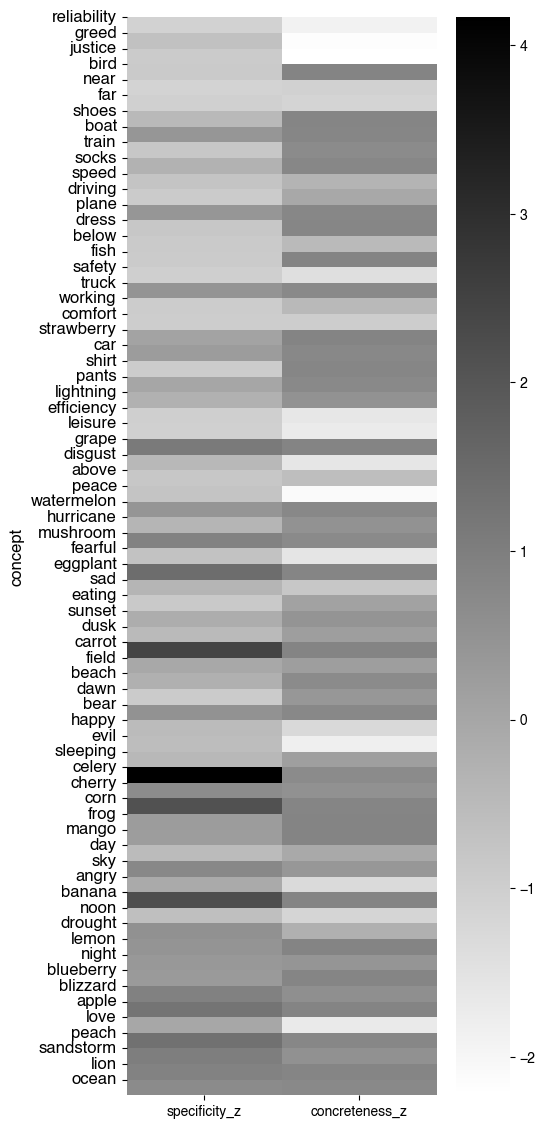

In [228]:
## create 2 new columns in heatmap_df called specificity_z and concrete_z that are the z-scores of the values in the specificity and concreteness columns respectively
heatmap_df['specificity_z'] = (heatmap_df.specificity-heatmap_df.specificity.mean())/heatmap_df.specificity.std()
heatmap_df['concreteness_z'] = (heatmap_df.concreteness-heatmap_df.concreteness.mean())/heatmap_df.concreteness.std()
heatmap_df = heatmap_df.reset_index(drop=True)

### make the plot
fig = plt.figure(figsize=(5,14))
ax = fig.add_subplot()
sns.heatmap(heatmap_df[['specificity_z','concreteness_z']],cmap='gray_r',ax=ax)
# Set the y-tick labels
ax.set_yticks(range(len(heatmap_df.concept)))
ax.set_yticklabels(heatmap_df.concept, fontsize=12, rotation=0)

ax.set_ylabel('concept',fontsize=12)
ax.set_xlabel('')

In [227]:
gpt_cor_df_long.head(60)

concept      category  specificity      cor_type       cor  \
0   reliability    properties     0.235128  No Anchoring  0.252390   
1         greed        values     0.237560  No Anchoring  0.208179   
2       justice        values     0.236187  No Anchoring  0.274720   
3          bird       animals     0.236286  No Anchoring  0.304665   
4          near    directions     0.235032  No Anchoring  0.076745   
6           far    directions     0.235428  No Anchoring  0.284146   
7         shoes       clothes     0.238806  No Anchoring  0.264126   
8          boat      vehicles     0.243845  No Anchoring  0.388272   
9         train      vehicles     0.236811  No Anchoring  0.645316   
10        socks       clothes     0.239795  No Anchoring  0.654451   
11        speed    properties     0.237211  No Anchoring  0.523635   
12      driving    activities     0.236151  No Anchoring  0.523407   
13        plane      vehicles     0.243888  No Anchoring  0.709504   
14        dress       clothes     0.236746  No Anchoring  0.740581   
15        below    directions     0.236269  No Anchoring  0.530369   
16         fish       animals     0.236233  No Anchoring  0.570950   
17       safety    properties     0.235534  No Anchoring  0.392022   
18        truck      vehicles     0.244156  No Anchoring  0.565096   
19      working    activities     0.236000  No Anchoring  0.462495   
20      comfort    properties     0.235932  No Anchoring  0.629819   
21   strawberry        fruits     0.241896  No Anchoring  0.605016   
22          car      vehicles     0.242989  No Anchoring  0.664161   
23        shirt       clothes     0.236093  No Anchoring  0.540869   
24        pants       clothes     0.241555  No Anchoring  0.710869   
25    lightning       weather     0.239901  No Anchoring  0.577116   
26   efficiency    properties     0.235612  No Anchoring  0.579050   
27      leisure    activities     0.235380  No Anchoring  0.591323   
28        grape      fruits_2     0.247913  No Anchoring  0.684791   
29      disgust      emotions     0.238953  No Anchoring  0.678038   
30        above    directions     0.236804  No Anchoring  0.355485   
31        peace        values     0.237110  No Anchoring  0.720862   
32   watermelon        fruits     0.244023  No Anchoring  0.780510   
33    hurricane       weather     0.239320  No Anchoring  0.812843   
34     mushroom    vegetables     0.246743  No Anchoring  0.760754   
35      fearful      emotions     0.237443  No Anchoring  0.580751   
36     eggplant    vegetables     0.249704  No Anchoring  0.713172   
37          sad      emotions     0.239373  No Anchoring  0.766128   
38       eating    activities     0.236417  No Anchoring  0.766088   
39       sunset        scenes     0.240557  No Anchoring  0.738389   
40         dusk  times-of-day     0.238614  No Anchoring  0.795078   
41       carrot    vegetables     0.255662  No Anchoring  0.754530   
42        field        scenes     0.241277  No Anchoring  0.829023   
43        beach        scenes     0.240062  No Anchoring  0.796658   
44         dawn  times-of-day     0.236239  No Anchoring  0.796274   
45         bear       animals     0.244388  No Anchoring  0.798620   
46        happy      emotions     0.238498  No Anchoring  0.796668   
47         evil        values     0.238244  No Anchoring  0.736455   
48     sleeping    activities     0.238868  No Anchoring  0.734447   
49       celery    vegetables     0.265614  No Anchoring  0.873197   
50       cherry      fruits_2     0.245270  No Anchoring  0.816176   
51         corn    vegetables     0.253892  No Anchoring  0.825594   
52         frog       animals     0.243039  No Anchoring  0.812167   
53        mango        fruits     0.242807  No Anchoring  0.857279   
54          day  times-of-day     0.238519  No Anchoring  0.743969   
55          sky        scenes     0.245885  No Anchoring  0.883235   
56        angry      emotions     0.241005  No Anchoring  0.796323   
57       banana   

In [245]:
pearsonr(heatmap_df.specificity,heatmap_df.concreteness)

(0.5274562618019795, 3.212192861172971e-06)

In [344]:
scatter_dict={}
for this_concept in ratings_all.index.unique():
    scatter_dict[this_concept] = ['noanc','anc','multiple']

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


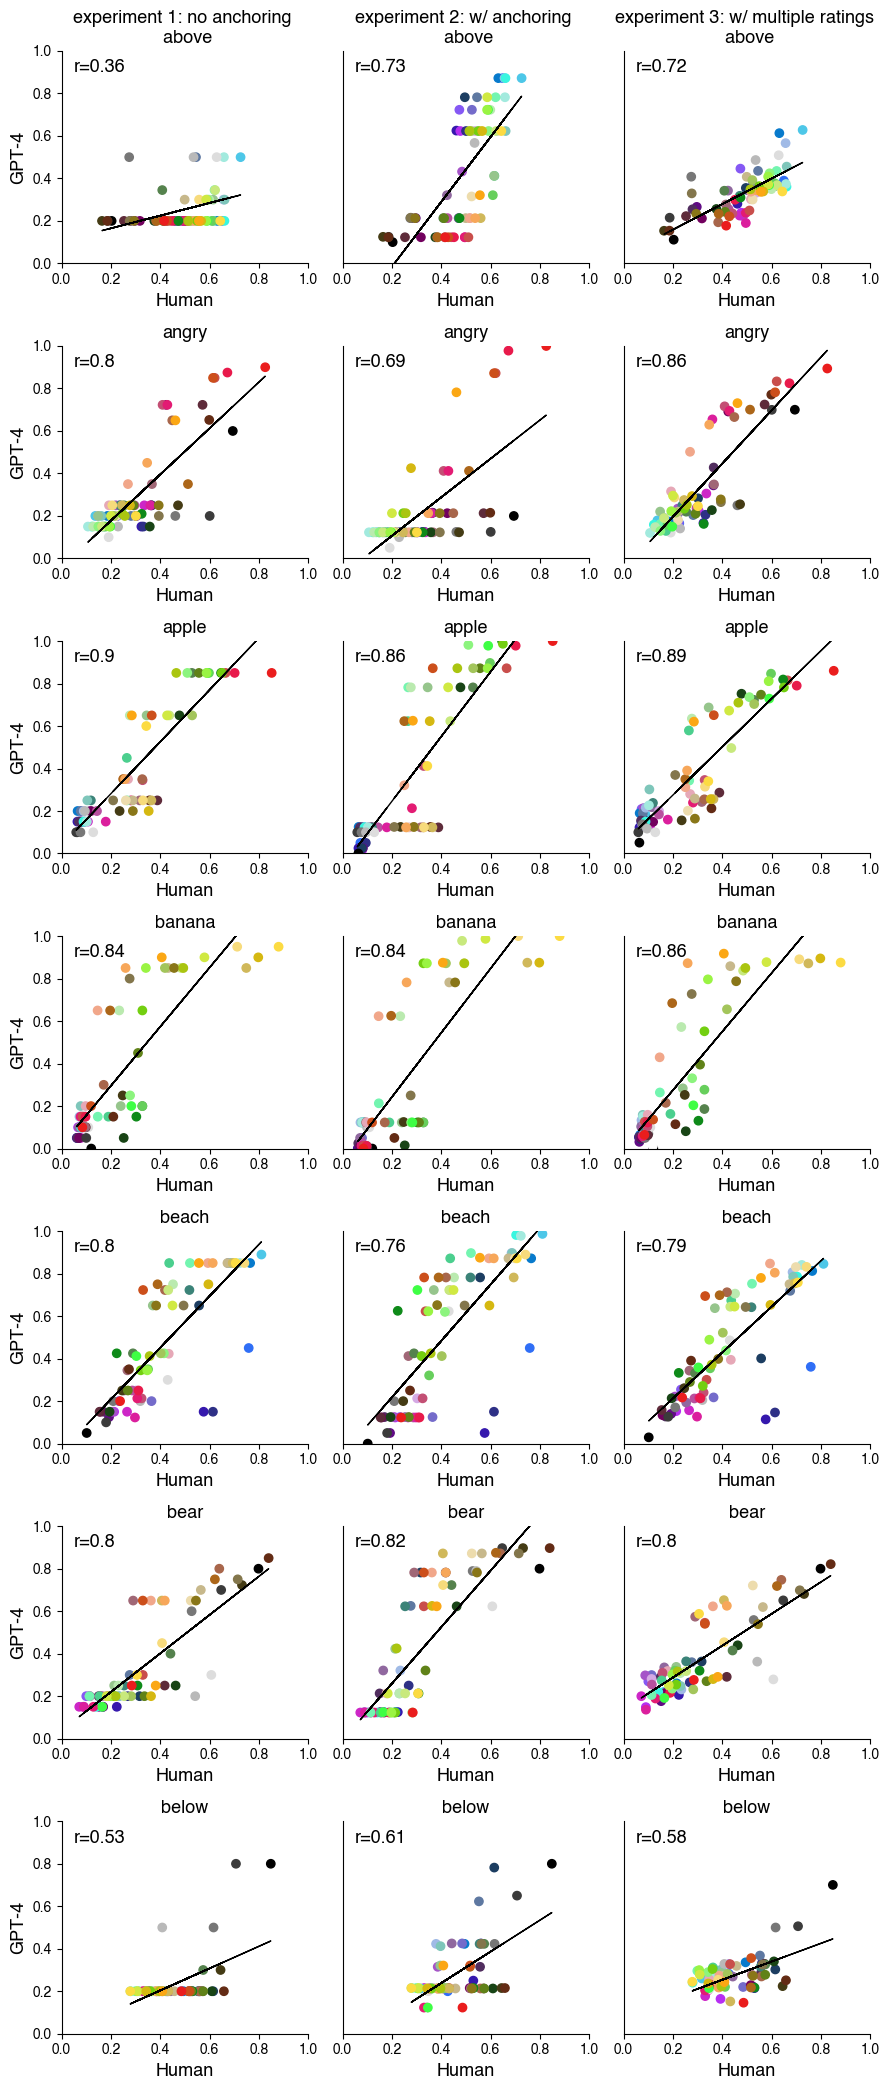

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


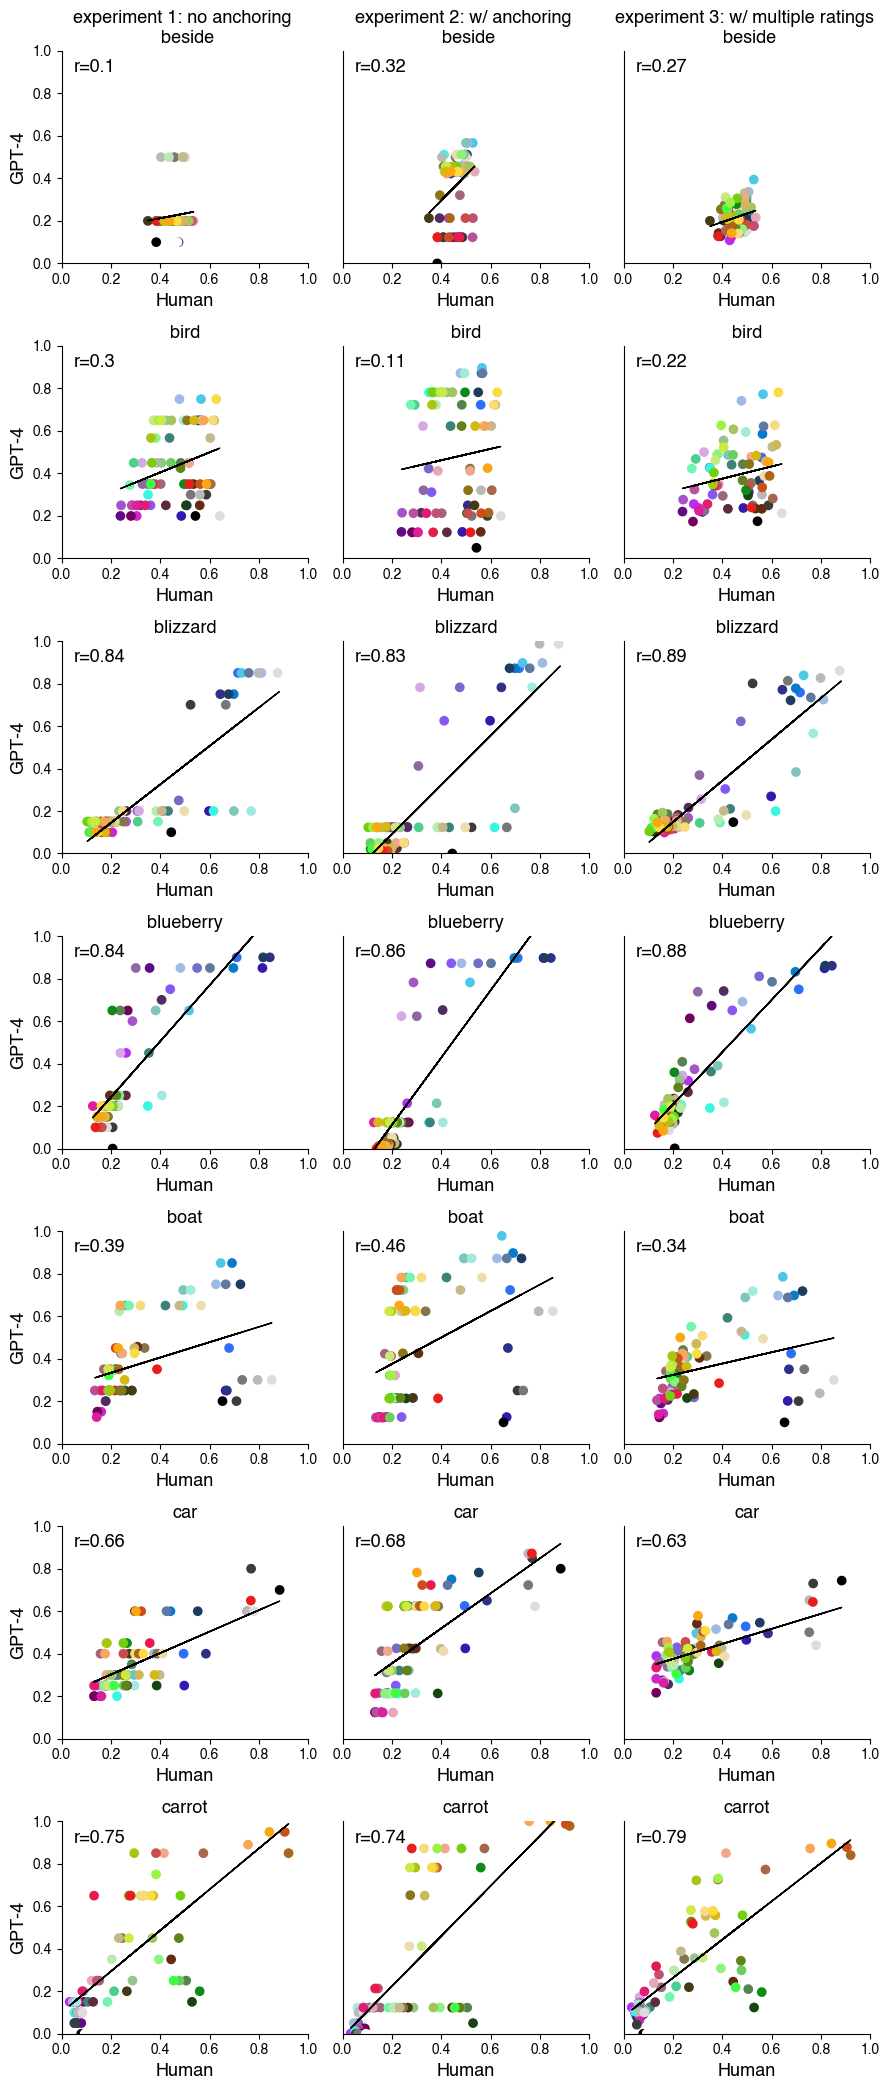

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


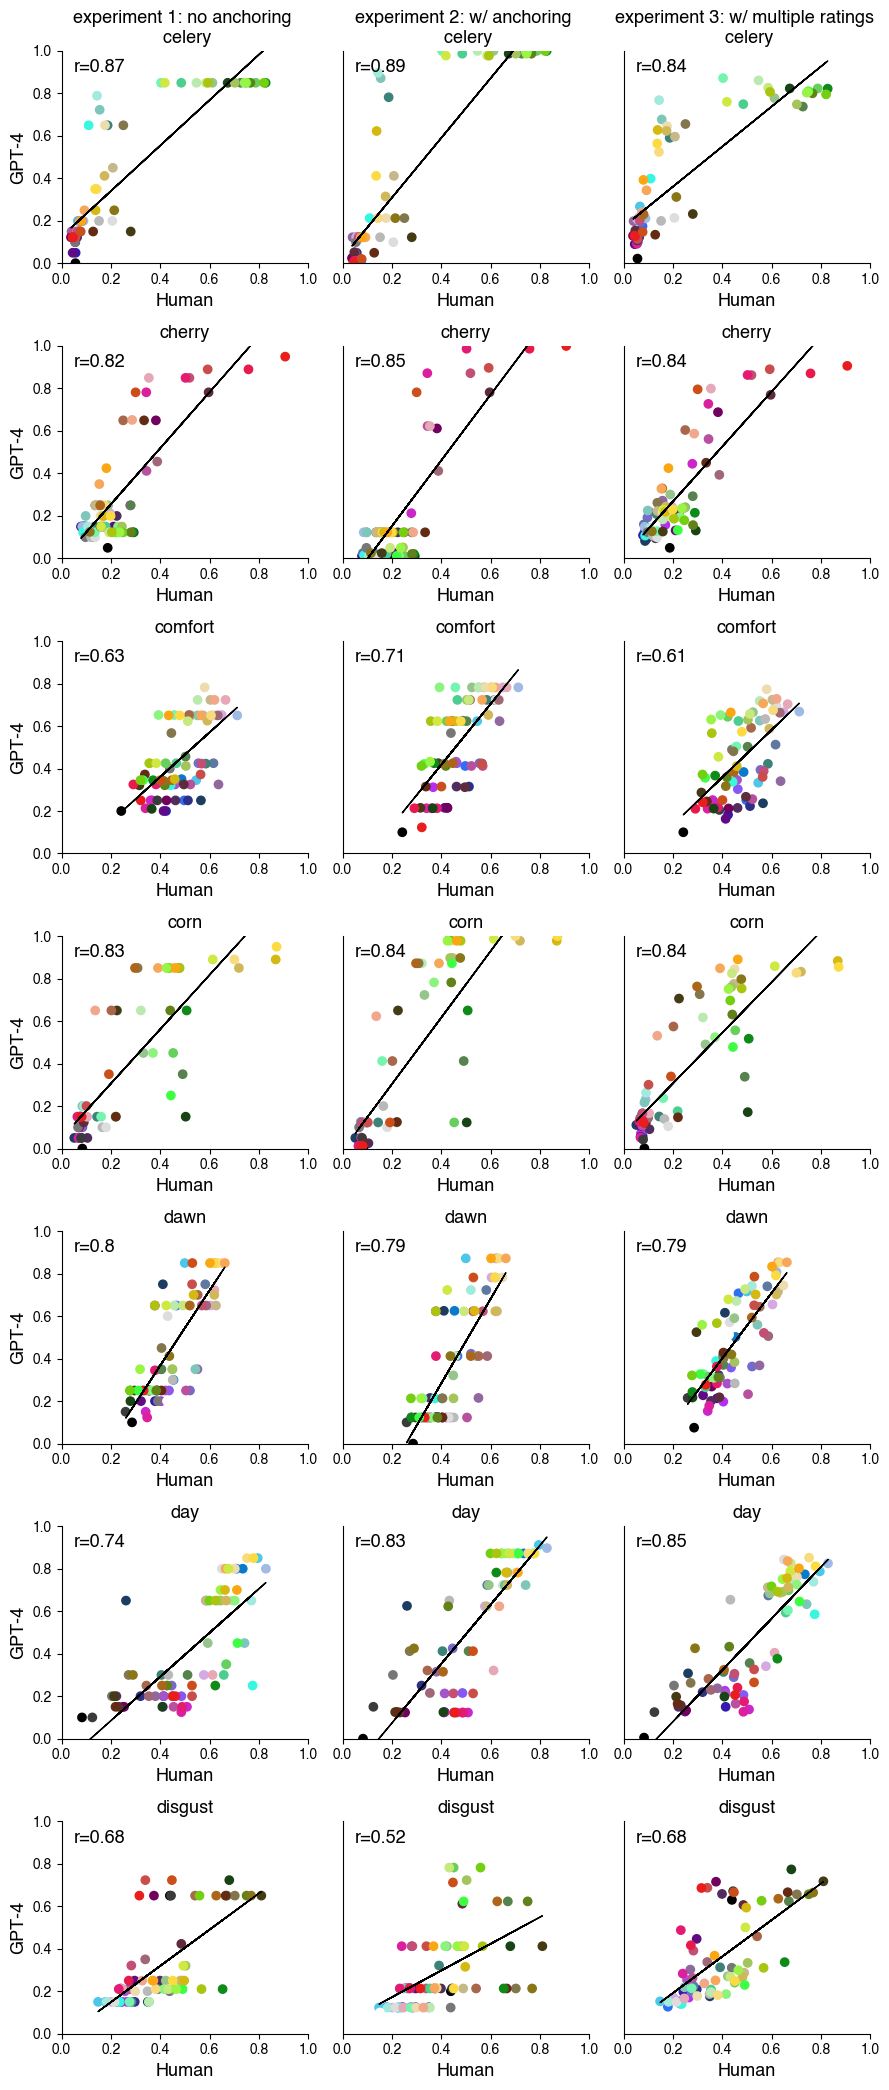

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


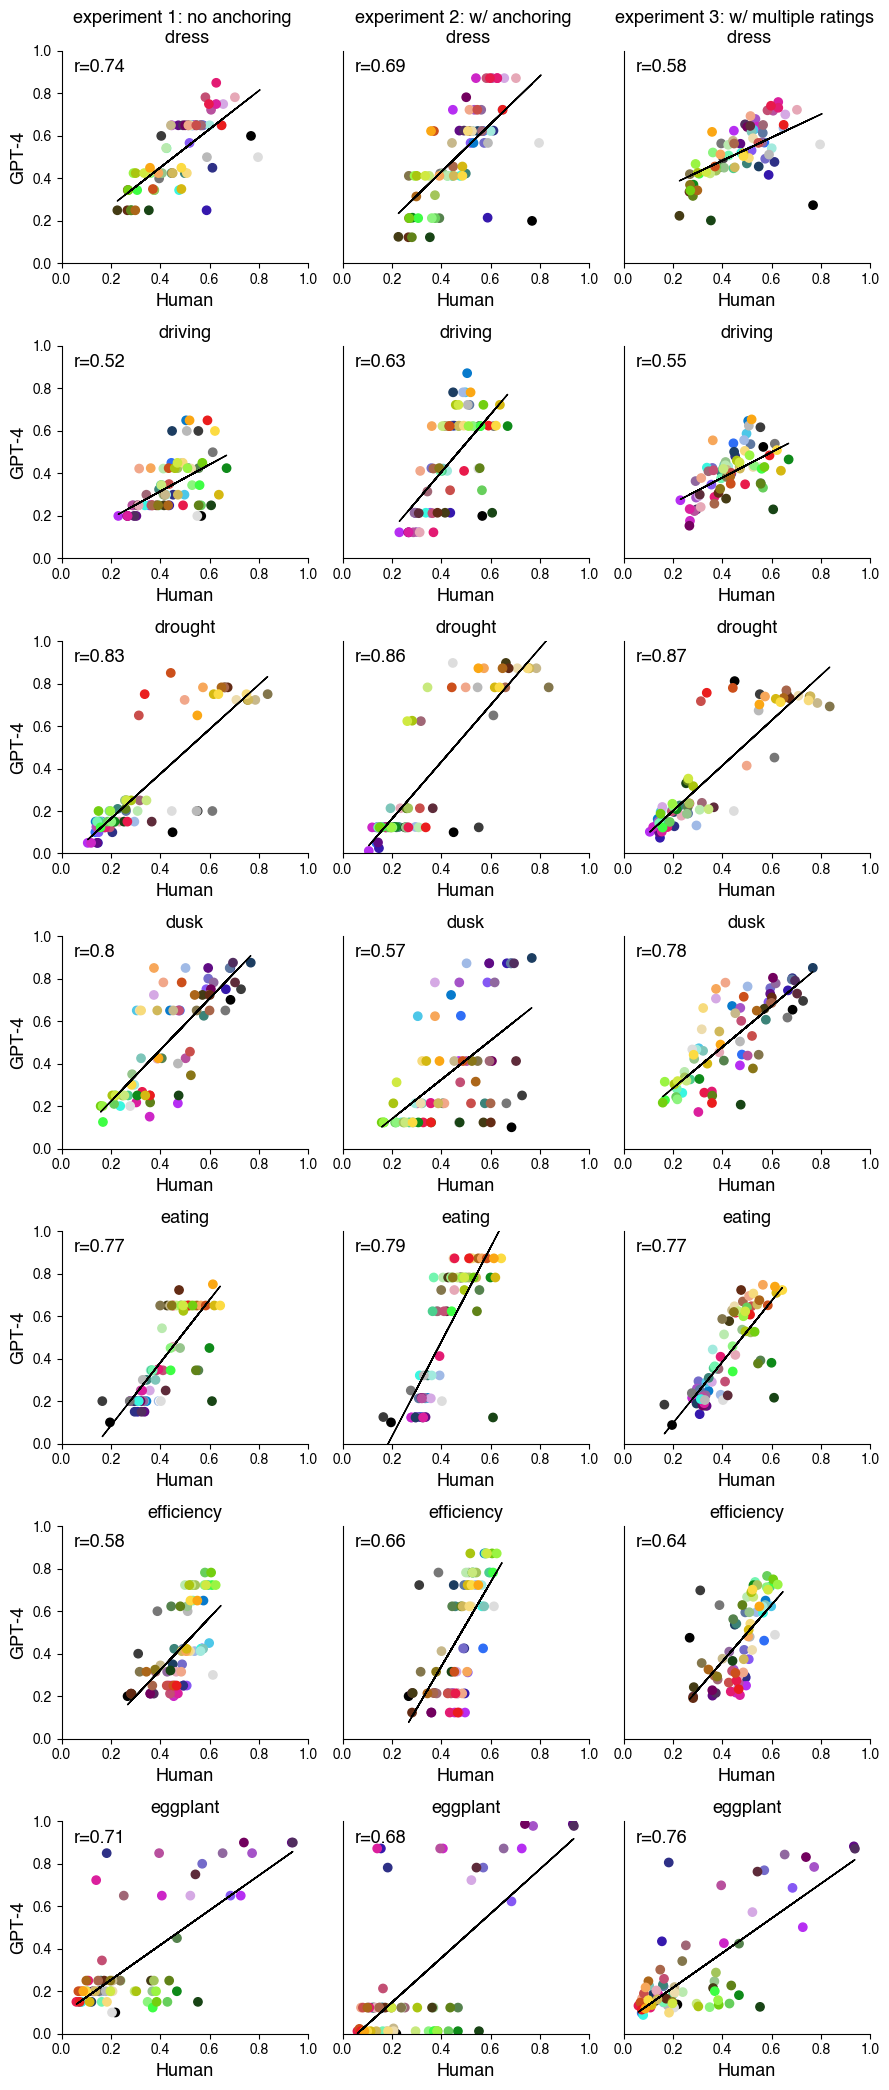

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


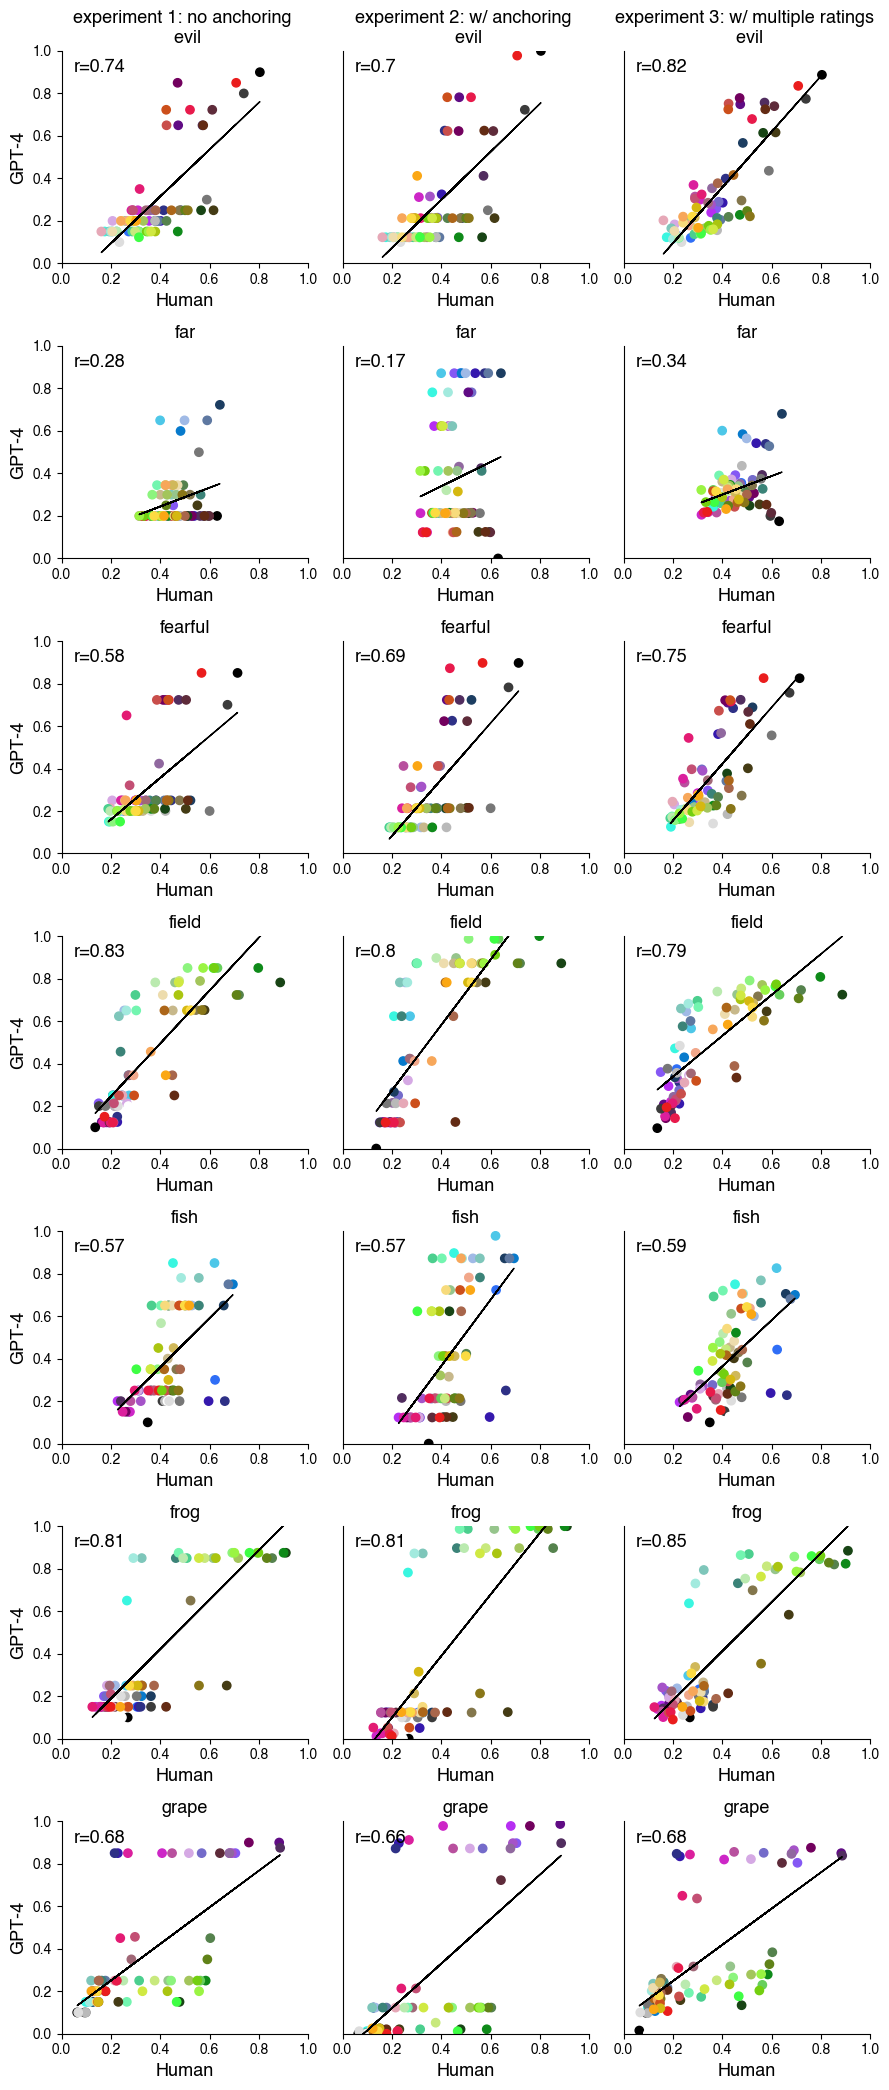

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


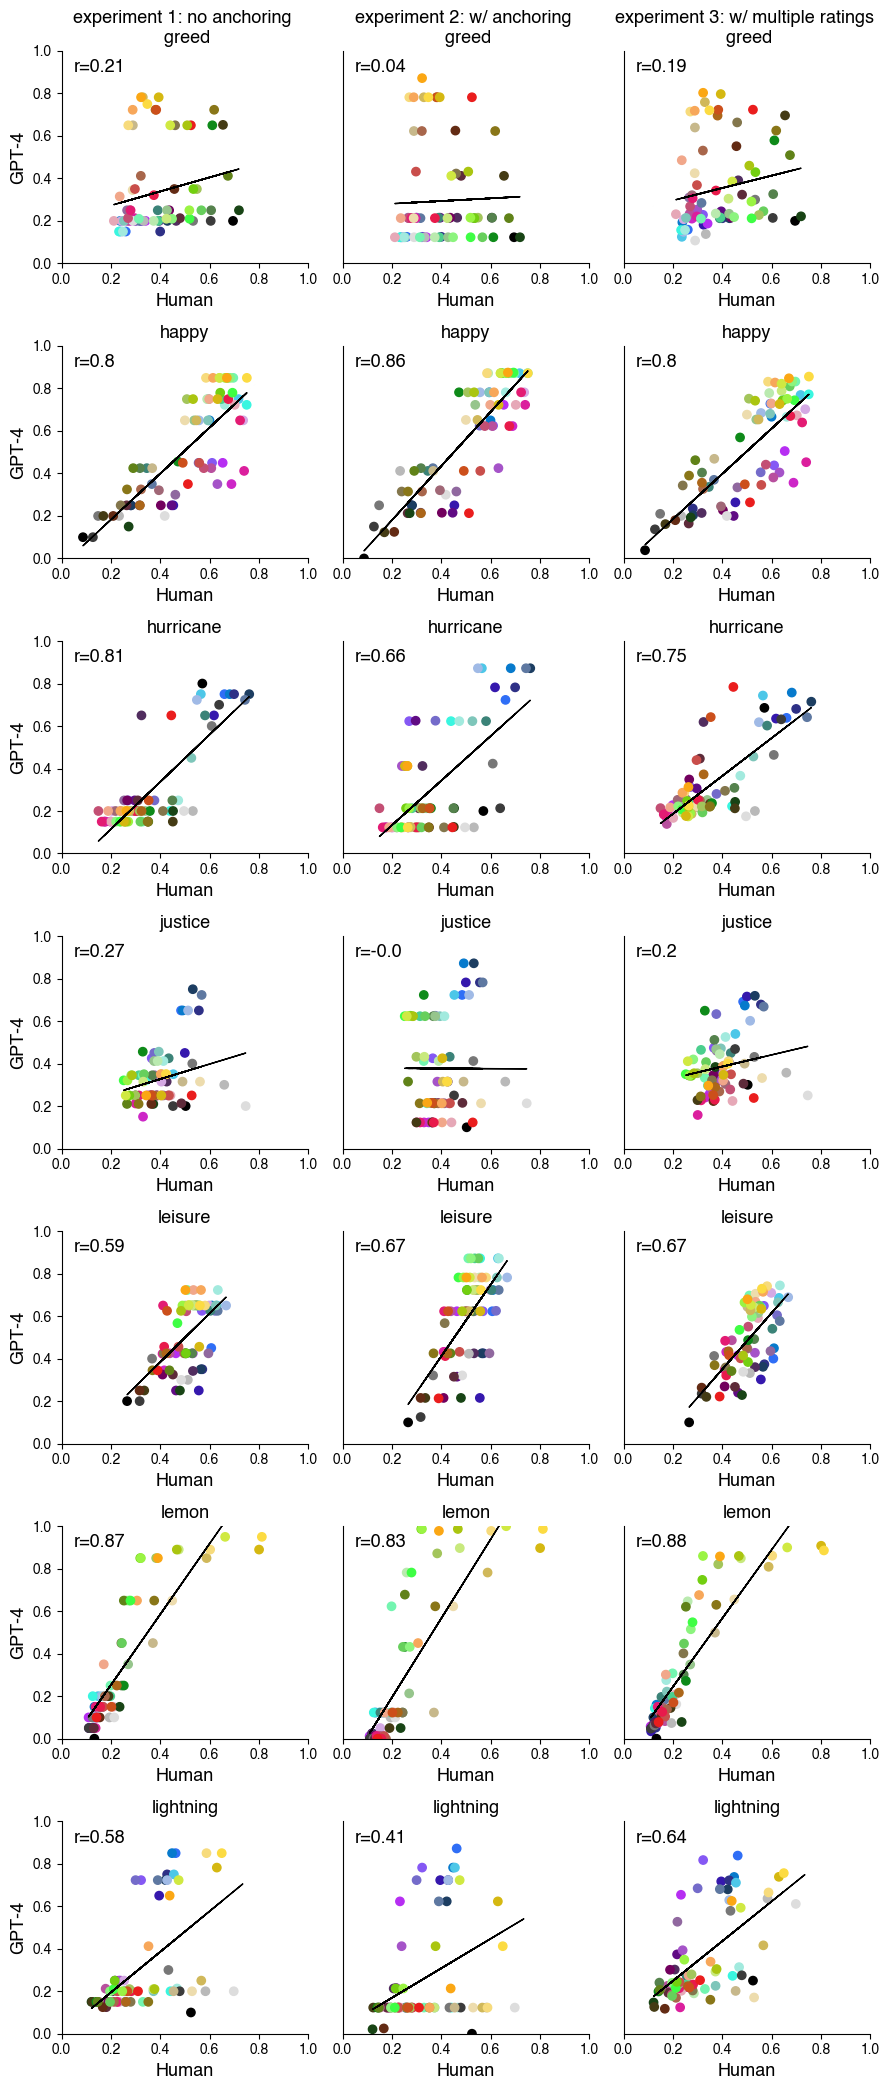

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


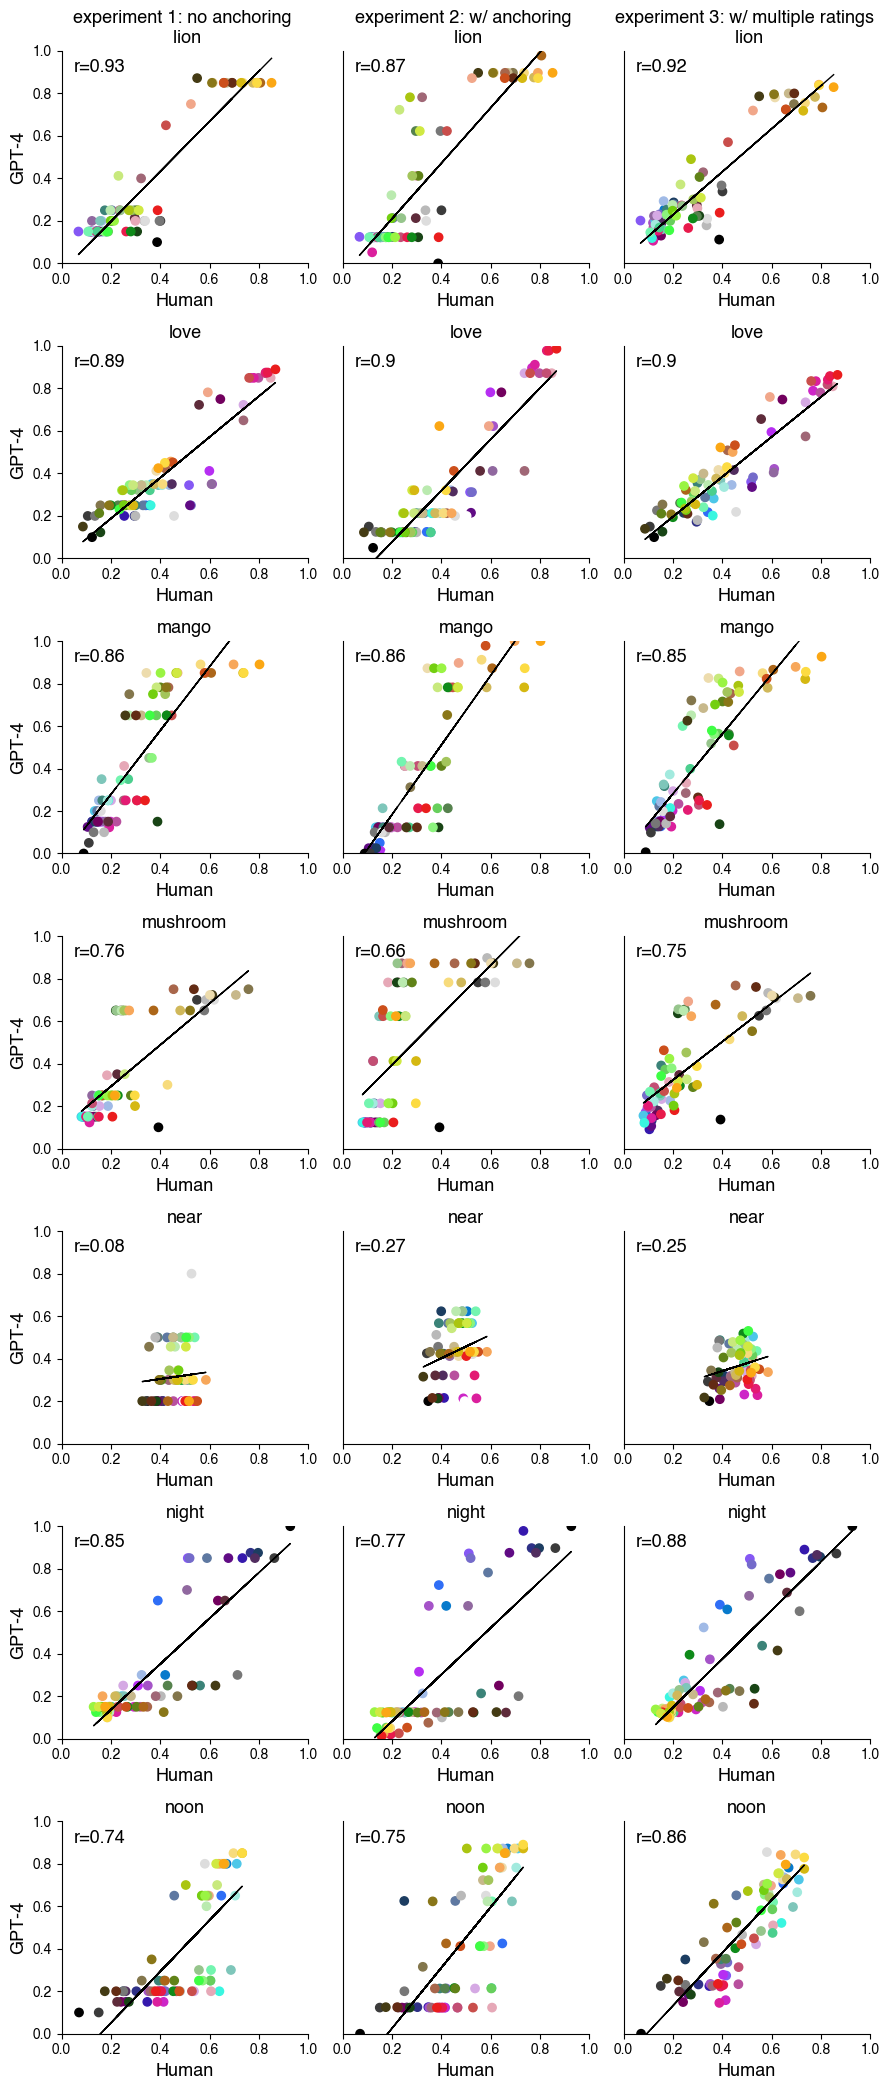

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


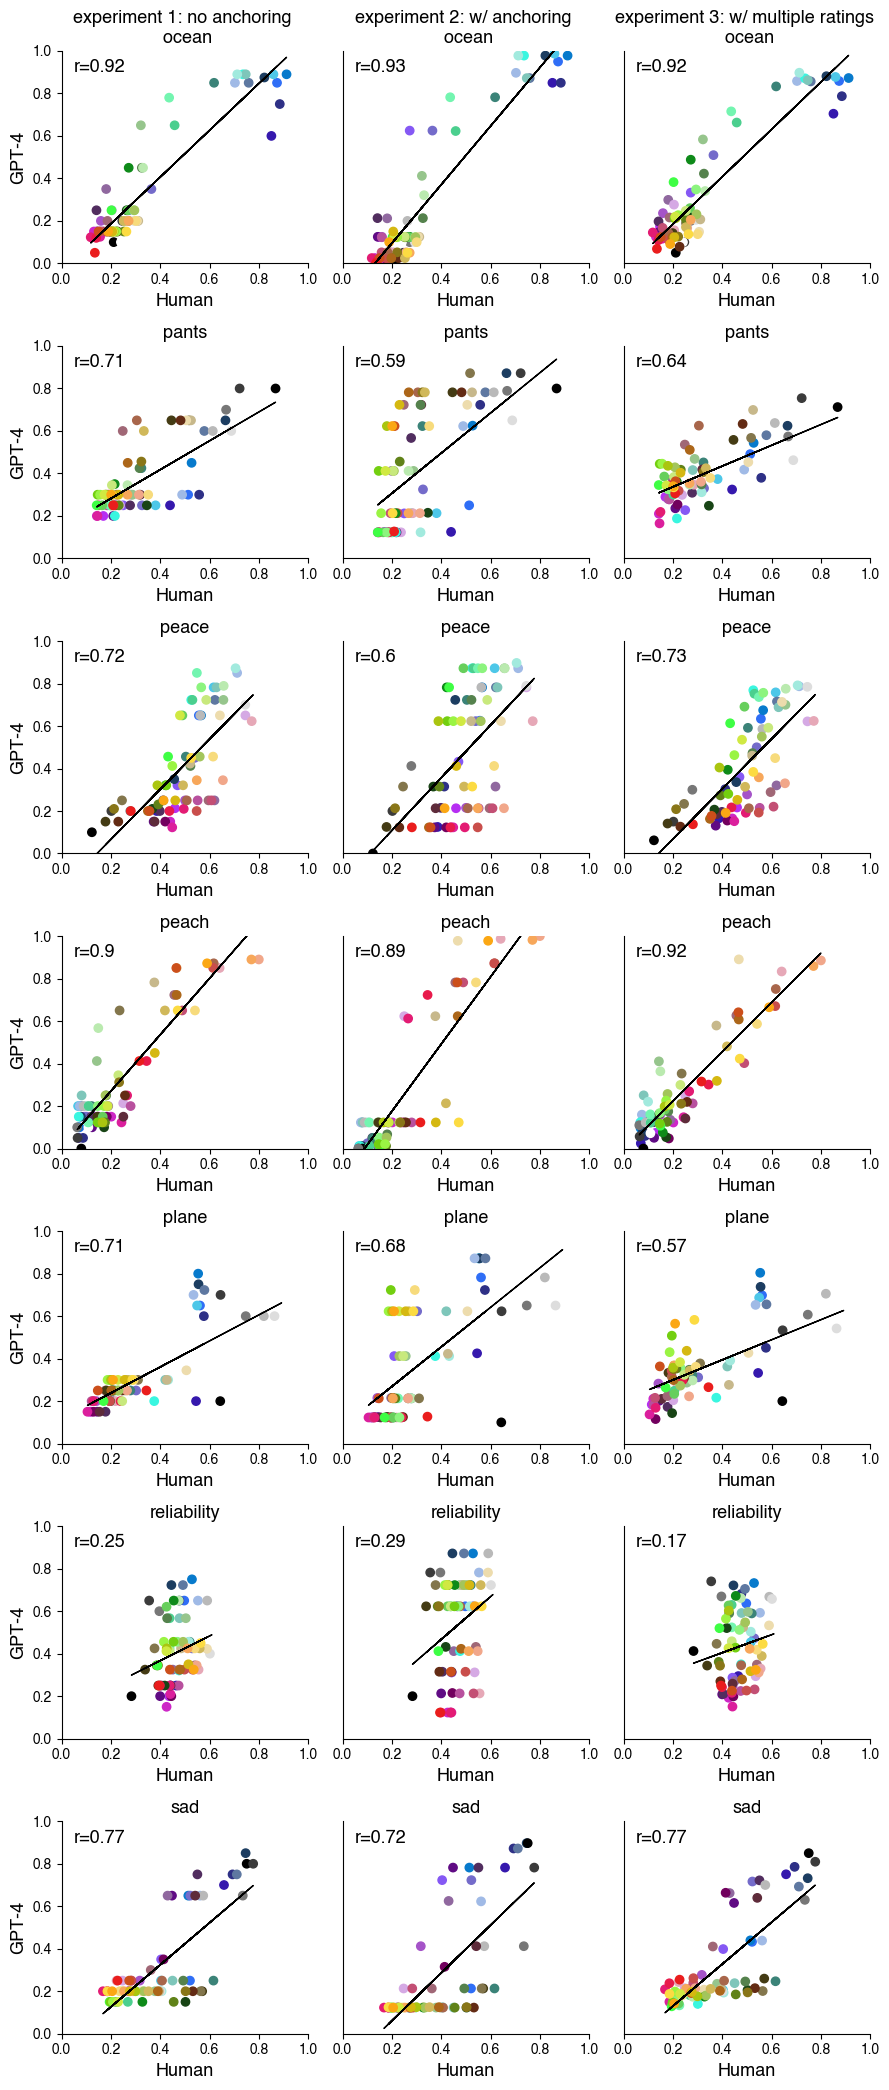

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


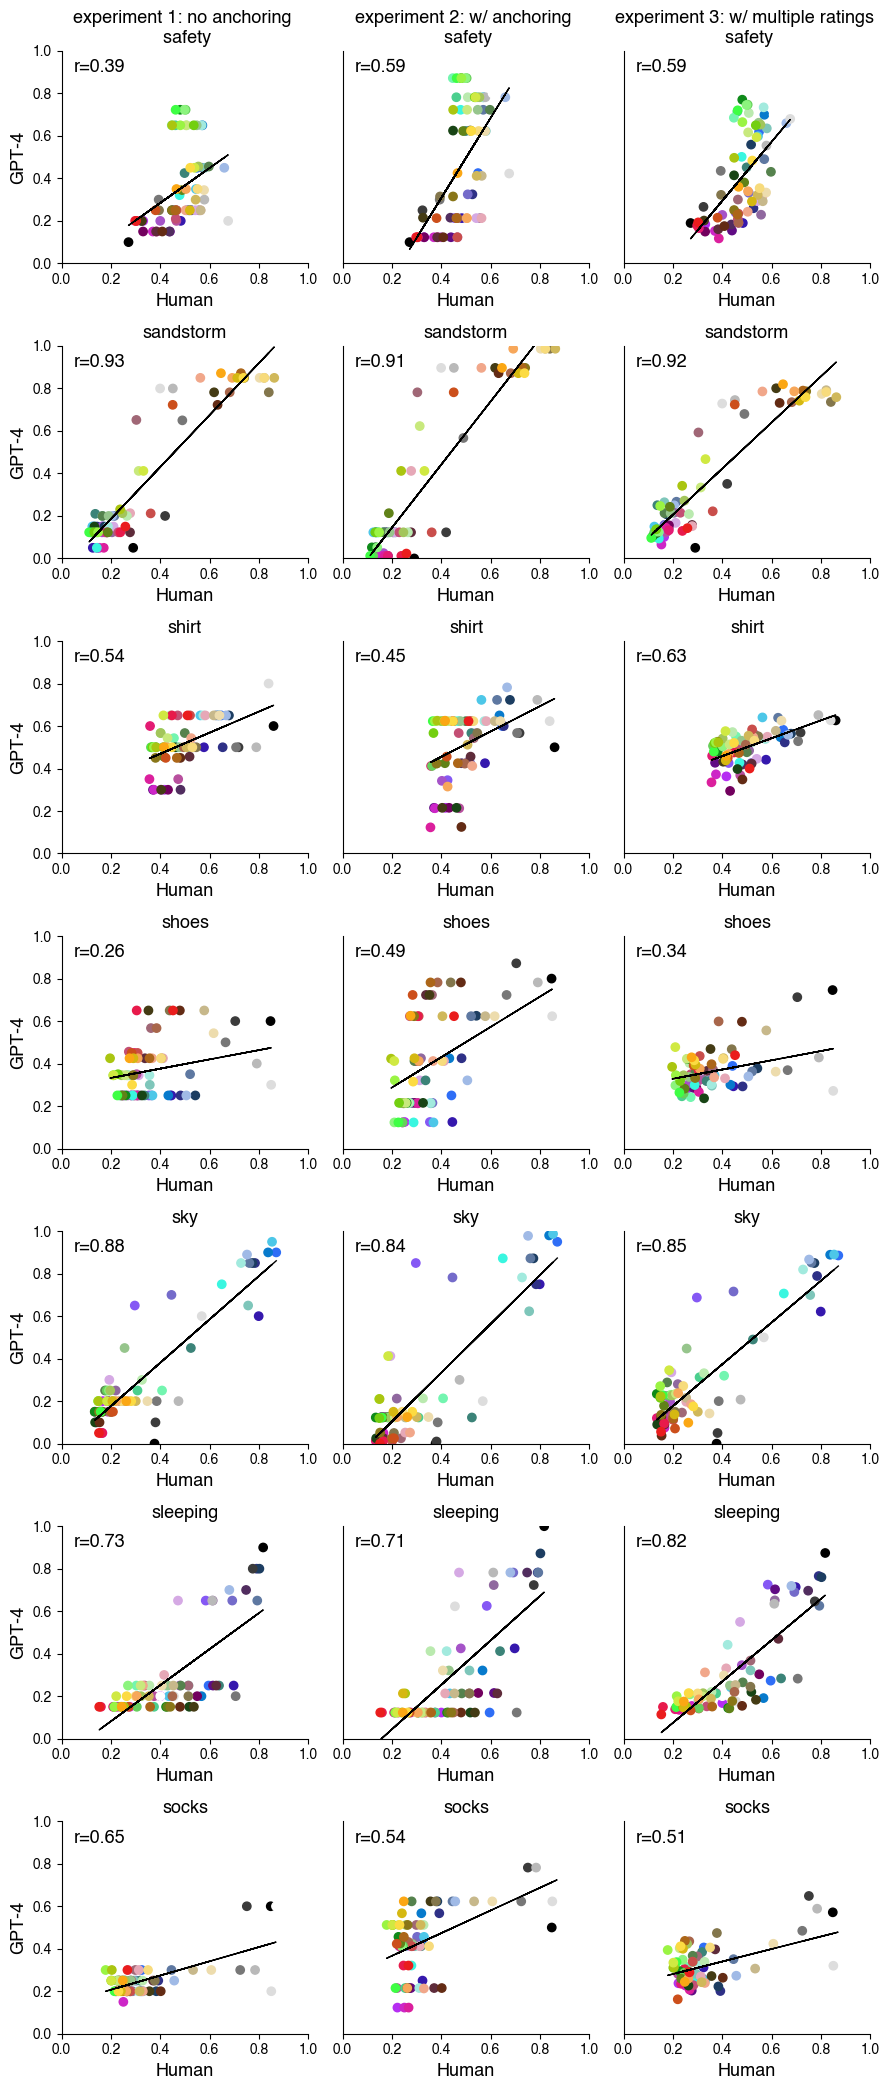

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


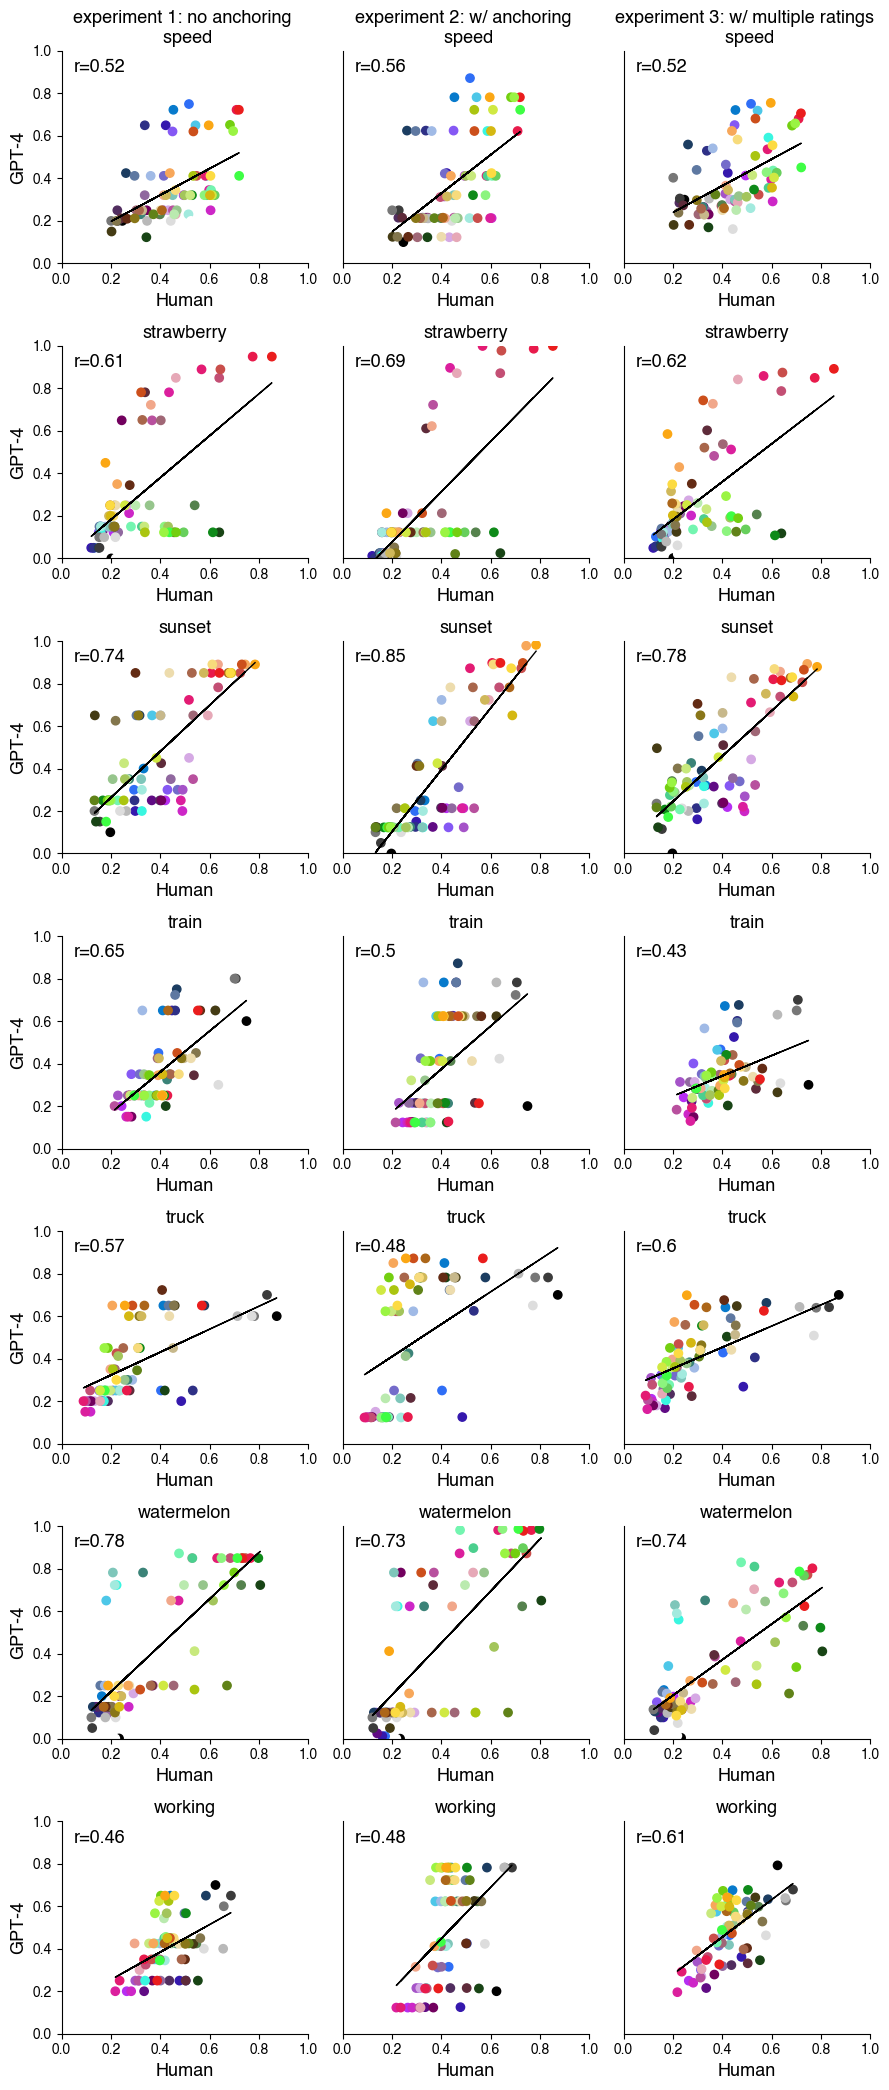

In [346]:
# scatter_dict ={'noanc':['above','above','above'],'anc':['love','love','love'],'multiple':['plane','plane','plane']}
# scatter_dict = { 'strawberry':['noanc','anc','multiple'],
#                 'blueberry':['noanc','anc','multiple'],
#                 # 'love':['noanc','anc','multiple'],
#                 'above':['noanc','anc','multiple'],
#                 'train':['noanc','anc','multiple'],}

p_count=1
for j in range(10):
    fig = plt.figure(1,figsize=(9,21))
    for i,this_concept in enumerate(list(scatter_dict.keys())[j*7:j*7+7]):
        for this_cat in  scatter_dict[this_concept]: 
            # ax = fig.add_subplot(3,5,p_count)
            x = ratings_all[ratings_all.index==this_concept].values[0]
            if this_cat=='noanc':
                ax = fig.add_subplot(7,3,3*i+1)
                if i==0:
                    plt.title(f'experiment 1: no anchoring \n {this_concept}',fontsize=13,weight='heavy')
                else:    
                    plt.title(this_concept,fontsize=13,weight='heavy')
            
                plt.ylabel('GPT-4',fontsize=13)
                plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
                y = gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0]
                m, b = np.polyfit(x, y, 1)
                plt.plot(x, m*x + b, color='black', linewidth=1)
                plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)

            if this_cat=='anc':
                ax = fig.add_subplot(7,3,3*i+2)
                if i==0:
                    plt.title(f'experiment 2: w/ anchoring \n {this_concept}',fontsize=13,weight='heavy')
                else:    
                    plt.title(this_concept,fontsize=13,weight='heavy')
            
                plt.ylabel('')
                plt.yticks([])
                plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
                y = gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0]
                m, b = np.polyfit(x, y, 1)
                plt.plot(x, m*x + b, color='black', linewidth=1)
                plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)
            if this_cat=='multiple':
                ax = fig.add_subplot(7,3,3*i+3)
                if i==0:
                    plt.title(f'experiment 3: w/ multiple ratings \n {this_concept}',fontsize=13,weight='heavy')
                else:    
                    plt.title(this_concept,fontsize=13,weight='heavy')
                    
                    
                
            
                plt.ylabel('')
                plt.yticks([])
            
                plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
                y = gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0]
                m, b = np.polyfit(x, y, 1)
                plt.plot(x, m*x + b, color='black', linewidth=1)
                plt.annotate(f'r={round(pearsonr(x,y)[0],2)}', xy=(.05, .9), xycoords='axes fraction',fontsize=13)

            ## plot a best fit line through the points

            # if p_count==1 or p_count==4 or p_count==7 or p_count==10:
            #     plt.ylabel('GPT-4')
        

            plt.ylim([0,1])
            plt.xlim([0,1])
            plt.xlabel('Human', fontsize=13)
            sns.despine()
            
            plt.tight_layout()
            p_count+=1

    plt.savefig(f'../../plots/supp_mat_scatter_{j}.pdf',format ='pdf',bbox_inches='tight')
    plt.show()

### SH cors


#### get split half correlations for different sizes of the split half ranging form 5 to 20 in steps of 5. sample subjects with replacement when deciding the split halves


In [310]:
for num_rates in [5,10,15,20,25]:
    corrected_shs = []
    con=[]
    for i in range(50):
        for this_concept in ratings_all.index:
            this_concept_ratings = all_raw[all_raw.prompt==this_concept]
            sub_1 = np.random.choice(this_concept_ratings.subject_id.unique(), num_rates, replace=True)
            sub_2 = np.setdiff1d(this_concept_ratings.subject_id, sub_1)
            sub_2 = np.random.choice(sub_2, num_rates, replace=True)
            g1_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_1)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
            g2_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_2)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
            g1_ratings = make_ratings_mat(g1_grouped)[0]
            g2_ratings = make_ratings_mat(g2_grouped)[0]
            con.append(this_concept)
            corrected_shs.append(2*pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]/(1+pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]))
            # corrected_shs.append(pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0])

    sh_df = pd.DataFrame({'concept':con,'sh':corrected_shs})
    mean_sh_df = sh_df.groupby('concept').sh.agg(mean_sh='mean').reset_index()
    mean_sh_df = mean_sh_df.rename(columns={'mean_sh':f'mean_sh_{num_rates}'})
    gpt_cor_df = gpt_cor_df.merge(mean_sh_df, on='concept')


    
    print(f'num_rates: {num_rates}, mean corrected sh: {np.mean(corrected_shs)}')
   

num_rates: 5, mean corrected sh: 0.747159345905063
num_rates: 10, mean corrected sh: 0.842608539545611
num_rates: 15, mean corrected sh: 0.881897239779937
num_rates: 20, mean corrected sh: 0.8975815142406547
num_rates: 25, mean corrected sh: 0.9111844889364864


In [313]:
###  get the rows of gpt_cor_df for which the value of specificity falls into the 3rd quartile

# gcdf_3quart = gpt_cor_df[(gpt_cor_df.specificity>gpt_cor_df.specificity.quantile(.30)) & (gpt_cor_df.specificity<gpt_cor_df.specificity.quantile(.60))].reset_index(drop=True)
# gcdf_3quart = gpt_cor_df[(gpt_cor_df.specificity>.24)].reset_index(drop=True)

In [314]:
# pivot gcdf_3quart to long format where mean_sh_5	mean_sh_10	mean_sh_15	mean_sh_20 get put into one column and the value of the column is in a new column called num_rates
gcdf_3quart_long = gpt_cor_df.melt(id_vars=['concept','specificity'],value_vars=['mean_sh_5','mean_sh_10','mean_sh_15','mean_sh_20','mean_sh_25'],var_name='num_rates',value_name='mean_sh').reset_index(drop=True)
# gcdf_3quart_long = gcdf_3quart.melt(id_vars=['concept','specificity'],value_vars=['mean_sh_5','mean_sh_10','mean_sh_15','mean_sh_20'],var_name='num_rates',value_name='mean_sh').reset_index(drop=True)

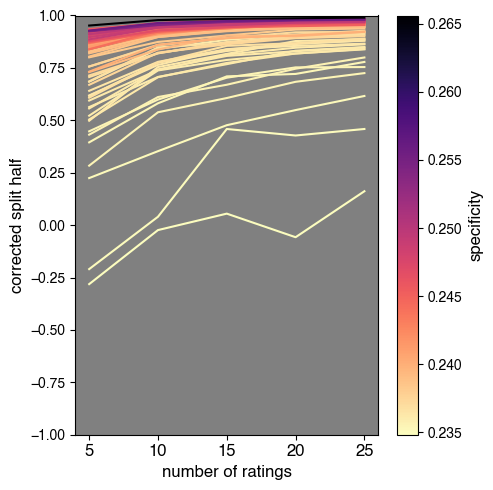

In [318]:
### make a plot where the x-axis is num_rates, y-axis is mean_sh and the color of the points is specificity
norm = plt.Normalize(gcdf_3quart_long.specificity.min(), gcdf_3quart_long.specificity.max())
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
sm = plt.cm.ScalarMappable(cmap="magma_r", norm=norm)
sns.lineplot(data=gcdf_3quart_long,x='num_rates',y='mean_sh',hue='specificity',palette='magma_r',ax=ax)
ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax).set_label('specificity',fontsize=12)

ax.set_xlabel('number of ratings',fontsize=12)
ax.set_ylabel('corrected split half',fontsize=12)
## change the x-tick labels to be more readable
ax.set_xticklabels(['5','10','15','20','25'],fontsize=12)
### make the background color of the plot gray

ax.set_facecolor('gray')


# ### label the colorbar
# plt.colorbar().set_label('specificity',fontsize=12)
### don't show the legend
# plt.legend(title='specificity',fontsize=12)
plt.ylim([-1,1])
plt.tight_layout()

70


Text(0, 0.5, 'count')

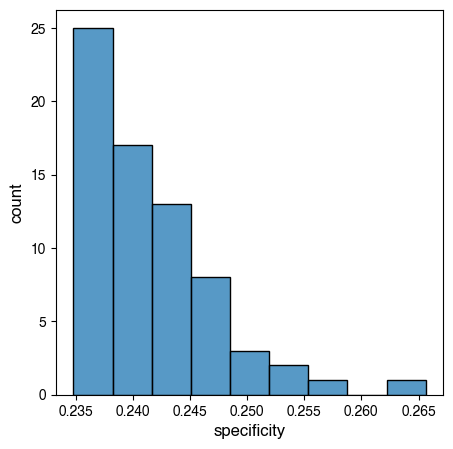

In [316]:
print(gcdf_3quart_long.concept.nunique())

### plot a histogram of the specificity values

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
sns.histplot(gpt_cor_df.specificity,ax=ax)
ax.set_xlabel('specificity',fontsize=12)
ax.set_ylabel('count',fontsize=12)


In [320]:

os.mkdir('concepts')
for this_concept in gpt_cor_df.concept.unique():
    os.mkdir(f'concepts/{this_concept}')


In [323]:
a = gpt_cor_df.concept.unique()
a.sort()
### print 'a' in 5 batches of 14
for i in range(5):
    print(a[i*14:i*14+14])

['above' 'angry' 'apple' 'banana' 'beach' 'bear' 'below' 'beside' 'bird'
 'blizzard' 'blueberry' 'boat' 'car' 'carrot']
['celery' 'cherry' 'comfort' 'corn' 'dawn' 'day' 'disgust' 'dress'
 'driving' 'drought' 'dusk' 'eating' 'efficiency' 'eggplant']
['evil' 'far' 'fearful' 'field' 'fish' 'frog' 'grape' 'greed' 'happy'
 'hurricane' 'justice' 'leisure' 'lemon' 'lightning']
['lion' 'love' 'mango' 'mushroom' 'near' 'night' 'noon' 'ocean' 'pants'
 'peace' 'peach' 'plane' 'reliability' 'sad']
['safety' 'sandstorm' 'shirt' 'shoes' 'sky' 'sleeping' 'socks' 'speed'
 'strawberry' 'sunset' 'train' 'truck' 'watermelon' 'working']


In [325]:
np.exp(100)

2.6881171418161356e+43

In [326]:
np.log(10000)

9.210340371976184